# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import validation_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
adro_df = pd.read_csv("drive/MyDrive/Colab Notebooks/adro3.csv", delimiter = ';')
adro_df['Date'] = pd.to_datetime(adro_df['Date'], format = '%d/%m/%Y')
adro_df.drop(['y', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'SES open', 'SES High', 'SES Low',
              'SES Close', 'SES Volume', 'ROC', 'Volume', 'diference'], axis = 1, inplace = True)


indy_df = pd.read_csv("drive/MyDrive/Colab Notebooks/indy3.csv", delimiter = ';')
indy_df['Date'] = pd.to_datetime(indy_df['Date'], format = '%d/%m/%Y')
indy_df.drop(['y', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'SES open', 'SES High', 'SES Low',
              'SES Close', 'SES Volume', 'ROC', 'Volume', 'diference'], axis = 1, inplace = True)


ptba_df = pd.read_csv("drive/MyDrive/Colab Notebooks/ptba3.csv", delimiter = ';')
ptba_df['Date'] = pd.to_datetime(ptba_df['Date'], format = '%d/%m/%Y')
ptba_df.drop(['y', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'SES open', 'SES High', 'SES Low',
              'SES Close', 'SES Volume', 'ROC', 'Volume', 'diference'], axis = 1, inplace = True)


toba_df = pd.read_csv("drive/MyDrive/Colab Notebooks/toba3.csv", delimiter = ';')
toba_df['Date'] = pd.to_datetime(toba_df['Date'], format = '%d/%m/%Y')
toba_df.drop(['y', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'SES open', 'SES High', 'SES Low',
              'SES Close', 'SES Volume', 'ROC', 'Volume', 'diference'], axis = 1, inplace = True)

untr_df = pd.read_csv("drive/MyDrive/Colab Notebooks/untr3.csv", delimiter = ';')
untr_df['Date'] = pd.to_datetime(untr_df['Date'], format = '%d/%m/%Y')
untr_df.drop(['y', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'SES open', 'SES High', 'SES Low',
              'SES Close', 'SES Volume', 'ROC', 'Volume', 'diference'], axis = 1, inplace = True)


In [ ]:
# rename semuanya
indy_df = indy_df.rename(columns = {'Udonchian' : 'Donchian upper',
                       'Ldonchian' : 'Donchian Lower',
                        'Mdonchian': 'Donchian Medium',
                        'UBB' : 'Upper BB',
                        'LBB' : 'Lower BB',
                        '14-EMV' : '15-EMV'})

ptba_df = ptba_df.rename(columns = {'SES Adj Close' : 'SES adj close'})

toba_df = toba_df.rename(columns = {'SES Adj Close' : 'SES adj close'})

untr_df = untr_df.rename(columns = {'SES Adj Close' : 'SES adj close',
                        'RSI (14 periods)' : 'RSI'})

In [ ]:
print(adro_df[closen])

In [ ]:
print(adro_df)

           Date  closen  predn  SES adj close       MACD       MTM        RSI  \
0    2017-01-02     1.0    1.0    1065.457153   0.000000       NaN   0.000000   
1    2017-01-03    -1.0   -1.0    1079.600403   0.000000       NaN   0.000000   
2    2017-01-04    -1.0   -1.0    1074.100311   0.000000       NaN   0.000000   
3    2017-01-05     0.0    1.0    1060.349960   0.000000       NaN   0.000000   
4    2017-01-06     0.0    1.0    1062.903557   0.000000       NaN   0.000000   
...         ...     ...    ...            ...        ...       ...        ...   
1260 2021-12-29     1.0    1.0    1891.507870  48.197817  310.3027  93.432937   
1261 2021-12-30     NaN    NaN    1951.009489  52.174317  355.8271  94.529568   
1262        NaT     NaN    NaN            NaN        NaN       NaN        NaN   
1263        NaT     NaN    NaN            NaN        NaN       NaN        NaN   
1264        NaT     NaN    NaN            NaN        NaN       NaN        NaN   

             ATR         AD

In [ ]:
adro_df.isnull().any()

Date               True
closen             True
predn              True
SES adj close      True
MACD               True
MTM                True
RSI                True
ATR                True
ADOSC              True
CCI                True
MFI                True
ULTSOC             True
Donchian upper     True
Donchian Lower     True
Donchian Medium    True
Upper BB           True
Lower BB           True
OBV                True
SMA                True
TSI                True
CC                 True
SO%k               True
SO%d               True
MI                 True
1-EMV              True
15-EMV             True
+VI                True
-VI                True
CO                 True
dtype: bool

(array([232.,   0.,   0.,   0.,   0., 776.,   0.,   0.,   0., 253.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

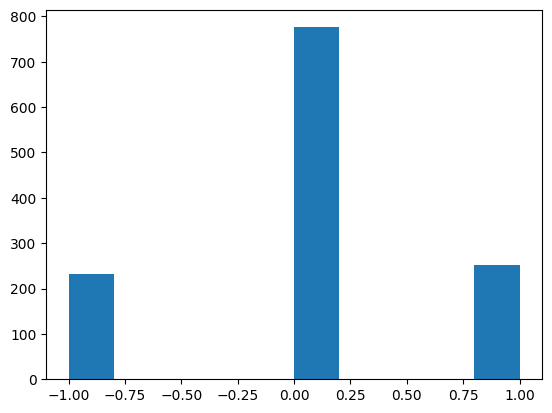

In [ ]:
plt.hist(adro_df['closen'])

In [ ]:
adro_df['Upper BB'].describe()

count    1262.000000
mean     1125.793912
std       240.824350
min         0.000000
25%       977.165332
50%      1093.143894
75%      1231.400796
max      1954.331828
Name: Upper BB, dtype: float64

In [ ]:
adro_df['Lower BB'].describe()

count    1262.000000
mean      987.115651
std       216.342464
min         0.000000
25%       875.210207
50%       966.882320
75%      1114.010452
max      1540.334387
Name: Lower BB, dtype: float64

In [ ]:
adro_df['OBV'].describe()

count    1.262000e+03
mean     2.554658e+09
std      2.533423e+09
min     -4.885116e+08
25%      6.162338e+08
50%      1.567357e+09
75%      3.840834e+09
max      1.298808e+10
Name: OBV, dtype: float64

In [ ]:
adro_df['SMA'].describe()

count    1262.000000
mean     1056.454781
std       223.452676
min         0.000000
25%       926.912680
50%      1032.716289
75%      1178.714693
max      1737.489935
Name: SMA, dtype: float64

In [ ]:
adro_df['CC'].describe()

count    1262.000000
mean        1.821254
std        16.003858
min       -62.411887
25%        -6.251142
50%         0.647019
75%         9.185822
max        55.686439
Name: CC, dtype: float64

In [ ]:
adro_df['SO%k'].describe()

count    1262.000000
mean       48.132376
std        31.382794
min         0.000000
25%        16.584180
50%        49.566668
75%        78.345560
max        99.832626
Name: SO%k, dtype: float64

In [ ]:
adro_df.describe()

,closen,predn,SES adj close,MACD,MTM,RSI,ATR,ADOSC,CCI,MFI,...,TSI,CC,SO%k,SO%d,MI,1-EMV,15-EMV,+VI,-VI,CO
count,1261.000000,1261.000000,1262.000000,1262.000000,1247.000000,1262.000000,1262.000000,1.262000e+03,1262.000000,1262.000000,...,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,0.016653,0.094370,1072.399296,1.175079,7.990677,50.957088,459.963182,-6.366152e+11,3.763494,52.284036,...,2.835643,1.821254,48.132376,47.998099,14.633089,26.091404,24.480655,0.126997,0.124509,-7.007613e+09
std,0.620196,0.995932,205.560857,14.570994,114.675320,18.180275,190.377322,3.675912e+11,114.973896,22.300747,...,38.564544,16.003858,31.382794,30.384101,2.661271,900.670587,142.221472,0.064718,0.062115,2.570089e+09
min,-1.000000,-1.000000,524.483335,-55.369262,-403.551000,0.000000,0.000000,-1.289810e+12,-317.489201,0.000000,...,-85.680453,-62.411887,0.000000,0.000000,0.000000,-3140.160383,-435.714405,0.000000,0.000000,-1.507445e+10
25%,0.000000,-1.000000,931.019539,-5.655748,-55.625850,39.854701,286.102044,-9.079112e+11,-91.499569,36.639663,...,-22.401575,-6.251142,16.584180,18.058356,14.084549,-333.489990,-38.698628,0.077014,0.080303,-8.253984e+09
50%,0.000000,1.000000,1034.291152,0.823175,4.792700,51.222040,404.526612,-6.889025e+11,2.367718,52.910299,...,2.047808,0.647019,49.566668,49.408730,14.927773,-60.217074,8.366268,0.112452,0.114951,-6.456534e+09
75%,0.000000,1.000000,1177.691363,7.745836,65.323600,62.269790,644.020459,-2.989655e+11,95.741426,69.259298,...,27.332893,9.185822,78.345560,76.908432,15.732153,285.291727,70.558460,0.162215,0.153619,-5.327396e+09
max,1.000000,1.000000,1951.009489,55.999101,440.136500,94.529568,917.709428,0.000000e+00,335.268819,99.060631,...,94.170239,55.686439,99.832626,99.608126,18.487271,8092.661853,846.707717,0.417340,0.413347,0.000000e+00


In [ ]:
adro_df['ULTSOC'].describe()

count    1262.000000
mean       44.552544
std        12.126357
min         0.000000
25%        36.606493
50%        44.547426
75%        52.512393
max        78.989348
Name: ULTSOC, dtype: float64

In [ ]:
adro_df['Donchian upper'].describe()

count    1247.000000
mean     1122.917674
std       203.098184
min       760.578079
25%       969.841354
50%      1087.800741
75%      1215.353607
max      1891.507870
Name: Donchian upper, dtype: float64

In [ ]:
adro_df['Donchian Lower'].describe()

count    1247.000000
mean     1012.703283
std       188.274364
min       524.483335
25%       890.307440
50%       986.558150
75%      1122.913849
max      1595.182368
Name: Donchian Lower, dtype: float64

In [ ]:
adro_df['Donchian Medium'].describe()

count    1247.000000
mean     1067.810479
std       192.474674
min       645.701926
25%       933.475130
50%      1044.647259
75%      1177.433807
max      1743.345119
Name: Donchian Medium, dtype: float64

In [ ]:
print("View greater than 1: ",
      sum(untr_df['closen'] == 1))

View greater than 1:  217


<Figure size 640x480 with 0 Axes>

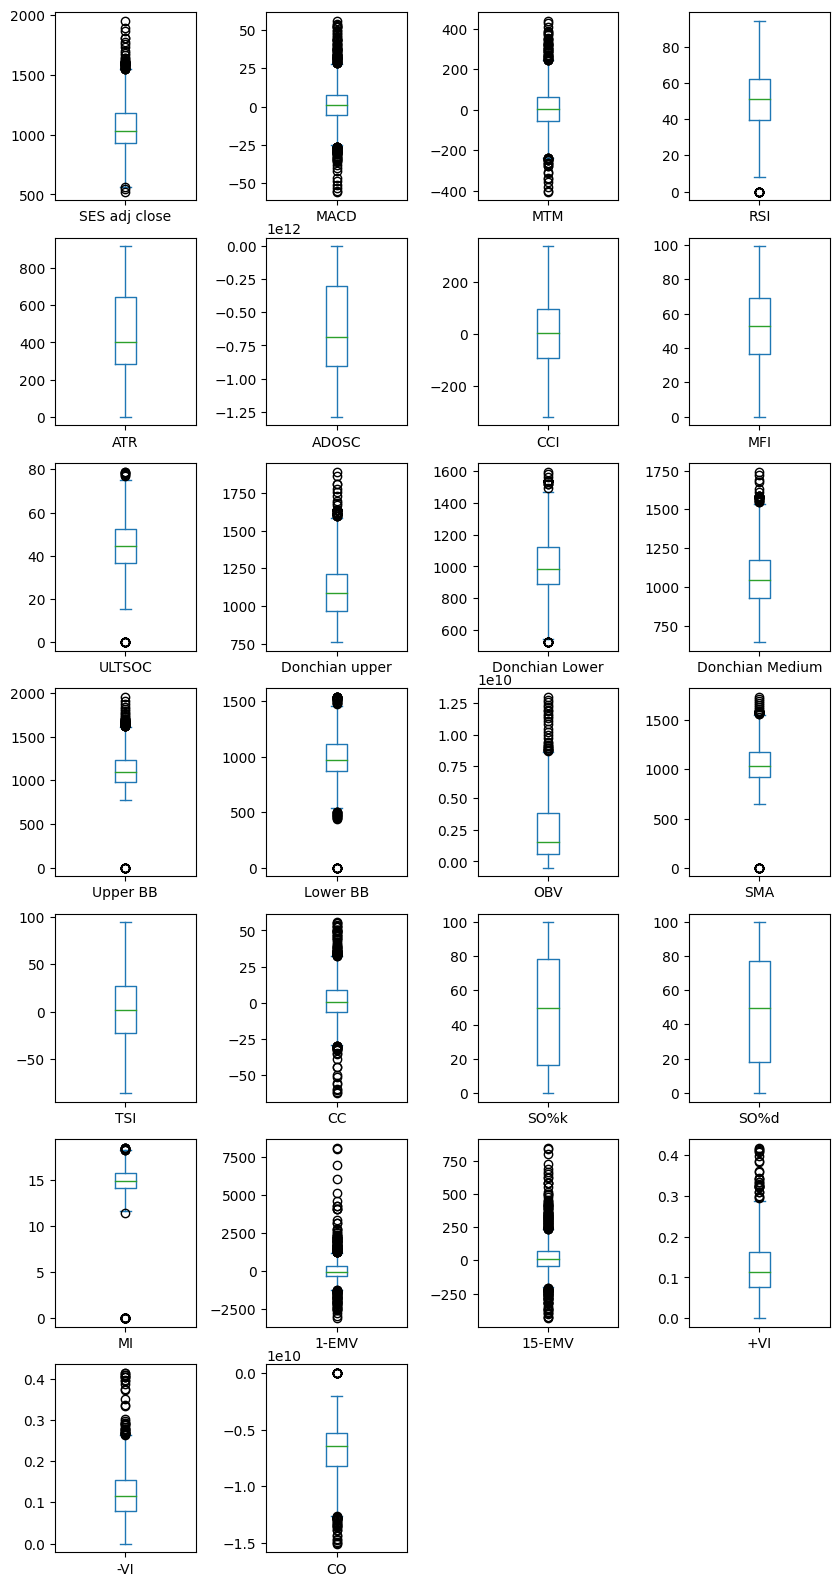

<Figure size 640x480 with 0 Axes>

In [ ]:
colums_to_plot = adro_df.drop(['closen', 'predn'], axis = 1)
colums_to_plot.plot(kind= 'box', figsize = (10, 20), subplots=True, sharex=False, sharey=False, layout=(7, 4))
plt.subplots_adjust(wspace=0.5)
plt.figure()

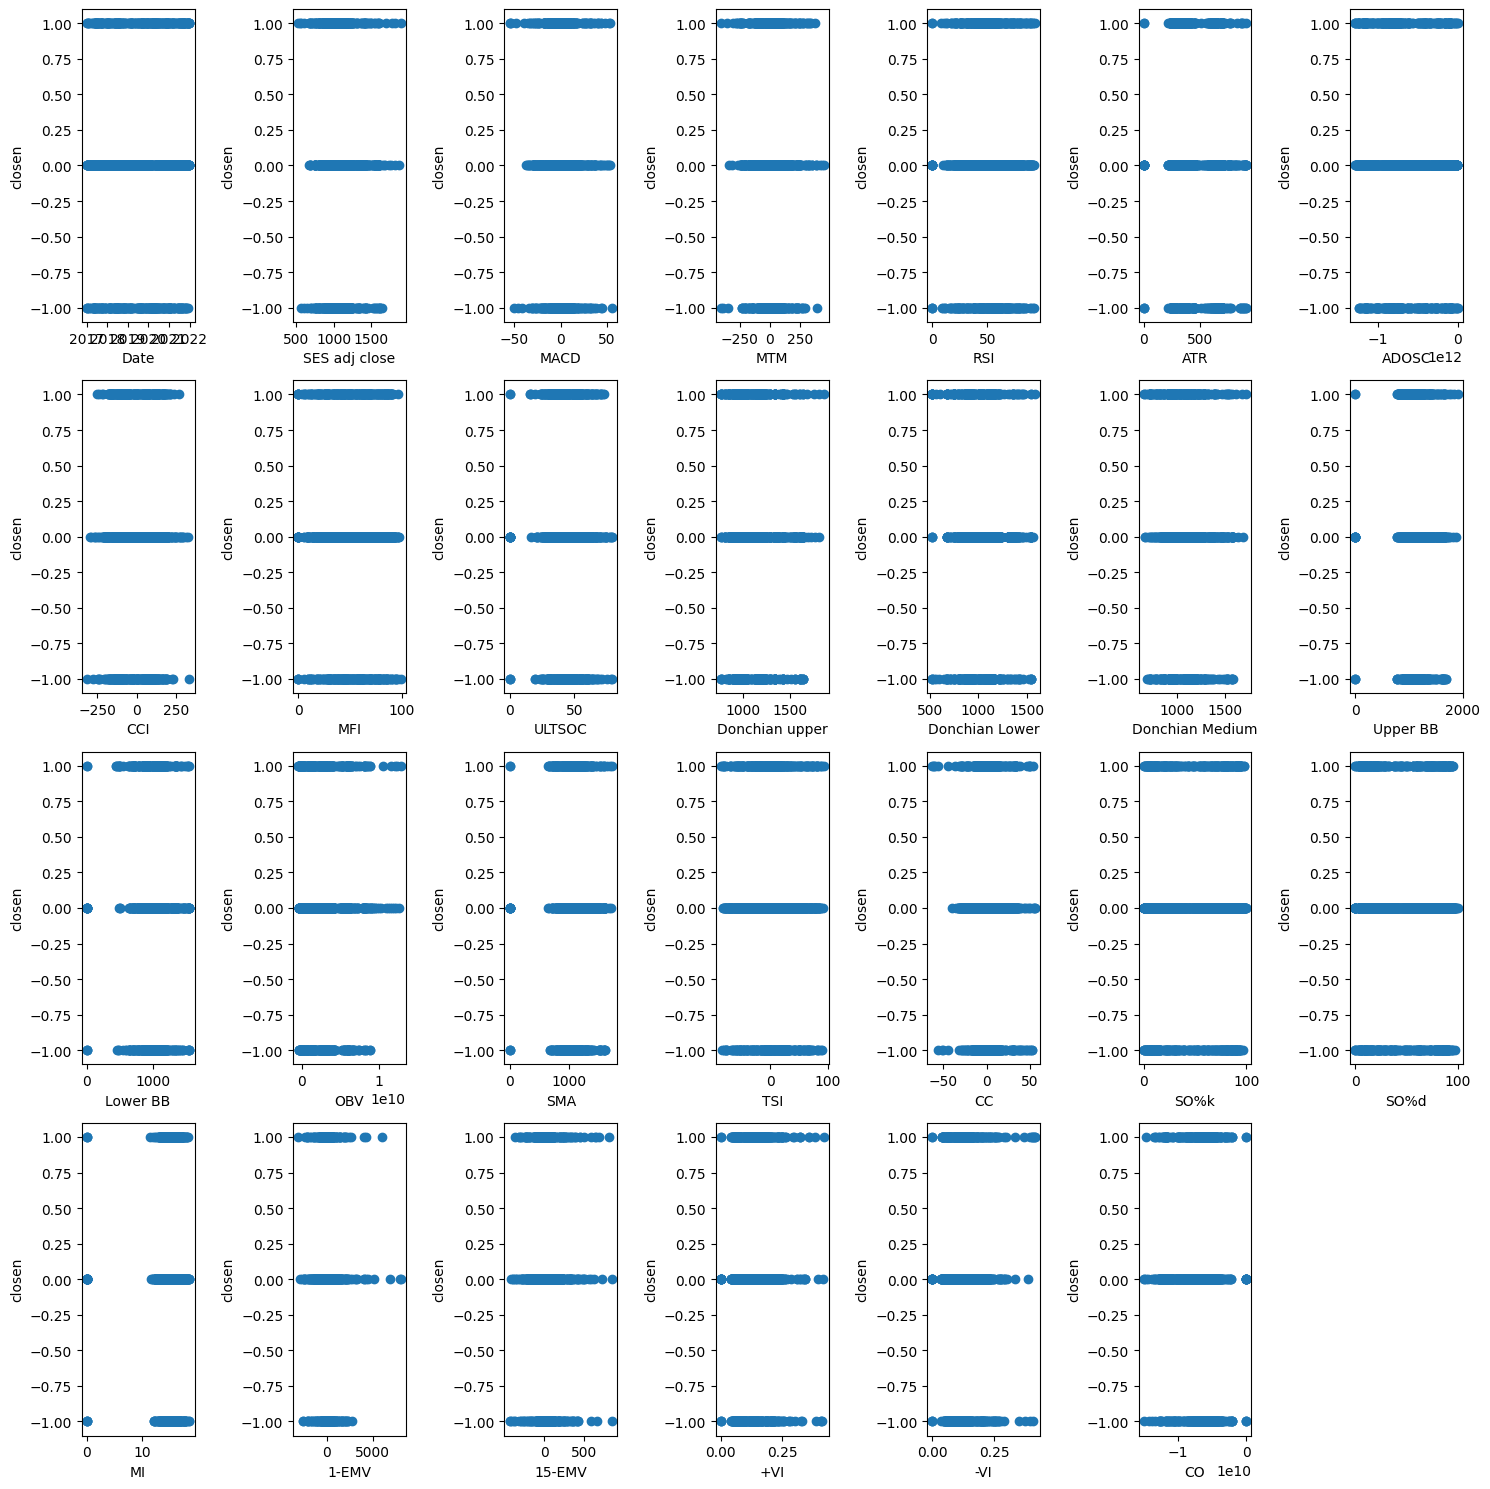

In [ ]:
y = adro_df['closen']
x = adro_df.drop(['closen', 'predn'], axis=1)

# Plot a scatter plot for each variable against the y-axis
nrows = 4
ncols = 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axs = axs.ravel()

for i, col in enumerate(x.columns):
    axs[i].scatter(x[col], y)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('closen')

for i in range(len(x.columns), nrows*ncols):
    fig.delaxes(axs[i])

fig.tight_layout()

# Show the plot
plt.show()

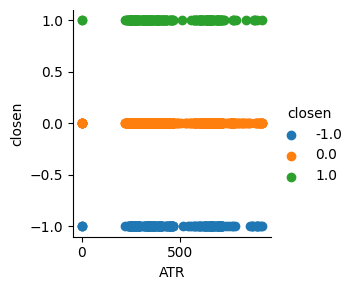

In [ ]:
sns.FacetGrid(adro_df, hue="closen") \
   .map(plt.scatter, "ATR", "closen") \
   .add_legend()
plt.show()

In [ ]:
adro_df.drop(range(0,32), axis = 0, inplace = True)
indy_df.drop(range(0,32), axis = 0, inplace = True)
ptba_df.drop(range(0,32), axis = 0, inplace = True)
toba_df.drop(range(0,32), axis = 0, inplace = True)
untr_df.drop(range(0,32), axis = 0, inplace = True)

adro_df.drop(range(1261, 1265), axis = 0, inplace = True)
indy_df.drop(range(1261, 1265), axis = 0, inplace = True)
ptba_df.drop(range(1261, 1265), axis = 0, inplace = True)
toba_df.drop(range(1261, 1265), axis = 0, inplace = True)
untr_df.drop(range(1261, 1265), axis = 0, inplace = True)

In [ ]:
toba_df.isnull().any()

Date               False
closen             False
predn              False
SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

In [ ]:
print(adro_df)

           Date  closen  predn  SES adj close       MACD       MTM        RSI  \
32   2017-02-15     1.0    1.0    1042.492356  -3.499505  -46.5584  32.133537   
33   2017-02-16    -1.0   -1.0    1055.546288  -3.869753  -32.7079  41.009970   
34   2017-02-17     1.0    1.0    1049.501476  -4.390324  -36.7830  38.510937   
35   2017-02-20     0.0    1.0    1057.479315  -4.209938  -24.6774  43.389017   
36   2017-02-21     0.0   -1.0    1069.325595  -3.312034   -4.4814  49.733415   
...         ...     ...    ...            ...        ...       ...        ...   
1256 2021-12-23     1.0    1.0    1773.270446  40.453447  303.6849  90.063550   
1257 2021-12-24     0.0   -1.0    1809.718963  42.696556  320.2428  91.291401   
1258 2021-12-27     1.0    1.0    1811.311141  43.422506  272.3885  91.341477   
1259 2021-12-28     0.0    1.0    1862.003654  45.835602  300.4367  92.761373   
1260 2021-12-29     1.0    1.0    1891.507870  48.197817  310.3027  93.432937   

             ATR         AD

# Per Tahun

In [ ]:
adro_copy = adro_df.copy()
indy_copy = indy_df.copy()
ptba_copy = ptba_df.copy()
toba_copy = toba_df.copy()
untr_copy = untr_df.copy()

## Tahun 2017

In [ ]:
# pisahin data
start = '2017-01-01'
end = '2017-12-31'
adro17 = adro_copy.loc[(adro_copy['Date'] >= start) & (adro_copy['Date'] <= end)]
adro17 = pd.DataFrame(adro17)

start = '2017-01-01'
end = '2017-12-31'
indy17 = indy_copy.loc[(indy_copy['Date'] >= start) & (indy_copy['Date'] <= end)]
indy17 = pd.DataFrame(indy17)

start = '2017-01-01'
end = '2017-12-31'
ptba17 = ptba_copy.loc[(ptba_copy['Date'] >= start) & (ptba_copy['Date'] <= end)]
ptba17 = pd.DataFrame(ptba17)

start = '2017-01-01'
end = '2017-12-31'
toba17 = toba_copy.loc[(toba_copy['Date'] >= start) & (toba_copy['Date'] <= end)]
toba17 = pd.DataFrame(toba17)

start = '2017-01-01'
end = '2017-12-31'
untr17 = untr_copy.loc[(untr_copy['Date'] >= start) & (untr_copy['Date'] <= end)]
untr17 = pd.DataFrame(untr17)

In [ ]:
adro17.drop(['Date'], axis = 1, inplace = True)
indy17.drop(['Date'], axis = 1, inplace = True)
ptba17.drop(['Date'], axis = 1, inplace = True)
toba17.drop(['Date'], axis = 1, inplace = True)
untr17.drop(['Date'], axis = 1, inplace = True)

In [ ]:
saham17 = pd.concat([adro17, indy17, ptba17, toba17, untr17], axis = 0)
print(saham17)

     closen  predn  SES adj close        MACD          MTM        RSI  \
32      1.0    1.0    1042.492356   -3.499505   -46.558400  32.133537   
33     -1.0   -1.0    1055.546288   -3.869753   -32.707900  41.009970   
34      1.0    1.0    1049.501476   -4.390324   -36.783000  38.510937   
35      0.0    1.0    1057.479315   -4.209938   -24.677400  43.389017   
36      0.0   -1.0    1069.325595   -3.312034    -4.481400  49.733415   
..      ...    ...            ...         ...          ...        ...   
249     0.0    1.0   27930.684690   93.976579   881.161662  62.483095   
250     0.0    1.0   28020.139220  119.643049  1086.895286  63.587454   
251     0.0    1.0   28198.232690  145.417697  1189.763073  65.738727   
252     1.0    1.0   28297.539200  166.207468  1292.492862  66.906816   
253     0.0    1.0   28675.478580  198.787441  1856.805026  70.945938   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    649.552472 -2.878510e+10 -242.080061  19.190

### Pake Data Lengkap

#### Data Outlier

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(saham17))
print(z_score)

       closen     predn  SES adj close      MACD       MTM       RSI  \
32   1.762587  0.772737       0.489564  0.349983  0.313155  1.592552   
33   1.942852  1.294102       0.488154  0.354443  0.290597  1.094831   
34   1.762587  0.772737       0.488807  0.360714  0.297234  1.234957   
35   0.090132  0.772737       0.487945  0.358541  0.277518  0.961432   
36   0.090132  1.294102       0.486666  0.347725  0.244625  0.605688   
..        ...       ...            ...       ...       ...       ...   
249  0.090132  0.772737       2.414572  0.824144  1.197813  0.109215   
250  0.090132  0.772737       2.424233  1.133304  1.532889  0.171139   
251  0.090132  0.772737       2.443469  1.443766  1.700429  0.291765   
252  1.762587  0.772737       2.454195  1.694185  1.867744  0.357263   
253  0.090132  0.772737       2.495015  2.086620  2.786833  0.583745   

          ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
32   0.427795  0.351636  2.525085  1.809798  ...  1.197245  0.5

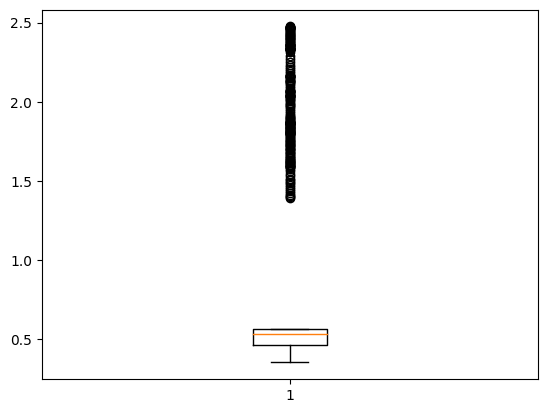

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SMA'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
saham17 = saham17[z_score < threshold]
print(saham17)

     closen  predn  SES adj close        MACD          MTM        RSI  \
32      1.0    1.0    1042.492356   -3.499505   -46.558400  32.133537   
33     -1.0   -1.0    1055.546288   -3.869753   -32.707900  41.009970   
34      1.0    1.0    1049.501476   -4.390324   -36.783000  38.510937   
35      0.0    1.0    1057.479315   -4.209938   -24.677400  43.389017   
36      0.0   -1.0    1069.325595   -3.312034    -4.481400  49.733415   
..      ...    ...            ...         ...          ...        ...   
249     0.0    1.0   27930.684690   93.976579   881.161662  62.483095   
250     0.0    1.0   28020.139220  119.643049  1086.895286  63.587454   
251     0.0    1.0   28198.232690  145.417697  1189.763073  65.738727   
252     1.0    1.0   28297.539200  166.207468  1292.492862  66.906816   
253     0.0    1.0   28675.478580  198.787441  1856.805026  70.945938   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    649.552472 -2.878510e+10 -242.080061  19.190

In [ ]:
saham17 = saham17.dropna()
print(saham17)

     closen  predn  SES adj close        MACD          MTM        RSI  \
32      1.0    1.0    1042.492356   -3.499505   -46.558400  32.133537   
33     -1.0   -1.0    1055.546288   -3.869753   -32.707900  41.009970   
34      1.0    1.0    1049.501476   -4.390324   -36.783000  38.510937   
35      0.0    1.0    1057.479315   -4.209938   -24.677400  43.389017   
36      0.0   -1.0    1069.325595   -3.312034    -4.481400  49.733415   
..      ...    ...            ...         ...          ...        ...   
249     0.0    1.0   27930.684690   93.976579   881.161662  62.483095   
250     0.0    1.0   28020.139220  119.643049  1086.895286  63.587454   
251     0.0    1.0   28198.232690  145.417697  1189.763073  65.738727   
252     1.0    1.0   28297.539200  166.207468  1292.492862  66.906816   
253     0.0    1.0   28675.478580  198.787441  1856.805026  70.945938   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    649.552472 -2.878510e+10 -242.080061  19.190

In [ ]:
print(saham17['closen'].value_counts())

 0.0    654
 1.0    151
-1.0    106
Name: closen, dtype: int64


In [ ]:
print("View greater than 1: ",
      sum(saham17['closen'] == -1))

View greater than 1:  106


#### Data Splitting

In [ ]:
# membagi jadi x dan y
x = saham17.drop(['predn', 'closen'], axis = 1)
y = saham17['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

#### Data Split pk random oversampling


In [ ]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy = 'minority', random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

#y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[184,   8,   0],
       [ 30, 173,   3],
       [  8,  31,   1]])

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.817352
1  Precision  0.769952
2     Recall  0.817352
3   F1 Score  0.783109


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.863013698630137

#### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

##### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[  1,  31,   2],
       [  1, 190,   7],
       [  1,  40,   1]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.8226059654631083

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.700730
1  Precision  0.582742
2     Recall  0.700730
3   F1 Score  0.610857


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.33      0.03      0.05        34
         0.0       0.73      0.96      0.83       198
         1.0       0.10      0.02      0.04        42

    accuracy                           0.70       274
   macro avg       0.39      0.34      0.31       274
weighted avg       0.58      0.70      0.61       274



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.7755474452554745

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte, average= "micro", multi_class = "ovr")

#fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(100,500, 10))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 50, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
minleaf = plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 480, max_depth = 6,
                             min_samples_split = 42, min_samples_leaf = 16,
                             max_features = 'sqrt', oob_score = True,
                             random_state = 100)
# cv = 3
# None = 1: accuracy = 0.722628, auc = 0.791971
# sqrt = log2 = 0.25 = 0.5 = 0.75: accuracy = 0.718978, auc = 0.789234
# pake adro3

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  0,  34,   0],
       [  0, 197,   1],
       [  0,  40,   2]])

In [ ]:
akurasi = balanced_accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestvc1, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.333333
1  Precision  0.522191
2     Recall  0.722628
3   F1 Score  0.606272


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.7919708029197081

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(50,1000,100)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr27 = RandomForestClassifier(n_estimators = 50, max_depth = 66,
                             min_samples_split = 50, min_samples_leaf = 26,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring roc_auc_ovr_weighted
# 1, 2, 1 di kolom akhir (pake 0.25)

rfc_bestr27.fit(xtrain, ytrain)

y_predbestr27 = rfc_bestr27.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr26 = RandomForestClassifier(n_estimators = 50, max_depth = 90,
                             min_samples_split = 2, min_samples_leaf = 66,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring roc_auc_ovo_weighted
# success? g

rfc_bestr26.fit(xtrain, ytrain)

y_predbestr26 = rfc_bestr26.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr25 = RandomForestClassifier(n_estimators = 150, max_depth = 186,
                             min_samples_split = 42, min_samples_leaf = 66,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring roc_auc_ovo
# success? g

rfc_bestr25.fit(xtrain, ytrain)

y_predbestr25 = rfc_bestr25.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr24 = RandomForestClassifier(n_estimators = 850, max_depth = 230,
                             min_samples_split = 34, min_samples_leaf = 10,
                             max_features = 0.25, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring roc_auc_ovr
# 1 tengah kolom akhir (pake 1)
# 1,1,1 kolom akhir (pake None, sqrt)

rfc_bestr24.fit(xtrain, ytrain)

y_predbestr24 = rfc_bestr24.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr23 = RandomForestClassifier(n_estimators = 750, max_depth = 74,
                             min_samples_split = 78, min_samples_leaf = 186,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring roc_auc

rfc_bestr23.fit(xtrain, ytrain)

y_predbestr23 = rfc_bestr23.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr22 = RandomForestClassifier(n_estimators = 150, max_depth = 246,
                             min_samples_split = 62, min_samples_leaf = 154,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring recall

rfc_bestr22.fit(xtrain, ytrain)

y_predbestr22 = rfc_bestr22.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr21 = RandomForestClassifier(n_estimators = 850, max_depth = 94,
                             min_samples_split = 18, min_samples_leaf = 146,
                             max_features = None, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring precision
# success? g

rfc_bestr21.fit(xtrain, ytrain)

y_predbestr21 = rfc_bestr21.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr20 = RandomForestClassifier(n_estimators = 850, max_depth = 50,
                             min_samples_split = 94, min_samples_leaf = 10,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring neg_log_loss
# 1 kolom akhir tengah (pake None)

rfc_bestr20.fit(xtrain, ytrain)

y_predbestr20 = rfc_bestr20.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr19 = RandomForestClassifier(n_estimators = 250, max_depth = 78,
                             min_samples_split = 62, min_samples_leaf = 254,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring f1_samples
# success? g

rfc_bestr19.fit(xtrain, ytrain)

y_predbestr19 = rfc_bestr19.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr18 = RandomForestClassifier(n_estimators = 850, max_depth = 178,
                             min_samples_split = 14, min_samples_leaf = 6,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring f1_weighted
# 0 n 2 (pake 0.75)
# 1 n 5 (jadi 6 kalo pake none)
# 1 n 1

rfc_bestr18.fit(xtrain, ytrain)

y_predbestr18 = rfc_bestr18.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr17 = RandomForestClassifier(n_estimators = 50, max_depth = 222,
                             min_samples_split = 42, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.722628, auc = 0.791970
# pake adro3 dan scoring f1_macro
# success? 1, 2, 2 kolom akhir (log2 dan sqrt)

rfc_bestr17.fit(xtrain, ytrain)

y_predbestr17 = rfc_bestr17.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr16 = RandomForestClassifier(n_estimators = 550, max_depth = 158,
                             min_samples_split = 54, min_samples_leaf = 14,
                             max_features = None, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring f1_micro
# success? 1 kolom akhir ditengah dan dibawah (pake sqrt dan None)

rfc_bestr16.fit(xtrain, ytrain)

y_predbestr16 = rfc_bestr16.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr15 = RandomForestClassifier(n_estimators = 50, max_depth = 170,
                             min_samples_split = 78, min_samples_leaf = 6,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring f1
# success? g
# 1 kolom akhir tengah

rfc_bestr15.fit(xtrain, ytrain)

y_predbestr15 = rfc_bestr15.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 850, max_depth = 118,
                             min_samples_split = 90, min_samples_leaf = 42,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring neg_brier_score
# success? g

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 350, max_depth = 86,
                             min_samples_split = 34, min_samples_leaf = 262,
                             max_features = None, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring average_precision
# success? g

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 450, max_depth = 262,
                             min_samples_split = 26, min_samples_leaf = 250,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring top_k_accuracy
# success? g

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 550, max_depth = 70,
                             min_samples_split = 34, min_samples_leaf = 10,
                             max_features = None, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring balanced_accuracy
# success? g
# pake sqrt dan none, 1 di tengah

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 450, max_depth = 54,
                             min_samples_split = 26, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring balanced_accuracy
# success? cuma 1 ditengah

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 850, max_depth = 258,
                             min_samples_split = 6, min_samples_leaf = 6,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.718978, auc = 0.789234
# pake adro3 dan scoring balanced_accuracy
# success?

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 102, max_depth = 278,
                             min_samples_split = 86, min_samples_leaf = 26,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.722628, auc = 0.791970
# pake adro3 dan scoring f1-macro

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 302, max_depth = 270,
                             min_samples_split = 58, min_samples_leaf = 10,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.722628, auc = 0.791971
# pake adro3 dan scoring: f1-micro

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 200,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'f1_macro')

randoms.fit(xtrain, ytrain)

randoms.best_params_

In [ ]:
rfc_bestr36 = RandomForestClassifier(n_estimators = 450, max_depth = 28,
                             min_samples_split = 32, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 dan scoring roc_auc_ovr_weighted
# 1, 1, 1 kolom terakhir (pake log2; 0.722628, 0.791970)
# 1, 1, 1 kolom terakhir (pake sqrt; 0.722628, 0.791970)
# 1, 1, 1 kolom terakhir (pake None; 0.722628, 0.791970)


rfc_bestr36.fit(xtrain, ytrain)

y_predbestr36 = rfc_bestr36.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr35 = RandomForestClassifier(n_estimators = 300, max_depth = 26,
                             min_samples_split = 20, min_samples_leaf = 16,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 dan scoring roc_auc_ovr
# 1, 1 kolom terakhir (pake log2; 0.722628, 0.791970)
# 0, 2, 2 kolom terakhir (pake sqrt; 0.722628, 0.791970)
# 1, 1, 1 kolom terakhir (pake None; 0.722628, 0.791970)

rfc_bestr35.fit(xtrain, ytrain)

y_predbestr35 = rfc_bestr35.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr34 = RandomForestClassifier(n_estimators = 200, max_depth = 24,
                             min_samples_split = 10, min_samples_leaf = 4,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 dan scoring f1_weighted
# 0, 1, 1 kolom pertama; 1, 7, 1 kolom terakhir (pake log2 dan sqrt; 0.697080, 0.772810)
# 1, 1, 1 kolom pertama; 2, 8, 1 kolom terakhir (pake None; 0.697080, 0.772810)

rfc_bestr34.fit(xtrain, ytrain)

y_predbestr34 = rfc_bestr34.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr33 = RandomForestClassifier(n_estimators = 400, max_depth = 28,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 dan scoring f1_macro
# 1, 1, 1 kolom pertama; 2, 10, 1 kolom terakhir (pake log2; 0.689781, 0.767335)
# 1, 1, 1 kolom pertama; 3, 10, 1 kolom terakhir (pake sqrt; 0.689781, 0.767335)
# 2, 2, 1 kolom pertama; 2, 10, 4 kolom terakhir (pake None; 0.700730, 0.775547) -> pake ini
# cukup bagus buat dipake

rfc_bestr33.fit(xtrain, ytrain)

y_predbestr33 = rfc_bestr33.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr32 = RandomForestClassifier(n_estimators = 400, max_depth = 28,
                             min_samples_split = 38, min_samples_leaf = 10,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy =  0.722628, 0.791970 (sama untuk semuanya)
# pake adro3 dan scoring f1_micro
# 1, 1, 1 kolom terakhir (pake log2 dan none; 0.722628, 0.791970)
# 0, 1, 1 kolom terakhir (pake sqrt)

rfc_bestr32.fit(xtrain, ytrain)

y_predbestr32 = rfc_bestr32.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr31 = RandomForestClassifier(n_estimators = 200, max_depth = 28,
                             min_samples_split = 28, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 dan scoring f1
# 1, 6, 2 kolom ketiga (pake None; 0.708029, 0.781021)
# 1, 2, 1 kolom ketiga (pake log2 dan sqrt; 0.718978, 0.789233)
# kayaknya gak terlalu bagus kalo mau dipake di prediksi gitu

rfc_bestr31.fit(xtrain, ytrain)

y_predbestr31 = rfc_bestr31.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr30 = RandomForestClassifier(n_estimators = 250, max_depth = 28,
                             min_samples_split = 14, min_samples_leaf = 32,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.704380, auc = 0.778284
# pake adro3 dan scoring neg_brier_score
# 1 di kolom akhir bawah
# okay no good

rfc_bestr30.fit(xtrain, ytrain)

y_predbestr30 = rfc_bestr30.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr29 = RandomForestClassifier(n_estimators = 250, max_depth = 26,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.689781, auc = 0.778284 (sqrt)
# random_state 100: accuracy = 0.693431, auc = 0.778284 (log2)
# random_state 100: accuracy = 0.700730, auc = 0.778284 (none)
# pake adro3 dan scoring balanced_accuracy
# 1, 1, 1 di kolom pertama (pake sqrt)
# 2, 1, 1 di kolom pertama (pake None)

rfc_bestr29.fit(xtrain, ytrain)

y_predbestr29 = rfc_bestr29.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 200, max_depth = 22,
                             min_samples_split = 42, min_samples_leaf = 10,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.722628, auc = 0.791971
# pake adro3

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 300, max_depth = 20,
                             min_samples_split = 18, min_samples_leaf = 10,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.722628, auc = 0.791970
# pake adro3

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 400, max_depth = 42,
                             min_samples_split = 42, min_samples_leaf = 4,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.722628, auc = 0.791971
# pake adro3

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrai

#### RFRS Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr33)

array([[  2,  30,   2],
       [  2, 186,  10],
       [  1,  37,   4]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr33)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr33, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr33, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr33, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.700730
1  Precision  0.619216
2     Recall  0.700730
3   F1 Score  0.629917


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr33))

              precision    recall  f1-score   support

        -1.0       0.40      0.06      0.10        34
         0.0       0.74      0.94      0.82       198
         1.0       0.25      0.10      0.14        42

    accuracy                           0.70       274
   macro avg       0.46      0.36      0.36       274
weighted avg       0.62      0.70      0.63       274



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr33)

0.7755474452554745

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 10 (0.022306)
2. feature 9 (0.023954)
3. feature 15 (0.028574)
4. feature 12 (0.032107)
5. feature 11 (0.032189)
6. feature 1 (0.032599)
7. feature 19 (0.033363)
8. feature 13 (0.033422)
9. feature 22 (0.035627)
10. feature 4 (0.036401)
11. feature 20 (0.039015)
12. feature 2 (0.039385)
13. feature 25 (0.039610)
14. feature 24 (0.039961)
15. feature 18 (0.040021)
16. feature 17 (0.041366)
17. feature 5 (0.041786)
18. feature 0 (0.042288)
19. feature 3 (0.042332)
20. feature 16 (0.043801)
21. feature 21 (0.044447)
22. feature 14 (0.044710)
23. feature 8 (0.046206)
24. feature 23 (0.046857)
25. feature 6 (0.048807)
26. feature 7 (0.048866)


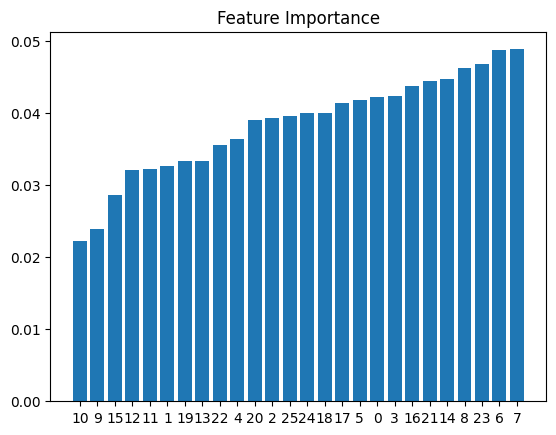

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [7] #accuracy = 0.711679, auc = 0.783759 (2, 7, 4 kolom terakhir)
important_features = [7, 6] #accuracy = 0.711679, auc = 0.783759 (1, 6, 3 kolom terakhir)
important_features = [7, 6, 23] #accuracy = 0.715328, auc = 0.786496 (1, 6, 4 kolom terakhir)
important_features = [7, 6, 23, 8, 14, 21, 16, 3, 0, 5, 17, 18] #accuracy = 0.718978, auc = 0.789233 (1, 0, 0 kolom pertama dan 1, 2, 0 kolom terakhir)
xtrain_if = xtrain.iloc[:, important_features]
xtest_if = xtest.iloc[:, important_features]

rfc.fit(xtrain_if, ytrain)

y_pred_if = rfc.predict(xtest_if)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_if)

array([[  1,  32,   1],
       [  0, 196,   2],
       [  0,  42,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_if)
presisi = precision_score(ytest, y_pred_if, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_if, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_if, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.718978
1  Precision  0.648662
2     Recall  0.718978
3   F1 Score  0.612369


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_if))

              precision    recall  f1-score   support

        -1.0       1.00      0.03      0.06        34
         0.0       0.73      0.99      0.84       198
         1.0       0.00      0.00      0.00        42

    accuracy                           0.72       274
   macro avg       0.58      0.34      0.30       274
weighted avg       0.65      0.72      0.61       274



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_if)

0.7892335766423356

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance setelah VC

Feature ranking:
1. feature 9 (0.008479)
2. feature 15 (0.009405)
3. feature 19 (0.011449)
4. feature 11 (0.012750)
5. feature 12 (0.014471)
6. feature 18 (0.016484)
7. feature 10 (0.016797)
8. feature 1 (0.022412)
9. feature 22 (0.022706)
10. feature 21 (0.022774)
11. feature 4 (0.023522)
12. feature 2 (0.025565)
13. feature 13 (0.025682)
14. feature 17 (0.027496)
15. feature 20 (0.030823)
16. feature 24 (0.031694)
17. feature 5 (0.034557)
18. feature 3 (0.046687)
19. feature 16 (0.049220)
20. feature 14 (0.051912)
21. feature 25 (0.058471)
22. feature 6 (0.068652)
23. feature 7 (0.072887)
24. feature 8 (0.076173)
25. feature 23 (0.097364)
26. feature 0 (0.121565)


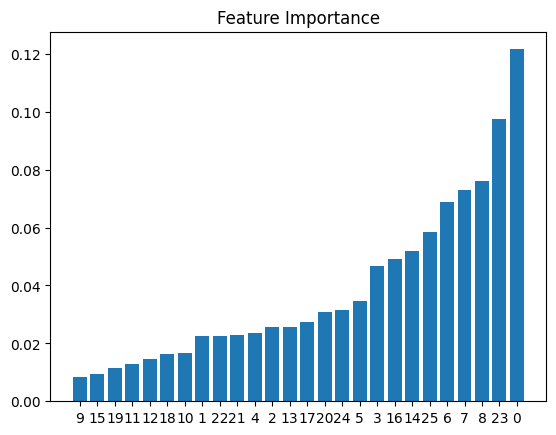

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [0] #accuracy = 0.722628, auc = 0.791971
important_features = [0, 23] #accuracy = 0.718978, auc = 0.789233
important_features = [0, 23, 8] #accuracy = 0.718978, auc = 0.789233
important_features = [0, 23, 8, 7] #accuracy = 0.722628, auc = 0.791970
important_features = [0, 23, 8, 7, 6] #accuracy = 0.722628, auc = 0.791970
important_features = [0, 23, 8, 7, 6, 25] #accuracy = 0.718978, auc = 0.789233
important_features = [0, 23, 8, 7, 6, 25, 14] #accuracy = 0.722628, auc = 0.791970
important_features = [0, 23, 8, 7, 6, 25, 14, 16] #accuracy = 0.722628, auc = 0.791970
important_features = [0, 23, 8, 7, 6, 25, 14, 16, 3] #accuracy = 0.722628, auc = 0.791970
xtrain_if = xtrain.iloc[:, important_features]
xtest_if = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_if, ytrain)

y_pred_if = rfc_bestvc1.predict(xtest_if)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_if)

array([[  0,  43,   0],
       [  0, 210,   0],
       [  0,  67,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_if)
presisi = precision_score(ytest, y_pred_if, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_if, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_if, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.722628
1  Precision  0.600016
2     Recall  0.722628
3   F1 Score  0.612745


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_if)

0.7919708029197081

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 10 (0.007659)
2. feature 9 (0.007818)
3. feature 11 (0.011224)
4. feature 15 (0.011420)
5. feature 12 (0.020092)
6. feature 4 (0.026924)
7. feature 13 (0.029054)
8. feature 19 (0.031790)
9. feature 1 (0.031858)
10. feature 16 (0.034555)
11. feature 2 (0.038305)
12. feature 5 (0.039138)
13. feature 18 (0.039845)
14. feature 3 (0.042902)
15. feature 24 (0.044509)
16. feature 25 (0.045797)
17. feature 17 (0.046233)
18. feature 0 (0.046314)
19. feature 22 (0.046963)
20. feature 14 (0.049154)
21. feature 23 (0.053370)
22. feature 20 (0.054020)
23. feature 7 (0.054100)
24. feature 8 (0.057566)
25. feature 6 (0.059428)
26. feature 21 (0.069962)


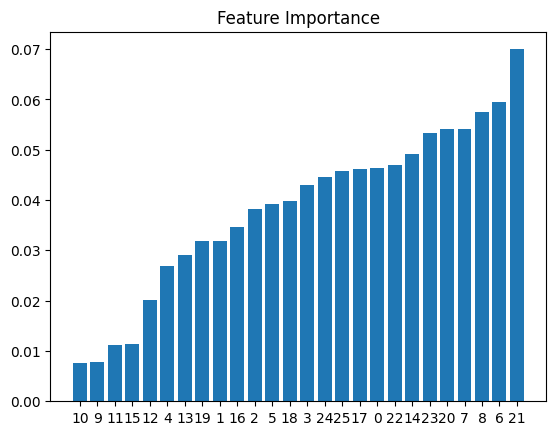

In [ ]:
importances = rfc_bestr33.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [21, 6, 8, 7, 20, 23, 14, 22, 0, 17, 25, 24, 3] #accuracy = 0.704380, auc = 0.778285 (2, 2, 1 kolom pertama dan 2, 8, 3 kolom terakhir)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr33.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr33.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  2,  30,   2],
       [  2, 188,   8],
       [  1,  38,   3]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted')
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.704380
1  Precision  0.615688
2     Recall  0.704380
3   F1 Score  0.627925


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.40      0.06      0.10        34
         0.0       0.73      0.95      0.83       198
         1.0       0.23      0.07      0.11        42

    accuracy                           0.70       274
   macro avg       0.46      0.36      0.35       274
weighted avg       0.62      0.70      0.63       274



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.7782846715328466

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.653125
1  Precision  0.445173
2     Recall  0.351462
3   F1 Score  0.312326


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5162272149618955

## Tahun 2018

In [ ]:
# pisahin data
start = '2018-01-01'
end = '2018-12-31'
adro18 = adro_copy.loc[(adro_copy['Date'] >= start) & (adro_copy['Date'] <= end)]
adro18 = pd.DataFrame(adro18)

start = '2018-01-01'
end = '2018-12-31'
indy18 = indy_copy.loc[(indy_copy['Date'] >= start) & (indy_copy['Date'] <= end)]
indy18 = pd.DataFrame(indy18)

start = '2018-01-01'
end = '2018-12-31'
ptba18 = ptba_copy.loc[(ptba_copy['Date'] >= start) & (ptba_copy['Date'] <= end)]
ptba18 = pd.DataFrame(ptba18)

start = '2018-01-01'
end = '2018-12-31'
toba18 = toba_copy.loc[(toba_copy['Date'] >= start) & (toba_copy['Date'] <= end)]
toba18 = pd.DataFrame(toba18)

start = '2018-01-01'
end = '2018-12-31'
untr18 = untr_copy.loc[(untr_copy['Date'] >= start) & (untr_copy['Date'] <= end)]
untr18 = pd.DataFrame(untr18)

In [ ]:
adro18.drop(['Date'], axis = 1, inplace = True)
indy18.drop(['Date'], axis = 1, inplace = True)
ptba18.drop(['Date'], axis = 1, inplace = True)
toba18.drop(['Date'], axis = 1, inplace = True)
untr18.drop(['Date'], axis = 1, inplace = True)

In [ ]:
adro_18 = adro18.copy()
indy_18 = indy18.copy()
ptba_18 = ptba18.copy()
toba_18 = toba18.copy()
untr_18 = untr18.copy()

In [ ]:
saham18 = pd.concat([adro18, indy18, ptba18, toba18, untr18], axis = 0)
print(saham18)

     closen  predn  SES adj close        MACD          MTM        RSI  \
254     0.0    1.0    1206.422194   11.658998   114.039500  71.691184   
255    -1.0   -1.0    1213.940345   11.808021    92.903800  73.485861   
256     1.0    1.0    1201.456623   10.937042    64.505300  66.037643   
257     1.0    1.0    1222.827554   11.279188    81.094700  71.361656   
258     1.0    1.0    1257.877217   13.259247   113.753600  77.546725   
..      ...    ...            ...         ...          ...        ...   
510    -1.0   -1.0   23682.034820 -283.840293 -1181.919097  24.640811   
511     0.0    1.0   23297.280100 -303.185087 -1371.590409  21.954439   
512     0.0   -1.0   23294.786540 -310.285310 -1434.777624  21.937832   
513     0.0    1.0   23188.050490 -314.381034 -1730.096822  21.202271   
514     0.0    1.0   23134.682470 -313.200450 -1592.930251  20.828153   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
254   689.904457 -2.295830e+11   67.856798  88.293

### Pake Data Lengkap

### Data Outlier

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(saham18))
print(z_score)

       closen     predn  SES adj close      MACD       MTM       RSI  \
254  0.023088  0.858885       0.540853  0.138304  0.162369  1.142941   
255  1.650806  1.164301       0.540151  0.139551  0.139577  1.232456   
256  1.696982  0.858885       0.541317  0.132267  0.108952  0.860953   
257  1.696982  0.858885       0.539322  0.135128  0.126842  1.126505   
258  1.696982  0.858885       0.536050  0.151686  0.162061  1.435003   
..        ...       ...            ...       ...       ...       ...   
510  1.650806  1.164301       1.557456  2.332737  1.235176  1.203838   
511  0.023088  0.858885       1.521536  2.494503  1.439716  1.337829   
512  0.023088  1.164301       1.521303  2.553877  1.507856  1.338657   
513  0.023088  0.858885       1.511338  2.588127  1.826324  1.375345   
514  0.023088  0.858885       1.506356  2.578254  1.678406  1.394006   

          ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
254  0.509646  0.518331  0.703006  1.739160  ...  1.331410  0.9

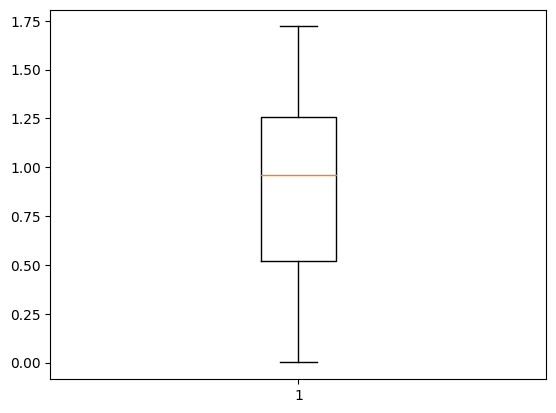

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SO%d'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
saham18 = saham18[z_score < threshold]
print(saham18)

     closen  predn  SES adj close        MACD          MTM        RSI  \
254     0.0    1.0    1206.422194   11.658998   114.039500  71.691184   
255    -1.0   -1.0    1213.940345   11.808021    92.903800  73.485861   
256     1.0    1.0    1201.456623   10.937042    64.505300  66.037643   
257     1.0    1.0    1222.827554   11.279188    81.094700  71.361656   
258     1.0    1.0    1257.877217   13.259247   113.753600  77.546725   
..      ...    ...            ...         ...          ...        ...   
510    -1.0   -1.0   23682.034820 -283.840293 -1181.919097  24.640811   
511     0.0    1.0   23297.280100 -303.185087 -1371.590409  21.954439   
512     0.0   -1.0   23294.786540 -310.285310 -1434.777624  21.937832   
513     0.0    1.0   23188.050490 -314.381034 -1730.096822  21.202271   
514     0.0    1.0   23134.682470 -313.200450 -1592.930251  20.828153   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
254   689.904457 -2.295830e+11   67.856798  88.293

In [ ]:
saham18 = saham18.dropna()
print(saham18)

     closen  predn  SES adj close        MACD          MTM        RSI  \
254     0.0    1.0    1206.422194   11.658998   114.039500  71.691184   
255    -1.0   -1.0    1213.940345   11.808021    92.903800  73.485861   
256     1.0    1.0    1201.456623   10.937042    64.505300  66.037643   
257     1.0    1.0    1222.827554   11.279188    81.094700  71.361656   
258     1.0    1.0    1257.877217   13.259247   113.753600  77.546725   
..      ...    ...            ...         ...          ...        ...   
510    -1.0   -1.0   23682.034820 -283.840293 -1181.919097  24.640811   
511     0.0    1.0   23297.280100 -303.185087 -1371.590409  21.954439   
512     0.0   -1.0   23294.786540 -310.285310 -1434.777624  21.937832   
513     0.0    1.0   23188.050490 -314.381034 -1730.096822  21.202271   
514     0.0    1.0   23134.682470 -313.200450 -1592.930251  20.828153   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
254   689.904457 -2.295830e+11   67.856798  88.293

In [ ]:
print(saham18['closen'].value_counts())

 0.0    736
-1.0    218
 1.0    203
Name: closen, dtype: int64


#### Data Splitting

In [ ]:
# membagi jadi x dan y
x = saham18.drop(['predn', 'closen'], axis = 1)
y = saham18['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

#### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

##### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
confusion_matrix = np.array(confusion_matrix)
print(confusion_matrix)

[[  3  61   2]
 [  9 208   4]
 [  2  58   1]]


In [ ]:
accuracy_score(ytrain, y_predta)

0.8329621380846325

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.609195
1  Precision  0.469632
2     Recall  0.609195
3   F1 Score  0.501467


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.21      0.05      0.08        66
         0.0       0.64      0.94      0.76       221
         1.0       0.14      0.02      0.03        61

    accuracy                           0.61       348
   macro avg       0.33      0.33      0.29       348
weighted avg       0.47      0.61      0.50       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.706896551724138

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte, average= "micro", multi_class = "ovr")

#fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(100,500, 50))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 50, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 150, max_depth = 2,
                             min_samples_split = 86, min_samples_leaf = 14,
                             max_features = None, random_state = 100)
# cv = 3
# None = sqrt = log2: accuracy = 0.622995, auc = 0.717246

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
# masih error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  0,  74,   0],
       [  0, 245,   0],
       [  0,  73,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestvc1, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.622995
1  Precision  0.388122
2     Recall  0.622995
3   F1 Score  0.478279


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.7172459893048129

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(102,1000,100)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'f1_micro')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr15 = RandomForestClassifier(n_estimators = 602, max_depth = 138,
                             min_samples_split = 74, min_samples_leaf = 10,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0, 1, 1 kolom pertama (pake sqrt; 0.632184, 0.724137) semuanya sama begini

rfc_bestr15.fit(xtrain, ytrain)

y_predbestr15 = rfc_bestr15.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 302, max_depth = 282,
                             min_samples_split = 90, min_samples_leaf = 22,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 0 untuk semua (gak dipake)

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 702, max_depth = 106,
                             min_samples_split = 94, min_samples_leaf = 6,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0, 1, 1 kolom pertama dan 1, 2, 1 kolom terakhir (pake 0.25; 0.629310, 0.721982)
# 0, 2, 1 kolom pertama dan 1, 2, 1 kolom terakhir (pake 0.5; 0.626437, 0.719827)
# 0, 3, 1 kolom pertama dan 1, 2, 1 kolom terakhir(pake 0.75; 0.623563, 0.717672)
# 0 (pake 1)
# 0, 3, 1 kolom pertama dan 1, 3, 1 kolom terakhir (pake None; 0.620690, 0.715517)
# 0, 1, 1 kolom pertama (pake log2; 0.617816, 0.724137)
# 0, 1, 1 kolom pertama (pake sqrt; 0.632184, 0.724137)

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 602, max_depth = 110,
                             min_samples_split = 10, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 5, 9, 3 kolom pertama dan 2, 5, 2 kolom terakhir (pake 0.25; 0.614943, 0.711206) -> ini
# 5, 12, 3 kolom pertama dan 3, 4, 4 kolom terakhir (pake 0.5; 0.614943, 0.711206)
# 5, 11, 3 kolom pertama dan 1, 5, 4 kolom terakhir (pake 0.75; 0.614943, 0.711206)
# 2, 7, 1 kolom pertama dan 0, 2, 1 kolom terakhir (pake 1; 0.617816, 0.713362)
# 4, 12, 3 kolom pertama dan 2, 3, 4 kolom terakhir (pake None; 0.614943, 0.711206)
# 4, 9, 2 kolom pertama dan 2, 4, 3 kolom terakhir (pake log2; 0.617816, 0.713362)
# 5, 9, 2 kolom pertama dan 2, 4, 3 kolom terakhir (pake sqrt; 0.620690, 0.715517) -> ini

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 302, max_depth = 66,
                             min_samples_split = 54, min_samples_leaf = 10,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 0, 2, 1 kolom pertama (pake 0.25; 0.629310, 0.721982)
# 0, 3, 1 kolom pertama dan 1, 2, 0 kolom terakhir (pake 0.5; 0.620690, 0.715517)
# 0, 4, 1 kolom pertama dan 1, 2, 1 kolom terakhir (pake 0.75; 0.620690, 0.715517)
# 0 (pake 1)
# 0, 4, 1 kolom pertama dan 1, 2, 1 kolom terakhir (pake None; 0.620690, 0.715517)
# 0, 1, 1 kolom pertama (pake log2; 0.632184, 0.724137)
# 0, 2, 1 kolom pertama (pake sqrt; 0.62069, 0.715517)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 402, max_depth = 234,
                             min_samples_split = 66, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 0, 2, 1 kolom pertama dan 1, 2, 2 kolom terakhir (pake 0.25; 0.629310, 0.721982)
# 0, 3, 1 kolom pertama dan 1, 2, 2 kolom terakhir (pake 0.5; 0.626437, 0.719827)
# 0, 4, 1 kolom pertama dan 1, 3, 2 kolom terakhir (pake 0.75; 0.62069, 0.715517)
# 0, 2, 1 kolom pertama (pake 1;0.629310, 0.721982)
# 0, 4, 1 kolom pertama dan 1, 3, 2 kolom terakhir (pake None; 0.62069, 0.715517)
# 0, 2, 1 kolom pertama dan 1, 2, 2 kolom terakhir (pake log2; 0.626437, 0.719827)
# 0, 3, 1 kolom pertama dan 1, 2, 2 kolom terakhir (pake sqrt; 0.626437, 0.719827)

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 102, max_depth = 70,
                             min_samples_split = 98, min_samples_leaf = 86,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# accuracy = 0.717245, auc = 0.717245
# pake adro3

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 102, max_depth = 202,
                             min_samples_split = 82, min_samples_leaf = 34,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# accuracy = 0.622995, auc = 0.717245
# pake adro3

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 200,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr')

randoms.fit(xtrain, ytrain)

randoms.best_params_

In [ ]:
rfc_bestr19 = RandomForestClassifier(n_estimators = 300, max_depth = 24,
                             min_samples_split = 30, min_samples_leaf = 22,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 2, 2, 0 kolom pertama (pake None; 0.635057, 0.726293)

rfc_bestr19.fit(xtrain, ytrain)

y_predbestr19 = rfc_bestr19.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr18 = RandomForestClassifier(n_estimators = 250, max_depth = 24,
                             min_samples_split = 32, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 2, 8, 3 kolom pertama dan 2, 2, 3 kolom terakhir (pake None; 0.626437, 0.719827)
# 4, 9, 4 kolom pertama dan 2, 4, 3 kolom terakhir (pake log2; 0.617816, 0.713362)
# 3, 6, 1 kolom pertama dan 1, 2, 2 kolom terakhir (pake sqrt; 0.617816, 0.713362)

rfc_bestr18.fit(xtrain, ytrain)

y_predbestr18 = rfc_bestr18.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr17 = RandomForestClassifier(n_estimators = 250, max_depth = 26,
                             min_samples_split = 10, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 4, 14, 3 kolom pertama dan 2, 3, 4 kolom terakhir (pake None; 0.609195, 0.706896)
# 4, 9, 4 kolom pertama dan 2, 4, 3 kolom terakhir (pake log2; 0.617816, 0.713362)
# 3, 9, 3 kolom pertama dan 3, 5, 2 kolom terakhir (pake sqrt; 0.609195, 0.706896)

rfc_bestr17.fit(xtrain, ytrain)

y_predbestr17 = rfc_bestr17.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr16 = RandomForestClassifier(n_estimators = 400, max_depth = 26,
                             min_samples_split = 18, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 3, 9, 3 kolom pertama dan 2, 2, 3 kolom terakhir (pake None; 0.620690, 0.715517)
# 3, 7, 2 kolom pertama dan 2, 3, 2 kolom terakhir (pake log2; 0.620690, 0.715517)
# 3, 8, 2 kolom pertama dan 2, 4, 2 kolom terakhir (pake sqrt; 0.614943, 0.711206)

rfc_bestr16.fit(xtrain, ytrain)

y_predbestr16 = rfc_bestr16.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 300, max_depth = 20,
                             min_samples_split = 16, min_samples_leaf = 18,
                             max_features = None, oob_score = True,
                            random_state = 100)

# accuracy = 0.620321, auc = 0.715241
# pake adro3

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 12, min_samples_leaf = 24,
                             max_features = None, oob_score = True,
                            random_state = 100)

# accuracy = 0.620321, auc = 0.715240
# pake adro3

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 250, max_depth = 28,
                             min_samples_split = 46, min_samples_leaf = 30,
                             max_features = None, oob_score = True,
                            random_state = 100)

# accuracy = 0.622995, auc = 0.717245
# pake adro3

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

#### RFRS Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr16)

array([[  3,  61,   2],
       [  9, 210,   2],
       [  3,  55,   3]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr16)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr16, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr16, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr16, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.620690
1  Precision  0.522140
2     Recall  0.620690
3   F1 Score  0.517128


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr16))

              precision    recall  f1-score   support

        -1.0       0.20      0.05      0.07        66
         0.0       0.64      0.95      0.77       221
         1.0       0.43      0.05      0.09        61

    accuracy                           0.62       348
   macro avg       0.42      0.35      0.31       348
weighted avg       0.52      0.62      0.52       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr16)

0.7155172413793103

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 9 (0.021664)
2. feature 10 (0.023964)
3. feature 11 (0.027781)
4. feature 12 (0.028860)
5. feature 13 (0.030701)
6. feature 15 (0.031240)
7. feature 1 (0.032357)
8. feature 16 (0.033162)
9. feature 0 (0.033992)
10. feature 19 (0.035224)
11. feature 5 (0.035551)
12. feature 24 (0.035858)
13. feature 17 (0.036388)
14. feature 3 (0.036614)
15. feature 7 (0.036664)
16. feature 2 (0.037008)
17. feature 6 (0.040976)
18. feature 25 (0.041382)
19. feature 4 (0.043280)
20. feature 18 (0.044697)
21. feature 8 (0.045352)
22. feature 21 (0.046564)
23. feature 20 (0.048370)
24. feature 14 (0.051370)
25. feature 22 (0.060056)
26. feature 23 (0.060927)


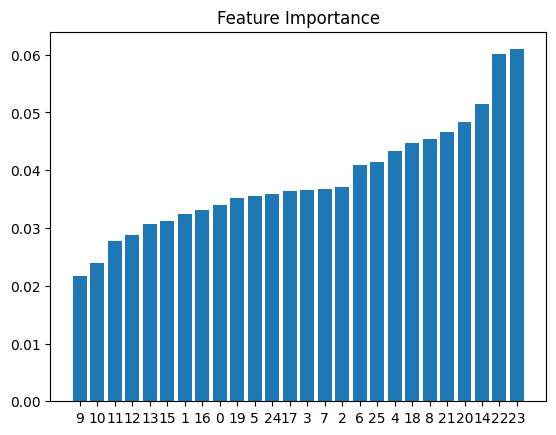

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [23, 22, 14, 20, 21, 8, 18, 4, 25] #accuracy = 0.612069, auc = 0.709051 (3, 11, 1 kolom pertama dan 2, 2, 2 kolom terakhir)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  3,  61,   2],
       [ 11, 208,   2],
       [  1,  58,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.612069
1  Precision  0.500311
2     Recall  0.612069
3   F1 Score  0.506601


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.20      0.05      0.07        66
         0.0       0.64      0.94      0.76       221
         1.0       0.33      0.03      0.06        61

    accuracy                           0.61       348
   macro avg       0.39      0.34      0.30       348
weighted avg       0.50      0.61      0.51       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.7090517241379309

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance setelah VC

Feature ranking:
1. feature 9 (0.003897)
2. feature 10 (0.004491)
3. feature 11 (0.005774)
4. feature 0 (0.006797)
5. feature 24 (0.007686)
6. feature 12 (0.012370)
7. feature 3 (0.013755)
8. feature 18 (0.015109)
9. feature 2 (0.018428)
10. feature 15 (0.019593)
11. feature 17 (0.020248)
12. feature 25 (0.020449)
13. feature 1 (0.020974)
14. feature 13 (0.024330)
15. feature 5 (0.026309)
16. feature 16 (0.027554)
17. feature 19 (0.029290)
18. feature 21 (0.034603)
19. feature 4 (0.044445)
20. feature 20 (0.049477)
21. feature 6 (0.058155)
22. feature 7 (0.066335)
23. feature 8 (0.077328)
24. feature 22 (0.097667)
25. feature 14 (0.124225)
26. feature 23 (0.170712)


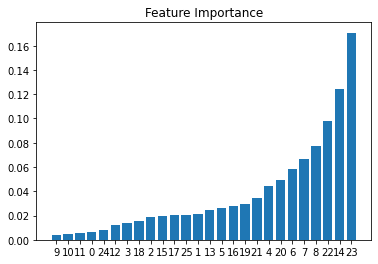

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [23] #accuracy = 0.622449, auc = 0.50621
important_features = [23, 14] #accuracy = 0.625000, auc = 0.50061
important_features = [23, 14, 22] #accuracy = 0.625000, auc = 0.50061
important_features = [23, 14, 22, 8] #accuracy = 0.625000, auc = 0.5
important_features = [23, 14, 22, 8, 7] #accuracy = 0.625000, auc = 0.5
#important_features = [23, 14, 22, 8, 7, 6] #accuracy = 0.625000, auc = 0.5
#important_features = [23, 14, 22, 8, 7, 6, 20] #accuracy = 0.625000, auc = 0.5
#important_features = [23, 14, 22, 8, 7, 6, 20, 4] #accuracy = 0.625000, auc = 0.5
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

array([[  0,  74,   0],
       [  0, 245,   0],
       [  0,  73,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.625000
1  Precision  0.208333
2     Recall  0.333333
3   F1 Score  0.256410


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 9 (0.006449)
2. feature 10 (0.006914)
3. feature 11 (0.014607)
4. feature 15 (0.016308)
5. feature 12 (0.018177)
6. feature 16 (0.019442)
7. feature 1 (0.022056)
8. feature 0 (0.024364)
9. feature 13 (0.027836)
10. feature 24 (0.031783)
11. feature 17 (0.034389)
12. feature 3 (0.034570)
13. feature 4 (0.034819)
14. feature 19 (0.036596)
15. feature 7 (0.037072)
16. feature 2 (0.037125)
17. feature 5 (0.040670)
18. feature 25 (0.041073)
19. feature 18 (0.048665)
20. feature 6 (0.049512)
21. feature 21 (0.054433)
22. feature 8 (0.058566)
23. feature 20 (0.064659)
24. feature 14 (0.071015)
25. feature 22 (0.074704)
26. feature 23 (0.094197)


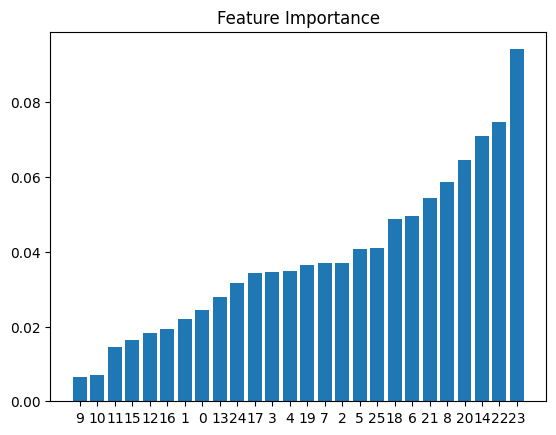

In [ ]:
importances = rfc_bestr16.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# rf 12 pake sqrt
#important_features = [23, 22, 14, 20, 8, 18, 21, 6, 25, 4] #accuracy = 0.617816, auc = 0.713362 (3, 9, 1 kolom pertama dan 2, 3, 2 kolom terakhir)
# -- rf 12 pake 0.25
#important_features = [23, 22, 14, 20, 21, 8, 18, 6, 25] #accuracy = 0.620690, auc = 0.715517 (3, 8, 0 kolom pertama dan 2, 2, 2 kolom terakhir)
#important_features = [23, 22, 14, 20, 21, 8, 18, 6] #accuracy = 0.617816, auc = 0.713362 (3, 8, 0 kolom pertama dan 2, 2, 2 kolom terakhir)
# -- rf 16 pake none
important_features = [23, 22, 14, 20, 8, 21, 6, 18] # accuracy = 0.620690, auc = 0.715517 (2, 6, 1 kolom pertama dan 2, 4, 3 kolom terakhir)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr16.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr16.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  2,  62,   2],
       [  6, 211,   4],
       [  1,  57,   3]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.620690
1  Precision  0.506627
2     Recall  0.620690
3   F1 Score  0.511518


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.22      0.03      0.05        66
         0.0       0.64      0.95      0.77       221
         1.0       0.33      0.05      0.09        61

    accuracy                           0.62       348
   macro avg       0.40      0.34      0.30       348
weighted avg       0.51      0.62      0.51       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.7155172413793103

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Tahun 2019


In [ ]:
# pisahin data
start = '2019-01-01'
end = '2019-12-31'
adro19 = adro_copy.loc[(adro_copy['Date'] >= start) & (adro_copy['Date'] <= end)]
adro19 = pd.DataFrame(adro19)

start = '2019-01-01'
end = '2019-12-31'
indy19 = indy_copy.loc[(indy_copy['Date'] >= start) & (indy_copy['Date'] <= end)]
indy19 = pd.DataFrame(indy19)

start = '2019-01-01'
end = '2019-12-31'
ptba19 = ptba_copy.loc[(ptba_copy['Date'] >= start) & (ptba_copy['Date'] <= end)]
ptba19 = pd.DataFrame(ptba19)

start = '2019-01-01'
end = '2019-12-31'
toba19 = toba_copy.loc[(toba_copy['Date'] >= start) & (toba_copy['Date'] <= end)]
toba19 = pd.DataFrame(toba19)

start = '2019-01-01'
end = '2019-12-31'
untr19 = untr_copy.loc[(untr_copy['Date'] >= start) & (untr_copy['Date'] <= end)]
untr19 = pd.DataFrame(untr19)

In [ ]:
adro19.drop(['Date'], axis = 1, inplace = True)
indy19.drop(['Date'], axis = 1, inplace = True)
ptba19.drop(['Date'], axis = 1, inplace = True)
toba19.drop(['Date'], axis = 1, inplace = True)
untr19.drop(['Date'], axis = 1, inplace = True)

In [ ]:
saham19 = pd.concat([adro19, indy19, ptba19, toba19, untr19], axis = 0)
print(saham19)

     closen  predn  SES adj close      MACD         MTM        RSI  \
515     0.0    1.0     840.661170 -6.889417  -31.183600  25.313617   
516     0.0    1.0     844.614154 -5.926736  -14.067500  28.623746   
517     1.0    1.0     848.322458 -4.892145  -12.199100  31.667733   
518     0.0    1.0     905.593206 -0.786268   42.467400  59.938477   
519     0.0    1.0     934.228579  3.798047   71.484900  67.206721   
..      ...    ...            ...       ...         ...        ...   
768     0.0   -1.0   19106.916390  0.162938   85.828296  49.253413   
769     1.0    1.0   18963.926950 -7.122783   65.109458  46.927941   
770     0.0    1.0   19081.083590 -5.520188  443.151404  49.040113   
771     0.0   -1.0   19161.857220  0.341994  609.979997  50.495486   
772     0.0   -1.0   19135.660060  3.042536  393.768319  49.999285   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
515   419.240726 -5.604380e+11 -121.993623  25.805882  ... -51.264291   
516   415.640

### Pake Data Lengkap

#### Data Outlier

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(saham19))
print(z_score)

       closen     predn  SES adj close      MACD       MTM       RSI  \
515  0.042118  0.928155       0.539838  0.063832  0.050609  1.214878   
516  0.042118  0.928155       0.539349  0.074020  0.074752  1.014101   
517  1.853172  0.928155       0.538891  0.084970  0.077387  0.829467   
518  0.042118  0.928155       0.531811  0.128425  0.154495  0.885307   
519  0.042118  0.928155       0.528271  0.176943  0.195425  1.326165   
..        ...       ...            ...       ...       ...       ...   
768  0.042118  1.077406       1.718278  0.138471  0.215657  0.237200   
769  1.853172  0.928155       1.700602  0.061362  0.186433  0.096148   
770  0.042118  0.928155       1.715085  0.078323  0.719670  0.224262   
771  0.042118  1.077406       1.725070  0.140366  0.954986  0.312539   
772  0.042118  1.077406       1.721832  0.168947  0.650014  0.282441   

          ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
515  0.487404  1.173084  0.976183  0.915622  ...  1.117293  0.3

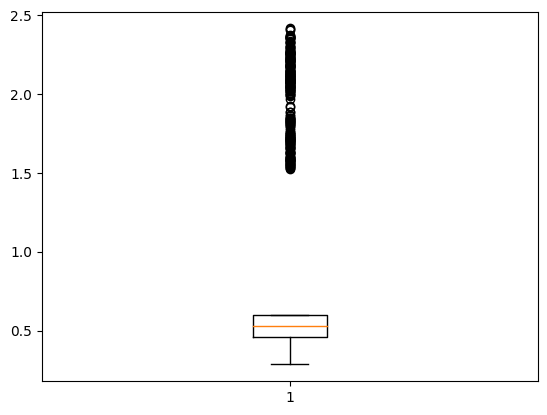

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'])
plt.show()

In [ ]:
threshold = 4
outliers = np.where(z_score > threshold)
saham19 = saham19[z_score < threshold]

In [ ]:
saham19 = saham19.dropna()
print(saham19)

     closen  predn  SES adj close      MACD         MTM        RSI  \
515     0.0    1.0     840.661170 -6.889417  -31.183600  25.313617   
516     0.0    1.0     844.614154 -5.926736  -14.067500  28.623746   
517     1.0    1.0     848.322458 -4.892145  -12.199100  31.667733   
518     0.0    1.0     905.593206 -0.786268   42.467400  59.938477   
519     0.0    1.0     934.228579  3.798047   71.484900  67.206721   
..      ...    ...            ...       ...         ...        ...   
768     0.0   -1.0   19106.916390  0.162938   85.828296  49.253413   
769     1.0    1.0   18963.926950 -7.122783   65.109458  46.927941   
770     0.0    1.0   19081.083590 -5.520188  443.151404  49.040113   
771     0.0   -1.0   19161.857220  0.341994  609.979997  50.495486   
772     0.0   -1.0   19135.660060  3.042536  393.768319  49.999285   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
515   419.240726 -5.604380e+11 -121.993623  25.805882  ... -51.264291   
516   415.640

In [ ]:
print(saham19['closen'].value_counts())

 0.0    858
-1.0    201
 1.0    174
Name: closen, dtype: int64


#### Data Splitting

In [ ]:
# membagi jadi x dan y
x = saham19.drop(['predn', 'closen'], axis = 1)
y = saham19['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

#### Data Split pk SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain_resampled, ytrain_resampled)

#y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[ 13,  24,  11],
       [ 48, 175,  45],
       [ 10,  30,  14]])

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.545946
1  Precision  0.606465
2     Recall  0.545946
3   F1 Score  0.571387


#### Data Split pk random undersampling


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 'majority', random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state = 100)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

#y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[25, 20, 18],
       [13, 27,  6],
       [21, 20, 15]])

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.406061
1  Precision  0.404671
2     Recall  0.406061
3   F1 Score  0.396886


#### Data Split pk random oversampling


In [ ]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy = 'minority', random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

#y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[  1,  54,  16],
       [  3, 218,  51],
       [  0,  11, 222]])

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.765625
1  Precision  0.705311
2     Recall  0.765625
3   F1 Score  0.718327


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.82421875

#### Data Split pk adasyn


In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()

x_resampled, y_resampled = ada.fit_resample(xtrain, ytrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(x_resampled, y_resampled)

#y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[ 12,  23,  13],
       [ 51, 170,  47],
       [ 11,  28,  15]])

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.532432
1  Precision  0.607399
2     Recall  0.532432
3   F1 Score  0.563082


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.6493243243243244

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.16      0.25      0.20        48
         0.0       0.77      0.63      0.70       268
         1.0       0.20      0.28      0.23        54

    accuracy                           0.53       370
   macro avg       0.38      0.39      0.37       370
weighted avg       0.61      0.53      0.56       370



#### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

##### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[  3,  45,   0],
       [  8, 254,   6],
       [  4,  48,   2]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.8377752027809965

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.700000
1  Precision  0.592629
2     Recall  0.700000
3   F1 Score  0.620075


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.20      0.06      0.10        48
         0.0       0.73      0.95      0.83       268
         1.0       0.25      0.04      0.06        54

    accuracy                           0.70       370
   macro avg       0.39      0.35      0.33       370
weighted avg       0.59      0.70      0.62       370



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.7749999999999999

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte, average= "micro", multi_class = "ovr")

#fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_predte))

#### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(100,500, 10))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 50, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc2 = RandomForestClassifier(n_estimators = 350, max_depth = 2,
                             min_samples_split = 50, min_samples_leaf = 12,
                             max_features = 1, random_state = 100)
# cv = 3
# None = 0.25 = 0.5 = 0.75 = 1: accuracy = 0.691257, auc = 0.768443
# sqrt: accuracy = 0.691257, auc = 0.768443
# log2: accuracy = 0.691257, auc = 0.768443

rfc_bestvc2.fit(xtrain, ytrain)

y_predbestvc2 = rfc_bestvc2.predict(xtest)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 360, max_depth = 4,
                             min_samples_split = 72, min_samples_leaf = 12,
                             max_features = 'log2', random_state = 100)
# cv = 3
# None = sqrt = log2: accuracy = 0.691257, auc = 0.768443

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
# masih error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc2)

array([[  0,  58,   0],
       [  0, 253,   0],
       [  0,  55,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestvc1, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.691257
1  Precision  0.477836
2     Recall  0.691257
3   F1 Score  0.565066


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.7684426229508197

#### Random Search

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 50, max_depth = 142,
                             min_samples_split = 14, min_samples_leaf = 6,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 2, 6, 2 kolom pertama dan 1, 3, 2 kolom terakhir (pake 0.25; 0.710811, 0.783108) -> ini bisa
# 3, 7, 4 kolom pertama dan 0, 3, 1 kolom terakhir (pake 0.5; 0.708108, 0.781081) -> ini juga bisa
# 1, 11, 3 kolom pertama dan 0, 3, 1 kolom terakhir (pake 0.75; 0.691892, 0.768918)
# 0 (pake 1; 0.724324, 0.793243)
# 2, 7, 3 kolom pertama dan 0, 6, 2 kolom terakhir (pake None; 0.700000, 0.774999)
# 1, 7, 4 kolom pertama dan 0, 1, 1 kolom terakhir (pake log2; 0.708108, 0.781081)
# 3, 4, 3 kolom pertama (pake sqrt; 0.721622, 0.791216)

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 300, max_depth = 26,
                             min_samples_split = 8, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 3, 11, 6 kolom pertama dan 3, 9, 6 kolom terakhir (pake None; 0.694595, 0.770945)
# 4, 10, 6 kolom pertama dan 1, 5, 4 kolom terakhir (pake log2; 0.705405, 0.779054) -> ini juga bisa
# 3, 13, 6 kolom pertama dan 1, 6, 5 kolom terakhir(pake sqrt; 0.694595, 0.770945)

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(50,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', None, 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 200, max_depth = 190,
                             min_samples_split = 2, min_samples_leaf = 66,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 0 semua

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 200, max_depth = 274,
                             min_samples_split = 66, min_samples_leaf = 38,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0 semua

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 900, max_depth = 34,
                             min_samples_split = 6, min_samples_leaf = 78,
                             max_features = 0.25, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 500, max_depth = 98,
                             min_samples_split = 26, min_samples_leaf = 2,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 2, 6, 3 kolom pertama dan 0, 1, 0 kolom terakhir (pake 0.25; 0.710811, 0.791216)
# 3, 8, 3 kolom pertama dan 0, 1, 0 kolom terakhir (pake 0.5; 0.708108, 0.781081)
# 2, 3, 3 kolom pertama dan 0, 1, 0 kolom terakhir (pake 0.75; 0.702703, 0.777027)
# 0, 1, 0 kolom pertama (pake 1; 0.721622, 0.791216)
# 2, 9, 3 kolom pertama dan 0, 1, 1 kolom terakhir (pake None; 0.705405, 0.779054)
# 2, 3, 3 kolom pertama (pake log2; 0.721622, 0.791216)
# 3, 4, 3 kolom pertama (pake sqrt; 0.721622, 0.791216)

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 200, max_depth = 202,
                             min_samples_split = 90, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 0 untuk semuanya

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 702, max_depth = 166,
                             min_samples_split = 30, min_samples_leaf = 298,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# accuracy = 0.691257, auc = 0.768442

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 702, max_depth = 166,
                             min_samples_split = 30, min_samples_leaf = 298,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# accuracy = 0.691257, auc = 0.768442

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 200,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'f1_micro')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 450, max_depth = 22,
                             min_samples_split = 8, min_samples_leaf = 20,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0 semuanya

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 250, max_depth = 28,
                             min_samples_split = 14, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 3, 12, 5 kolom pertama dan 2, 8, 3 kolom terakhir (pake None; 0.686486, 0.764864)
# 3, 10, 3 kolom pertama dan 0, 4, 1 kolom terakhir(pake sqrt; 0.697297, 0.772972)
# 3, 10, 4 kolom pertama dan 0, 4, 1 kolom terakhir(pake sqrt; 0.697297, 0.772972)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 300, max_depth = 24,
                             min_samples_split = 2, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 4, 13, 5 kolom pertama dan 2, 11, 7 kolom terakhir (pake None; 0.689189, 0.766891)
# 4, 13, 8 kolom pertama dan 1, 8, 4 kolom terakhir (pake log2; 0.689189, 0.766891)
# 3, 13, 6 kolom pertama dan 2, 9, 6 kolom terakhir(pake sqrt; 0.689189, 0.766891)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

##### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr10)

array([[  4,  43,   1],
       [ 10, 253,   5],
       [  6,  44,   4]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr10)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr10, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr10, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr10, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.705405
1  Precision  0.623307
2     Recall  0.705405
3   F1 Score  0.636315


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr10))

              precision    recall  f1-score   support

        -1.0       0.20      0.08      0.12        48
         0.0       0.74      0.94      0.83       268
         1.0       0.40      0.07      0.12        54

    accuracy                           0.71       370
   macro avg       0.45      0.37      0.36       370
weighted avg       0.62      0.71      0.64       370



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr10)

0.7790540540540541

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 10 (0.018710)
2. feature 9 (0.021552)
3. feature 11 (0.025521)
4. feature 15 (0.025835)
5. feature 13 (0.028150)
6. feature 4 (0.030974)
7. feature 12 (0.034342)
8. feature 6 (0.037845)
9. feature 24 (0.037935)
10. feature 7 (0.038445)
11. feature 0 (0.038722)
12. feature 19 (0.039154)
13. feature 2 (0.040012)
14. feature 23 (0.040153)
15. feature 25 (0.040412)
16. feature 1 (0.040753)
17. feature 5 (0.041360)
18. feature 22 (0.043026)
19. feature 8 (0.043636)
20. feature 17 (0.044271)
21. feature 14 (0.045559)
22. feature 16 (0.046950)
23. feature 18 (0.048457)
24. feature 21 (0.049057)
25. feature 3 (0.049401)
26. feature 20 (0.049769)


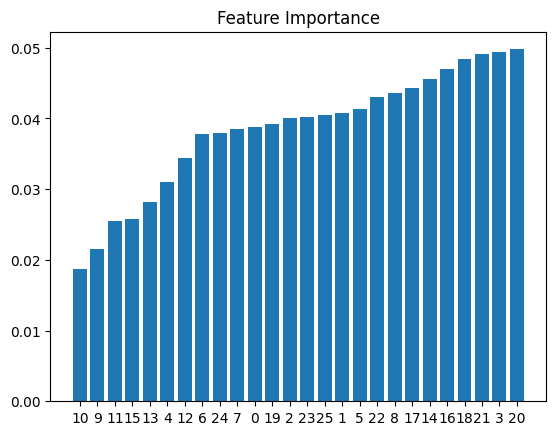

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
#important_features = [3, 20, 18, 5, 21, 17, 25, 14, 22, 24, 23, 0, 16]# accuracy = 0.705405, auc = 0.779054 (3, 8, 4 kolom pertama dan 1, 3, 1 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17, 25, 14, 22, 24, 23, 0]# accuracy = 0.713514, auc = 0.785135 (3, 8, 4 kolom pertama dan 2, 3, 4 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17, 25, 14, 22, 24, 23]# accuracy = 0.708108, auc = 0.781081 (2, 7, 3 kolom pertama dan 1, 3, 2 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17, 25, 14, 22, 24]# accuracy = 0.710811, auc = 0.783108 (4, 5, 3 kolom pertama dan 1, 4, 0 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17, 25, 14, 22]# accuracy = 0.702703, auc = 0.777027 (1, 6, 3 kolom pertama dan 1, 4, 1 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17, 25, 14]# accuracy = 0.702703, auc = 0.777027 (1, 7, 3 kolom pertama dan 1, 3, 1 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17, 25]# accuracy = 0.708108, auc = 0.781081 (1, 5, 4 kolom pertama dan 1, 2, 0 kolom terakhir)
#important_features = [3, 20, 18, 5, 21, 17]# accuracy = 0.713514, auc = 0.785135 (2, 6, 3 kolom pertama dan 0, 1, 1 kolom terakhir)
#important_features = [3, 20, 18, 5, 21]# accuracy = 0.713514, auc = 0.785135 (3, 7, 2 kolom pertama dan 1, 1, 1 kolom terakhir)
#important_features = [3, 20, 18]# accuracy = 0.708108, auc = 0.772972 (1, 6, 1 kolom pertama dan 0, 1, 0 kolom terakhir)
#important_features = [3, 20]# accuracy = 0.710811, auc = 0.783108 (5, 8, 1 kolom pertama dan 0, 2, 0 kolom terakhir)
# ---- pake rfc baru
important_features = [20, 3, 21, 18, 16, 14, 17, 8, 22, 5, 1, 25, 23, 2] # accuracy = 0.708108, auc = 0.781081 (3, 7, 2 kolom pertama dan 0, 3, 1 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14, 17, 8, 22, 5, 1, 25, 23] # accuracy = 0.702703, auc = 0.777027 (3, 7, 3 kolom pertama dan 0, 4, 0 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14, 17, 8, 22, 5, 1, 25] # accuracy = 0.702703, auc = 0.777027 (1, 7, 2 kolom pertama dan 0, 4, 2 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14, 17, 8, 22, 5, 1] # accuracy = 0.705405, auc = 0.705405 (2, 6, 3 kolom pertama dan 0, 4, 1 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14, 17, 8, 22] # accuracy = 0.718919, auc = 0.789189 (3, 6, 2 kolom pertama dan 0, 2, 3 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14, 17, 8] # accuracy = 0.718919, auc = 0.789189 (2, 4, 2 kolom pertama dan 0, 2, 2 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14, 17] # accuracy = 0.721622, auc = 0.791216 (3, 5, 3 kolom pertama dan 0, 1, 2 kolom terakhir)
#important_features = [20, 3, 21, 18, 16, 14] # accuracy = 0.713514, auc = 0.785135 (3, 6, 4 kolom pertama dan 1, 1, 0 kolom terakhir)
#important_features = [20, 3, 21, 18, 16] # accuracy = 0.718919, auc = 0.789189 (4, 5, 2 kolom pertama dan 0, 1, 0 kolom terakhir)
#important_features = [20, 3, 21] # accuracy = 0.727027, auc = 0.795270 ( 5, 3, 1 kolom pertama dan 0, 1, 0 kolom terakhir)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  3,  45,   0],
       [  7, 258,   3],
       [  2,  51,   1]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.708108
1  Precision  0.596816
2     Recall  0.708108
3   F1 Score  0.618892


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.25      0.06      0.10        48
         0.0       0.73      0.96      0.83       268
         1.0       0.25      0.02      0.03        54

    accuracy                           0.71       370
   macro avg       0.41      0.35      0.32       370
weighted avg       0.60      0.71      0.62       370



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.7405405405405405

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### RSRF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'f1_macro')

randoms.fit(xtrain_ifr, ytrain)
randoms.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START max_depth=24, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=450
[CV 1/3; 1/100] END max_depth=24, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=450;, score=0.271 total time=   3.9s
[CV 2/3; 1/100] START max_depth=24, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=450
[CV 2/3; 1/100] END max_depth=24, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=450;, score=0.271 total time=   2.4s
[CV 3/3; 1/100] START max_depth=24, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=450
[CV 3/3; 1/100] END max_depth=24, max_features=log2, min_samples_leaf=22, min_samples_split=10, n_estimators=450;, score=0.271 total time=   2.0s
[CV 1/3; 2/100] START max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=22, n_estimators=300
[CV 1/3; 2/100] END max_depth=20, max_fe

{'n_estimators': 300,
 'min_samples_split': 22,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 20}

In [ ]:
rfc_bestrsf = RandomForestClassifier(n_estimators = 300, max_depth = 20,
                             min_samples_split = 22, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 2, 3, 2 kolom pertama (pake sqrt; 0.721622, 0.791216)

rfc_bestrsf.fit(xtrain_ifr, ytrain)

y_predbestrsf = rfc_bestrsf.predict(xtest_ifr)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestrsf)

array([[  2,  46,   0],
       [  3, 265,   0],
       [  2,  52,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestrsf)
presisi = precision_score(ytest, y_predbestrsf, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestrsf, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestrsf, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.721622
1  Precision  0.565842
2     Recall  0.721622
3   F1 Score  0.617821


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestrsf)

0.7912162162162162

##### Feature Importance setelah VC

Feature ranking:
1. feature 9 (0.001931)
2. feature 11 (0.003272)
3. feature 10 (0.004583)
4. feature 15 (0.005865)
5. feature 12 (0.006360)
6. feature 13 (0.008814)
7. feature 6 (0.010459)
8. feature 4 (0.010596)
9. feature 19 (0.014634)
10. feature 2 (0.021404)
11. feature 1 (0.022918)
12. feature 23 (0.023196)
13. feature 21 (0.024734)
14. feature 7 (0.028670)
15. feature 24 (0.030523)
16. feature 18 (0.034642)
17. feature 22 (0.040826)
18. feature 16 (0.041915)
19. feature 0 (0.043491)
20. feature 8 (0.044376)
21. feature 14 (0.046577)
22. feature 25 (0.050160)
23. feature 3 (0.077713)
24. feature 20 (0.084097)
25. feature 17 (0.112911)
26. feature 5 (0.205332)


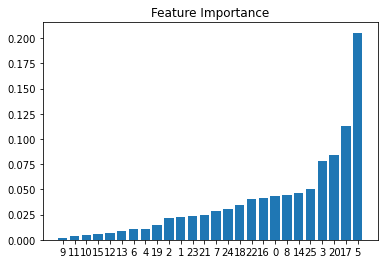

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [5] #accuracy = 0.720930, auc = 0.5
#important_features = [5, 17] #accuracy = 0.720930, auc = 0.5
important_features = [5, 17, 20] #accuracy = 0.720930, auc = 0.5
important_features = [5, 17, 20, 3] #accuracy = 0.720930, auc = 0.5
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

array([[  0,  74,   0],
       [  0, 245,   0],
       [  0,  73,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.720930
1  Precision  0.240310
2     Recall  0.333333
3   F1 Score  0.279279


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 10 (0.008657)
2. feature 11 (0.011292)
3. feature 15 (0.012661)
4. feature 9 (0.013831)
5. feature 13 (0.018891)
6. feature 12 (0.019941)
7. feature 4 (0.022377)
8. feature 1 (0.026915)
9. feature 6 (0.034306)
10. feature 0 (0.036046)
11. feature 19 (0.036536)
12. feature 24 (0.037802)
13. feature 2 (0.038445)
14. feature 25 (0.039402)
15. feature 7 (0.039836)
16. feature 23 (0.042537)
17. feature 3 (0.045020)
18. feature 16 (0.046803)
19. feature 22 (0.052442)
20. feature 8 (0.054242)
21. feature 18 (0.055415)
22. feature 21 (0.059664)
23. feature 17 (0.060444)
24. feature 20 (0.060685)
25. feature 14 (0.061853)
26. feature 5 (0.063958)


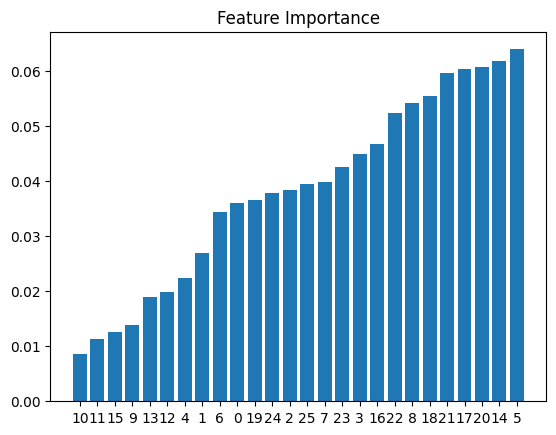

In [ ]:
importances = rfc_bestr5.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 10 pake log2
#important_features = [14, 20, 21, 18, 3, 17, 16, 5, 24, 25, 8, 23, 0, 22] #accuracy = 0.694595, auc = 0.770945 (4, 12, 4 kolom pertama dan 1, 6, 3 kolom terakhir)
important_features = [14, 20, 21, 18, 3, 17, 16, 5, 24, 25, 8, 23] #accuracy = 0.700000, auc = 0.7749 (4, 9, 5 kolom pertama dan 1, 5, 1 kolom terakhir)
#important_features = [14, 20, 21, 18, 3, 17, 16, 5, 24, 25] #accuracy = 0.683784, auc = 0.762837 (4, 16, 6 kolom pertama dan 1, 6, 1 kolom terakhir)
#important_features = [14, 20, 21, 18, 3, 17, 16, 5] #accuracy = 0.683784, auc = 0.762837 (4, 16, 6 kolom pertama dan 1, 6, 1 kolom terakhir)
# ----- pake 0.25 rf 5
#important_features = [16, 8, 14, 23, 18, 3, 21, 17, 5, 20, 22] # accuracy = 0.721622, auc = 0.791216 (1, 2, 2 kolom pertama)
#important_features = [16, 8, 14, 23, 18, 3, 21, 17, 5, 20] # accuracy = 0.721622, auc = 0.791216 (1, 2, 1 kolom pertama)
#important_features = [16, 8, 14, 23, 18, 3, 21, 17, 5] # accuracy = 0.716216, auc = 0.787162 (2, 6, 3 kolom pertama dan 0, 0, 1 kolom terakhir)
#important_features = [16, 8, 14, 23, 18, 3, 21, 17] # accuracy = 0.716216, auc = 0.787162 (2, 5, 3 kolom pertama)
#important_features = [16, 8, 14, 23, 18, 3] # accuracy = 0.721622, auc = 0.791216 (1, 2, 2 kolom pertama)
# --- pake 0.5 rf 5
#important_features = [5, 14, 20, 17, 21, 18, 8, 22, 16, 3, 23] # accuracy = 0.708108, auc = 0.781081 (2, 8, 5 kolom pertama)
#important_features = [5, 14, 20, 17, 21, 18, 8, 22, 16, 3] # accuracy = 0.713514, auc = 0.785135 (2, 5, 3 kolom pertama dan 0, 2, 1 kolom terakhir)
#important_features = [5, 14, 20, 17, 21, 18, 8] # accuracy = 0.708108, auc = 0.781081 (2, 8, 5 kolom pertama)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr10.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr10.predict(xtest_ifrs)

In [ ]:
xtrain.isnull().any()

SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  4,  43,   1],
       [  9, 254,   5],
       [  5,  48,   1]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted')
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.700000
1  Precision  0.582949
2     Recall  0.700000
3   F1 Score  0.620766


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.22      0.08      0.12        48
         0.0       0.74      0.95      0.83       268
         1.0       0.14      0.02      0.03        54

    accuracy                           0.70       370
   macro avg       0.37      0.35      0.33       370
weighted avg       0.58      0.70      0.62       370



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.7749999999999999

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.702842
1  Precision  0.388934
2     Recall  0.355132
3   F1 Score  0.330366


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5179627755300206

## Tahun 2020

In [ ]:
# pisahin data
start = '2020-01-01'
end = '2020-12-31'
adro20 = adro_copy.loc[(adro_copy['Date'] >= start) & (adro_copy['Date'] <= end)]
adro20 = pd.DataFrame(adro20)

start = '2020-01-01'
end = '2020-12-31'
indy20 = indy_copy.loc[(indy_copy['Date'] >= start) & (indy_copy['Date'] <= end)]
indy20 = pd.DataFrame(indy20)

start = '2020-01-01'
end = '2020-12-31'
ptba20 = ptba_copy.loc[(ptba_copy['Date'] >= start) & (ptba_copy['Date'] <= end)]
ptba20 = pd.DataFrame(ptba20)

start = '2020-01-01'
end = '2020-12-31'
toba20 = toba_copy.loc[(toba_copy['Date'] >= start) & (toba_copy['Date'] <= end)]
toba20 = pd.DataFrame(toba20)

start = '2020-01-01'
end = '2020-12-31'
untr20 = untr_copy.loc[(untr_copy['Date'] >= start) & (untr_copy['Date'] <= end)]
untr20 = pd.DataFrame(untr20)

In [ ]:
adro20.drop(['Date'], axis = 1, inplace = True)
indy20.drop(['Date'], axis = 1, inplace = True)
ptba20.drop(['Date'], axis = 1, inplace = True)
toba20.drop(['Date'], axis = 1, inplace = True)
untr20.drop(['Date'], axis = 1, inplace = True)

In [ ]:
adro_20 = adro20.copy()
indy_20 = indy20.copy()
ptba_20 = ptba20.copy()
toba_20 = toba20.copy()
untr_20 = untr20.copy()

In [ ]:
saham20 = pd.concat([adro20, indy20, ptba20, toba20, untr20], axis = 0)
print(saham20)

      closen  predn  SES adj close        MACD          MTM        RSI  \
773      1.0    1.0    1109.440667   16.232292    87.958900  60.266370   
774      0.0    1.0    1109.721738   13.344534    84.589300  60.322478   
775      1.0    1.0    1109.862273   10.981862    59.358400  60.352470   
776     -1.0   -1.0    1138.345565   10.659184    73.344700  65.942882   
777      0.0   -1.0    1139.327751   10.241728    72.512200  66.119382   
...      ...    ...            ...         ...          ...        ...   
1010     0.0   -1.0   25293.940610  478.088438  2899.289498  71.041503   
1011     1.0    1.0   24860.347260  413.385483  1484.774634  64.862128   
1012     0.0   -1.0   25041.686320  367.972281  1128.813097  66.180306   
1013     0.0    1.0   24933.287500  320.938526   564.406548  64.627516   
1014     0.0    1.0   24925.926950  279.554363   106.553864  64.517386   

              ATR         ADOSC        CCI        MFI  ...        TSI  \
773    464.198444 -7.967320e+11   5.55

### Pake Data Lengkap

### Data Outlier

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(saham20))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
773   1.558481  0.911351       0.466517  0.024801  0.001462  0.389182   
774   0.001287  0.911351       0.466477  0.001608  0.005217  0.392122   
775   1.558481  0.911351       0.466458  0.017367  0.033330  0.393693   
776   1.555907  1.097273       0.462440  0.019958  0.017746  0.686577   
777   0.001287  1.097273       0.462301  0.023311  0.018674  0.695824   
...        ...       ...            ...       ...       ...       ...   
1010  0.001287  1.097273       2.945124  3.734082  3.131040  0.953697   
1011  1.558481  0.911351       2.883958  3.214437  1.554929  0.629956   
1012  0.001287  1.097273       2.909539  2.849712  1.158301  0.699016   
1013  0.001287  0.911351       2.894248  2.471972  0.529416  0.617665   
1014  0.001287  0.911351       2.893209  2.139606  0.019257  0.611895   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
773   0.194322  1.431684  0.023632  0.881468  ... 

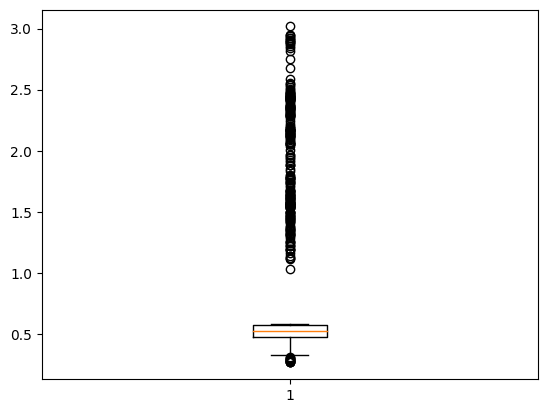

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
saham20 = saham20[z_score < threshold]
print(saham20)

      closen  predn  SES adj close        MACD          MTM        RSI  \
773      1.0    1.0    1109.440667   16.232292    87.958900  60.266370   
774      0.0    1.0    1109.721738   13.344534    84.589300  60.322478   
775      1.0    1.0    1109.862273   10.981862    59.358400  60.352470   
776     -1.0   -1.0    1138.345565   10.659184    73.344700  65.942882   
777      0.0   -1.0    1139.327751   10.241728    72.512200  66.119382   
...      ...    ...            ...         ...          ...        ...   
1010     0.0   -1.0   25293.940610         NaN          NaN  71.041503   
1011     1.0    1.0   24860.347260         NaN  1484.774634  64.862128   
1012     0.0   -1.0   25041.686320  367.972281  1128.813097  66.180306   
1013     0.0    1.0   24933.287500  320.938526   564.406548  64.627516   
1014     0.0    1.0   24925.926950  279.554363   106.553864  64.517386   

              ATR         ADOSC        CCI        MFI  ...        TSI  \
773    464.198444 -7.967320e+11   5.55

In [ ]:
saham20 = saham20.dropna()
print(saham20)

     closen  predn  SES adj close        MACD          MTM        RSI  \
773     1.0    1.0    1109.440667   16.232292    87.958900  60.266370   
774     0.0    1.0    1109.721738   13.344534    84.589300  60.322478   
775     1.0    1.0    1109.862273   10.981862    59.358400  60.352470   
776    -1.0   -1.0    1138.345565   10.659184    73.344700  65.942882   
777     0.0   -1.0    1139.327751   10.241728    72.512200  66.119382   
..      ...    ...            ...         ...          ...        ...   
991     1.0    1.0   20665.436990   20.218355  1208.708387  61.913422   
992     0.0    1.0   21679.566150  109.765009  2173.474309  74.680660   
993     0.0    1.0   22315.439330  207.506771  2737.826019  79.334500   
995     1.0    1.0   22142.446750  320.128307  2686.841760  69.560868   
996     1.0    1.0   22394.651110  343.870879  2619.794905  71.484793   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
773   464.198444 -7.967320e+11    5.551153  70.213

In [ ]:
print(saham20['closen'].value_counts())

 0.0    639
-1.0    221
 1.0    213
Name: closen, dtype: int64


#### Data Splitting

In [ ]:
# membagi jadi x dan y
x = saham20.drop(['predn', 'closen'], axis = 1)
y = saham20['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

#### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

##### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
confusion_matrix = np.array(confusion_matrix)
print(confusion_matrix)

[[ 13  54   9]
 [  9 163  18]
 [ 11  40   5]]


In [ ]:
accuracy_score(ytrain, y_predta)

0.8628495339547271

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.562112
1  Precision  0.494395
2     Recall  0.562112
3   F1 Score  0.506398


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.39      0.17      0.24        76
         0.0       0.63      0.86      0.73       190
         1.0       0.16      0.09      0.11        56

    accuracy                           0.56       322
   macro avg       0.39      0.37      0.36       322
weighted avg       0.49      0.56      0.51       322



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.6715838509316769

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte, average= "micro", multi_class = "ovr")

#fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(100,500, 10))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 50, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 150, max_depth = 4,
                             min_samples_split = 96, min_samples_leaf = 34,
                             max_features = None, random_state = 100)
# cv = 3
# None: accuracy = 0.611570, auc = 0.5156984
# sqrt: accuracy = 0.617080, auc = 0.51302
# log2: accuracy = 0.617080, auc = 0.5123995

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
rfc_bestvc2 = RandomForestClassifier(n_estimators = 230, max_depth = 4,
                             min_samples_split = 66, min_samples_leaf = 38,
                             max_features = 'sqrt', random_state = 100)

# cv = 3
# None: accuracy = 0.608815, auc = 0.512507
# sqrt: accuracy = 0.617080, auc = 0.51302
# log2: accuracy = 0.617080, auc = 0.51302

rfc_bestvc2.fit(xtrain, ytrain)

y_predbestvc2 = rfc_bestvc2.predict(xtest)
y_predbestcv2 = pd.DataFrame(y_predbestvc2)

In [ ]:
# masih error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  4,  69,   0],
       [  4, 220,   0],
       [  7,  59,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc2)
presisi = precision_score(ytest, y_predbestvc2, average = 'macro')
recall = recall_score(ytest, y_predbestvc2, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc2, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.617080
1  Precision  0.299617
2     Recall  0.345646
3   F1 Score  0.286713


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5156984354281889

#### Random Search

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 50, max_depth = 174,
                             min_samples_split = 10, min_samples_leaf = 10,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 13, 8, 9 kolom pertama dan 9, 8, 2 kolom terakhir (pake None; 0.577640, 0.683229) -> ini bisa
# 13, 8, 7 kolom pertama dan 5, 10, 1 kolom terakhir (pake log2; 0.577640, 0.683229)
# 14, 7, 7 kolom pertama dan 4, 8, 4 kolom terakhir (pake sqrt; 0.599379, 0.699534)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 100, max_depth = 174,
                             min_samples_split = 10, min_samples_leaf = 2,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 19, 12, 13 kolom pertama dan 8, 20, 7 kolom terakhir (pake 0.5; 0.571429, 0.678571) -> ini bisa juga
# 17, 12, 13 kolom pertama dan 10, 23, 6 kolom terakhir (pake None; 0.552795, 0.664596)
# 16, 14, 14 kolom pertama dan 13, 18, 3 kolom terakhir (pake log2; 0.549689, 0.662267)
# 18, 11, 13 kolom pertama dan 8, 21, 6 kolom terakhir (pake sqrt; 0.565217, 0.673913)

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 650, max_depth = 114,
                             min_samples_split = 38, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 15, 10, 8 kolom pertama dan 5, 9, 3 kolom terakhir (pake None; 0.586957, 0.690217) -> ini bisa juga
# 11, 8, 8 kolom pertama dan 5, 7, 2 kolom terakhir (pake log2; 0.583851, 0.687888)
# 11, 7, 8 kolom pertama dan 5, 7, 1 kolom terakhir (pake sqrt; 0.583851, 0.687888)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 900, max_depth = 74,
                             min_samples_split = 26, min_samples_leaf = 2,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 15, 11, 9 kolom pertama dan 7, 15, 4 kolom terakhir(pake 0.75; 0.568323, 0.676242) -> ini juga bisa
# 15, 13, 8 kolom pertama dan 7, 16, 4 kolom terakhir (pake None; 0.559006, 0.669254)
# 13, 9, 8 kolom pertama dan 7, 9, 4 kolom terakhir (pake log2; 0.586957, 0.690217)
# 13, 9, 8 kolom pertama dan 7, 10, 4 kolom terakhir (pake sqrt; 0.583851, 0.687888)

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(50,1000, 50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 102, max_depth = 234,
                             min_samples_split = 10, min_samples_leaf = 46,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# accuracy = 0.602484, auc = 0.701863
# 7, 3, 6 kolom pertama

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 102, max_depth = 18,
                             min_samples_split = 90, min_samples_leaf = 50,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# accuracy = 0.599379, auc = 0.699534
# 6, 3, 4 kolom pertama

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 302, max_depth = 166,
                             min_samples_split = 18, min_samples_leaf = 18,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# accuracy = 0.596273, auc = 0.697204
# 13, 7, 10 kolom pertama & 3, 4, 0 kolom terakhir

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 400, max_depth = 20,
                             min_samples_split = 16, min_samples_leaf = 24,
                             max_features = None, oob_score = True,
                            random_state = 100)

# accuracy = 0.599379, auc = 0.699534
# 12, 7, 8 kolom pertama dan 2, 3, 1 kolom terakhir

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 250, max_depth = 22,
                             min_samples_split = 12, min_samples_leaf = 34,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# accuracy = 0.602484, auc = 0.701863
# 7, 3, 4 kolom pertama

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 200, max_depth = 24,
                             min_samples_split = 44, min_samples_leaf = 28,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# accuracy = 0.593168, auc = 0.694875
# 8, 6, 8 kolom pertama dan 2, 1, 0 kolom terakhir

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 800, max_depth = 70,
                             min_samples_split = 74, min_samples_leaf = 22,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 11, 5, 7 kolom pertama dan 2, 1, 0 kolom terakhir (pake None; 0.605590, 0.704192) -> ini bisa
# 7, 4, 4 kolom pertama (pake log2; 0.599379, 0.699534)
# 7, 4, 6 kolom pertama dan 1, 0, 0 kolom terakhir (pake sqrt; 0.599379, 0.699534)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 50, max_depth = 174,
                             min_samples_split = 30, min_samples_leaf = 38,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 13, 6, 9 kolom pertama dan 1, 1, 0 kolom terakhir (pake None; 0.608696, 0.706521)
# 7, 1, 4 kolom pertama (pake log2; 0.608696, 0.706521)
# 7, 3, 4 kolom pertama (pake sqrt; 0.602484, 0.701863)

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 200,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 350, max_depth = 28,
                             min_samples_split = 42, min_samples_leaf = 10,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring accuracy
# 15, 9, 8 kolom pertama dan 4, 7, 1 kolom terakhir (pake None; 0.590062, 0.692546)
# 9, 7, 6 kolom pertama dan 3, 6, 0 kolom terakhir (pake log2; 0.577640, 0.683229)
# 11, 6, 9 kolom pertama dan 4, 7, 0 kolom terakhir (pake sqrt; 0.583851, 0.687888)

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 350, max_depth = 24,
                             min_samples_split = 20, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 17, 14, 10 kolom pertama dan 6, 16, 6 kolom terakhir (pake None; 0.568323, 0.676242)
# 14, 10, 9 kolom pertama dan 7, 16, 4 kolom terakhir (pake log2; 0.565217, 0.673913)
# 14, 7, 7 kolom pertama dan 4, 8, 4 kolom terakhir (pake sqrt; 0.568323, 0.676242)

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr15 = RandomForestClassifier(n_estimators = 300, max_depth = 22,
                             min_samples_split = 4, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 21, 13, 11 kolom pertama dan 6, 24, 9 kolom terakhir (pake None; 0.568323, 0.676242)
# 19, 14, 12 kolom pertama dan 8, 20, 7 kolom terakhir (pake log2; 0.565217, 0.673913)
# 21, 12, 11 kolom pertama dan 6, 21, 8 kolom terakhir (pake sqrt; 0.577640, 0.683229)

rfc_bestr15.fit(xtrain, ytrain)

y_predbestr15 = rfc_bestr15.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr16 = RandomForestClassifier(n_estimators = 250, max_depth = 20,
                             min_samples_split = 20, min_samples_leaf = 12,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 16, 9, 9 kolom pertama dan 6, 9, 2 kolom terakhir (pake None; 0.590062, 0.685559)
# 12, 9, 7 kolom pertama dan 4, 7, 2 kolom terakhir (pake log2; 0.583851, 0.687888)
# 13, 9, 11 kolom pertama dan 4, 8, 1 kolom terakhir (pake sqrt; 0.580745, 0.685559)

rfc_bestr16.fit(xtrain, ytrain)

y_predbestr16 = rfc_bestr16.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr17 = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 34, min_samples_leaf = 28,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 11, 7, 9 kolom pertama dan 2, 3, 0 kolom terakhir (pake None; 0.593168, 0.694875)
# 7, 3, 5 kolom pertama dan 0, 1, 0 kolom terakhir (pake log2; 0.599379, 0.699534)
# 8, 6, 8 kolom pertama dan 2, 1, 40 kolom terakhir (pake sqrt; 0.593168, 0.694875)

rfc_bestr17.fit(xtrain, ytrain)

y_predbestr17 = rfc_bestr17.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr18 = RandomForestClassifier(n_estimators = 300, max_depth = 26,
                             min_samples_split = 2, min_samples_leaf = 20,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 13, 6, 9 kolom pertama dan 2, 5, 0 kolom terakhir (pake None; 0.596273, 0.687888)
# 8, 6, 6 kolom pertama dan 3, 3, 0 kolom terakhir (pake log2; 0.586957, 0.690217)
# 8, 7, 7 kolom pertama dan 3, 3, 0 kolom terakhir (pake sqrt; 0.583851, 0.687888)

rfc_bestr18.fit(xtrain, ytrain)

y_predbestr18 = rfc_bestr18.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr19 = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 14, min_samples_leaf = 34,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 12, 6, 9 kolom pertama dan 2, 1, 0 kolom terakhir (pake None; 0.605590, 0.704192)
# 6, 2, 3 kolom pertama (pake log2; 0.602484, 0.701863)
# 7, 3, 5 kolom pertama (pake sqrt; 0.602484, 0.701863)

rfc_bestr19.fit(xtrain, ytrain)

y_predbestr19 = rfc_bestr19.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

##### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr10)

array([[ 15,  54,   7],
       [ 11, 164,  15],
       [  9,  43,   4]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr10)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr10, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr10, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr10, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.568323
1  Precision  0.498676
2     Recall  0.568323
3   F1 Score  0.509894


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr10))

              precision    recall  f1-score   support

        -1.0       0.43      0.20      0.27        76
         0.0       0.63      0.86      0.73       190
         1.0       0.15      0.07      0.10        56

    accuracy                           0.57       322
   macro avg       0.40      0.38      0.37       322
weighted avg       0.50      0.57      0.51       322



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr10)

0.6762422360248447

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 9 (0.026551)
2. feature 11 (0.028839)
3. feature 12 (0.031996)
4. feature 4 (0.032201)
5. feature 2 (0.033011)
6. feature 10 (0.033211)
7. feature 18 (0.033314)
8. feature 1 (0.033409)
9. feature 15 (0.033711)
10. feature 19 (0.035751)
11. feature 3 (0.036204)
12. feature 16 (0.036267)
13. feature 23 (0.037120)
14. feature 25 (0.038627)
15. feature 6 (0.038818)
16. feature 7 (0.039282)
17. feature 8 (0.039928)
18. feature 13 (0.041411)
19. feature 0 (0.041423)
20. feature 17 (0.042724)
21. feature 20 (0.043059)
22. feature 5 (0.045861)
23. feature 22 (0.046070)
24. feature 21 (0.047147)
25. feature 14 (0.051731)
26. feature 24 (0.052333)


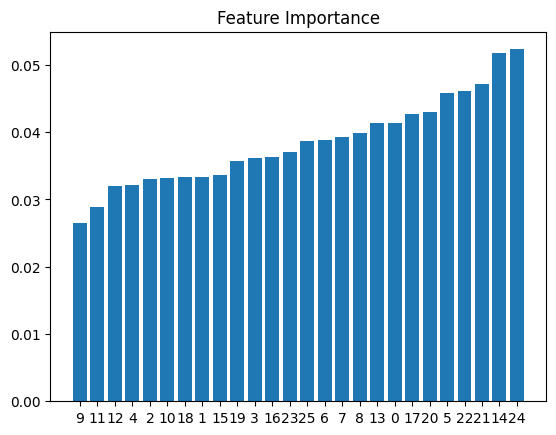

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [24, 14, 21, 22, 5, 20, 17, 0, 13] # accuracy = 0.577640, auc = 0.548098 (16, 10, 9 kolom pertama dan 7, 15, 5 kolom terakhir)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[ 16,  53,   7],
       [ 10, 165,  15],
       [  9,  42,   5]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.577640
1  Precision  0.514566
2     Recall  0.577640
3   F1 Score  0.521709


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.46      0.21      0.29        76
         0.0       0.63      0.87      0.73       190
         1.0       0.19      0.09      0.12        56

    accuracy                           0.58       322
   macro avg       0.43      0.39      0.38       322
weighted avg       0.51      0.58      0.52       322



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.6832298136645963

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance setelah VC

Feature ranking:
1. feature 18 (0.013658)
2. feature 21 (0.015187)
3. feature 3 (0.016378)
4. feature 23 (0.017386)
5. feature 7 (0.017492)
6. feature 6 (0.017683)
7. feature 1 (0.017720)
8. feature 2 (0.022640)
9. feature 22 (0.028643)
10. feature 12 (0.029466)
11. feature 19 (0.033485)
12. feature 25 (0.033749)
13. feature 0 (0.034312)
14. feature 15 (0.036033)
15. feature 17 (0.037428)
16. feature 11 (0.044090)
17. feature 10 (0.044409)
18. feature 16 (0.044743)
19. feature 14 (0.045905)
20. feature 4 (0.053138)
21. feature 24 (0.053485)
22. feature 13 (0.054651)
23. feature 9 (0.060095)
24. feature 20 (0.062691)
25. feature 8 (0.077928)
26. feature 5 (0.087606)


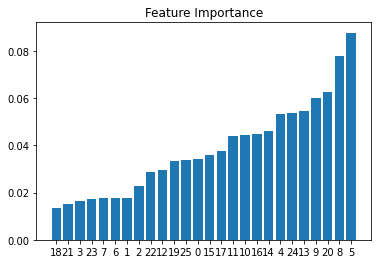

In [ ]:
importances = rfc_bestvc2.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [5] #accuracy = 0.608815, auc = 0.510607
important_features = [5, 8] #accuracy = 0.619835, auc = 0.511845
important_features = [5, 8, 20] #accuracy = 0.611570, auc = 0.515655
important_features = [5, 8, 20, 9] #accuracy = 0.608815, auc = 0.506549
important_features = [5, 8, 20, 9, 13] #accuracy = 0.603306, auc = 0.507054
important_features = [5, 8, 20, 9, 13, 24] #accuracy = 0.608815, auc = 0.507542
important_features = [5, 8, 20, 9, 13, 24, 4] #accuracy = 0.614325, auc = 0.512238
important_features = [5, 8, 20, 9, 13, 24, 4, 14] #accuracy = 0.611570, auc = 0.510386
important_features = [5, 8, 20, 9, 13, 24, 4, 14, 16] #accuracy = 0.611570, auc = 0.510386
important_features = [5, 8, 20, 9, 13, 24, 4, 14, 16, 10] #accuracy = 0.611570, auc = 0.510386
important_features = [5, 8, 20, 9, 13, 24, 4, 14, 16, 10, 11] #accuracy = 0.617080, auc = 0.513024
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc2.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc2.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

array([[  0,  74,   0],
       [  0, 245,   0],
       [  0,  73,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.617080
1  Precision  0.299617
2     Recall  0.345646
3   F1 Score  0.286713


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.513023838975921

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 9 (0.011370)
2. feature 11 (0.012761)
3. feature 15 (0.013770)
4. feature 12 (0.018507)
5. feature 1 (0.020380)
6. feature 2 (0.023305)
7. feature 18 (0.025712)
8. feature 4 (0.026259)
9. feature 10 (0.027250)
10. feature 16 (0.027311)
11. feature 3 (0.030404)
12. feature 19 (0.030528)
13. feature 25 (0.033831)
14. feature 7 (0.034275)
15. feature 0 (0.035433)
16. feature 23 (0.041035)
17. feature 8 (0.042547)
18. feature 17 (0.048118)
19. feature 13 (0.053748)
20. feature 6 (0.055019)
21. feature 22 (0.055101)
22. feature 20 (0.056282)
23. feature 21 (0.062675)
24. feature 24 (0.069306)
25. feature 5 (0.070378)
26. feature 14 (0.074697)


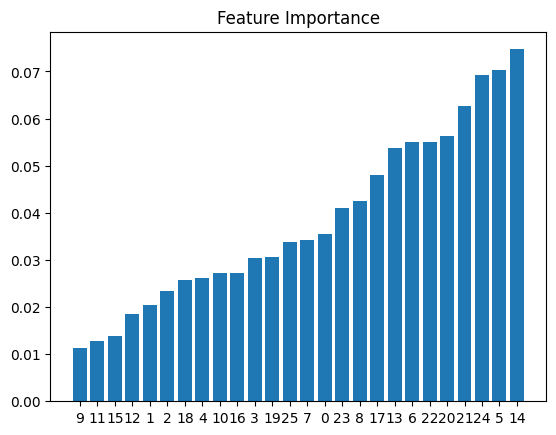

In [ ]:
importances = rfc_bestr10.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 9 pake none
#important_features = [24, 5, 14, 13, 21, 20, 22, 6 ,17] #accuracy = 0.577640, auc = 0.683229 (15, 11, 8 kolom pertama dan 5, 11, 3 kolom terakhir)
# -- rf 8 pake 0.5
#important_features = [21, 24, 14, 22, 20, 5, 17, 8] #accuracy = 0.565217, auc = 0.673913 (16, 13, 8 kolom pertama dan 7, 16, 5 kolom terakhir)
# -- rf 15 pake sqrt
#important_features = [21, 14, 22, 24, 20, 5, 17, 13, 6, 25, 8] #accuracy = 0.565217, auc = 0.673913 (21, 14, 14 kolom pertama dan 9, 20, 5 kolom terakhir)
# -- rf 10 pake 0.75
important_features = [14, 5, 24, 21, 20, 22, 6, 13, 17, 8] #accuracy = 0.571429, auc = 0.6785714 (17, 11, 10 kolom pertama dan 6, 16, 4 kolom terakhir)

xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr10.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr10.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[ 17,  53,   6],
       [ 11, 163,  16],
       [ 10,  42,   4]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted')
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.571429
1  Precision  0.505137
2     Recall  0.571429
3   F1 Score  0.516736


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.45      0.22      0.30        76
         0.0       0.63      0.86      0.73       190
         1.0       0.15      0.07      0.10        56

    accuracy                           0.57       322
   macro avg       0.41      0.38      0.37       322
weighted avg       0.51      0.57      0.52       322



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.6785714285714285

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.559229
1  Precision  0.428931
2     Recall  0.414488
3   F1 Score  0.418276


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5633204826086243

## Tahun 2021

In [ ]:
# pisahin data
start = '2021-01-01'
end = '2021-12-31'
adro21 = adro_copy.loc[(adro_copy['Date'] >= start) & (adro_copy['Date'] <= end)]
adro21 = pd.DataFrame(adro21)

start = '2021-01-01'
end = '2021-12-31'
indy21 = indy_copy.loc[(indy_copy['Date'] >= start) & (indy_copy['Date'] <= end)]
indy21 = pd.DataFrame(indy21)

start = '2021-01-01'
end = '2021-12-31'
ptba21 = ptba_copy.loc[(ptba_copy['Date'] >= start) & (ptba_copy['Date'] <= end)]
ptba21 = pd.DataFrame(ptba21)

start = '2021-01-01'
end = '2021-12-31'
toba21 = toba_copy.loc[(toba_copy['Date'] >= start) & (toba_copy['Date'] <= end)]
toba21 = pd.DataFrame(toba21)

start = '2021-01-01'
end = '2021-12-31'
untr21 = untr_copy.loc[(untr_copy['Date'] >= start) & (untr_copy['Date'] <= end)]
untr21 = pd.DataFrame(untr21)

In [ ]:
adro21.drop(['Date'], axis = 1, inplace = True)
indy21.drop(['Date'], axis = 1, inplace = True)
ptba21.drop(['Date'], axis = 1, inplace = True)
toba21.drop(['Date'], axis = 1, inplace = True)
untr21.drop(['Date'], axis = 1, inplace = True)

In [ ]:
adro_21 = adro21.copy()
indy_21 = indy21.copy()
ptba_21 = ptba21.copy()
toba_21 = toba21.copy()
untr_21 = untr21.copy()

In [ ]:
saham21 = pd.concat([adro21, indy21, ptba21, toba21, untr21], axis = 0)
print(saham21)

      closen  predn  SES adj close        MACD         MTM        RSI  \
1015    -1.0   -1.0    1148.747853    8.390889    9.722700  58.174216   
1016    -1.0   -1.0    1135.476160    5.411226  -42.389300  54.258801   
1017     1.0    1.0    1109.152509    1.659414  -88.133100  47.469228   
1018     1.0    1.0    1107.803366   -1.140912  -95.254800  47.145273   
1019     1.0    1.0    1122.878978   -2.263193  -96.846900  51.137618   
...      ...    ...            ...         ...         ...        ...   
1256     0.0   -1.0   21336.730110 -101.970350 -593.126804  43.888441   
1257     0.0   -1.0   21404.754700  -83.884044 -441.977462  45.260875   
1258     1.0    1.0   21378.177160  -70.539525 -693.584436  44.802153   
1259     0.0   -1.0   21813.247760  -34.662972  -55.965068  53.133218   
1260    -1.0   -1.0   21958.077000    0.038109  202.256726  55.527262   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
1015  359.685930 -9.977800e+11 -174.279190  60.342

### Pake Data Lengkap

### Data Outlier

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(saham21))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
1015  1.688795  1.062086       0.518836  0.111556  0.052829  0.460874   
1016  1.688795  1.062086       0.520488  0.083016  0.014882  0.220703   
1017  1.730494  0.941543       0.523764  0.047079  0.074319  0.195770   
1018  1.730494  0.941543       0.523932  0.020256  0.083572  0.215641   
1019  1.730494  0.941543       0.522056  0.009506  0.085641  0.029249   
...        ...       ...            ...       ...       ...       ...   
1256  0.020849  1.062086       1.993744  0.945539  0.730476  0.415415   
1257  0.020849  1.062086       2.002210  0.772299  0.534082  0.331230   
1258  1.730494  0.941543       1.998902  0.644478  0.861005  0.359368   
1259  0.020849  1.062086       2.053051  0.300835  0.032522  0.151659   
1260  1.688795  1.062086       2.071076  0.031549  0.302996  0.298510   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
1015  0.182830  1.375814  1.468969  0.509699  ... 

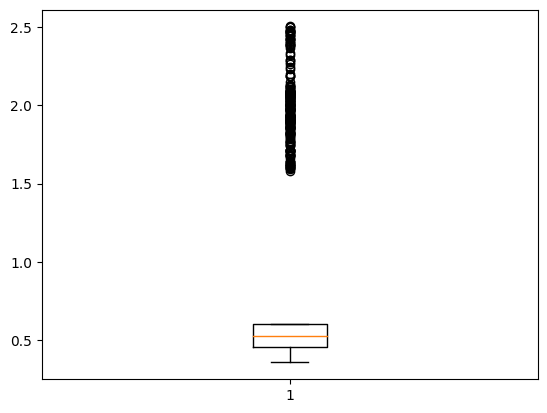

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
saham21 = saham21[z_score < threshold]
print(saham21)

      closen  predn  SES adj close        MACD         MTM        RSI  \
1015    -1.0   -1.0    1148.747853    8.390889    9.722700  58.174216   
1016    -1.0   -1.0    1135.476160    5.411226  -42.389300  54.258801   
1017     1.0    1.0    1109.152509    1.659414  -88.133100  47.469228   
1018     1.0    1.0    1107.803366   -1.140912  -95.254800  47.145273   
1019     1.0    1.0    1122.878978   -2.263193  -96.846900  51.137618   
...      ...    ...            ...         ...         ...        ...   
1256     0.0   -1.0   21336.730110 -101.970350 -593.126804  43.888441   
1257     0.0   -1.0   21404.754700  -83.884044 -441.977462  45.260875   
1258     1.0    1.0   21378.177160  -70.539525 -693.584436  44.802153   
1259     0.0   -1.0   21813.247760  -34.662972  -55.965068  53.133218   
1260    -1.0   -1.0   21958.077000    0.038109  202.256726  55.527262   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
1015  359.685930 -9.977800e+11 -174.279190  60.342

In [ ]:
saham21 = saham21.dropna()
print(saham21)

      closen  predn  SES adj close        MACD         MTM        RSI  \
1017     1.0    1.0    1109.152509    1.659414  -88.133100  47.469228   
1018     1.0    1.0    1107.803366   -1.140912  -95.254800  47.145273   
1019     1.0    1.0    1122.878978   -2.263193  -96.846900  51.137618   
1020    -1.0   -1.0    1161.917272   -0.797122  -50.392300  59.603419   
1021     1.0    1.0    1161.748614    0.260984  -56.696700  59.555655   
...      ...    ...            ...         ...         ...        ...   
1255     0.0    1.0   21127.973890 -118.597831 -725.777048  39.547130   
1256     0.0   -1.0   21336.730110 -101.970350 -593.126804  43.888441   
1257     0.0   -1.0   21404.754700  -83.884044 -441.977462  45.260875   
1258     1.0    1.0   21378.177160  -70.539525 -693.584436  44.802153   
1260    -1.0   -1.0   21958.077000    0.038109  202.256726  55.527262   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
1017  352.161212 -1.000020e+12 -182.918396  43.855

In [ ]:
print(saham20['closen'].value_counts())

 0.0    711
-1.0    250
 1.0    249
Name: closen, dtype: int64


#### Data Splitting

In [ ]:
# membagi jadi x dan y
x = saham21.drop(['predn', 'closen'], axis = 1)
y = saham21['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

#### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

##### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
print(confusion_matrix)

[[  9  46   2]
 [  9 195  10]
 [  2  44   2]]


In [ ]:
accuracy_score(ytrain, y_predta)

0.8399452804377565

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.645768
1  Precision  0.560903
2     Recall  0.645768
3   F1 Score  0.575787


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.45      0.16      0.23        57
         0.0       0.68      0.91      0.78       214
         1.0       0.14      0.04      0.06        48

    accuracy                           0.65       319
   macro avg       0.43      0.37      0.36       319
weighted avg       0.56      0.65      0.58       319



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.7343260188087775

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte, average= "micro", multi_class = "ovr")

#fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(100,500, 10))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 50, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 130, max_depth = 6,
                             min_samples_split = 28, min_samples_leaf = 14,
                             max_features = 'sqrt', random_state = 100)
# cv = 3
# None: accuracy = 0.644986, auc = 0.52319
# sqrt: accuracy = 0.653117, auc = 0.522758
# log2: accuracy = 0.650407, auc = 0.522253

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
rfc_bestvc2 = RandomForestClassifier(n_estimators = 230, max_depth = 6,
                             min_samples_split = 28, min_samples_leaf = 6,
                             max_features = None, random_state = 100)

# cv = 3
# None: accuracy = 0.636856, auc = 0.520926
# sqrt: accuracy = 0.644986, auc = 0.522454
# log2: accuracy = 0.644986, auc = 0.517083

rfc_bestvc2.fit(xtrain, ytrain)

y_predbestvc2 = rfc_bestvc2.predict(xtest)
y_predbestcv2 = pd.DataFrame(y_predbestvc2)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  8,  55,   0],
       [  9, 230,   0],
       [  4,  63,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'macro')
recall = recall_score(ytest, y_predbestvc1, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.650407
1  Precision  0.365852
2     Recall  0.362002
3   F1 Score  0.321459


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5222529701363076

#### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(50,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 502, max_depth = 202,
                             min_samples_split = 18, min_samples_leaf = 6,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# accuracy = 0.673981, auc = 0.755485
# 8, 5, 1 kolom pertama dan 0, 4, 2 kolom terakhir

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 852, max_depth = 218,
                             min_samples_split = 66, min_samples_leaf = 2,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# accuracy = 0.677116, auc = 0.757836
# 6, 4, 1 kolom pertama

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 702, max_depth = 182,
                             min_samples_split = 42, min_samples_leaf = 2,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# accuracy = 0.664577, auc = 0.748432
# 7, 6, 2 kolom pertama dan 1, 3, 0 kolom terakhir

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 300, max_depth = 24,
                             min_samples_split = 10, min_samples_leaf = 10,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.680251, auc = 0.760188
# 7, 3, 1 kolom pertama dan 0, 1, 0 kolom terakhir

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 350, max_depth = 22,
                             min_samples_split = 8, min_samples_leaf = 12,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.673981 auc = 0.755485
# 5, 3, 0 kolom pertama dan 0, 1, 0 kolom terakhir

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 700, max_depth = 270,
                             min_samples_split = 14, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 8, 7, 2 kolom pertama dan 1, 7, 2 kolom terakhir(pake 0.75;  0.658307, 0.743730)
# 9, 7, 2 kolom pertama dan 1, 8, 2 kolom terakhir (pake None; 0.658307, 0.743730)
# 7, 5, 1 kolom pertama dan 0, 2, 0 kolom terakhir (pake log2; 0.670846, 0.753134)
# 8, 5, 1 kolom pertama dan 0, 2, 1 kolom terakhir (pake sqrt; 0.677116, 0.757836)

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 850, max_depth = 262,
                             min_samples_split = 46, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 8, 6, 2 kolom pertama dan 1, 3, 0 kolom terakhir (pake None; 0.667712, 0.750783)
# 6, 4, 1 kolom pertama (pake log2; 0.677116, 0.757836)
# 6, 4, 1 kolom pertama (pake sqrt; 0.677116, 0.757836)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 200, max_depth = 274,
                             min_samples_split = 26, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 9, 6, 3 kolom pertama dan 0, 1, 0 kolom terakhir (pake None; 0.677116, 0.757836)
# 6, 5, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake log2; 0.670846, 0.753134)
# 7, 4, 1 kolom pertama dan 0, 1, 1 kolom terakhir (pake sqrt; 0.677116, 0.757836)
rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 600, max_depth = 290,
                             min_samples_split = 46, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 7, 5, 2 kolom pertama (pake 0.75; 0.677116, 0.757836)
# 8, 5, 2 kolom pertama (pake None; 0.680251, 0.760188)
# 3, 3, 1 kolom pertama (pake log2; 0.670846, 0.753134)
# 5, 3, 7 kolom pertama (pake sqrt; 0.677116, 0.757836)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 900, max_depth = 138,
                             min_samples_split = 38, min_samples_leaf = 14,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 7, 4, 2 kolom pertama  (pake None; 0.680251, 0.760188)
# 1, 2, 0 kolom pertama (pake log2; 0.667712, 0.750783)
# 1, 1, 0 kolom pertama (pake sqrt; 0.670846, 0.753134)

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 200,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 300, max_depth = 26,
                             min_samples_split = 2, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 9, 12, 2 kolom pertama dan 3, 15, 5 kolom terakhir (pake None; 0.630094, 0.722570)
# 9, 13, 3 kolom pertama dan 3, 10, 4 kolom terakhir (pake log2; 0.639498, 0.729623)
# 9, 14, 3 kolom pertama dan 3, 11, 4 kolom terakhir (pake sqrt; 0.633229, 0.7249216)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 300, max_depth = 26,
                             min_samples_split = 32, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring accuracy
# 7, 5, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake None; 0.673981, 0.755485)
rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 350, max_depth = 24,
                             min_samples_split = 2, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 9, 13, 2 kolom pertama dan 3, 15, 5 kolom terakhir (pake None; 0.626959, 0.720219)
# 9, 12, 3 kolom pertama dan 3, 10, 3 kolom terakhir (pake log2; 0.639498, 0.729623)
# 9, 15, 3 kolom pertama dan 3, 11, 5 kolom terakhir (pake sqrt; 0.633229, 0.724921)

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 450, max_depth = 24,
                             min_samples_split = 2, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 9, 13, 2 kolom pertama dan 3, 15, 5 kolom terakhir (pake None; 0.626959, 0.720219)
# 9, 12, 3 kolom pertama dan 3, 10, 3 kolom terakhir (pake log2; 0.639498, 0.729623)
# 9, 14, 3 kolom pertama dan 2, 12, 5 kolom terakhir (pake sqrt; 0.633229, 0.724921)

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr15 = RandomForestClassifier(n_estimators = 200, max_depth = 22,
                             min_samples_split = 26, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 9, 6, 3 kolom pertama dan 0, 1, 0 kolom terakhir (pake None; 0.677116, 0.757836)
# 6, 5, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake log2; 0.670846, 0.753134)
# 14, 7, 7 kolom pertama dan 4, 8, 4 kolom terakhir (pake sqrt; 0.599379, 0.699534)

rfc_bestr15.fit(xtrain, ytrain)

y_predbestr15 = rfc_bestr15.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr16 = RandomForestClassifier(n_estimators = 400, max_depth = 26,
                             min_samples_split = 18, min_samples_leaf = 6,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 9, 5, 2 kolom pertama dan 0, 8, 2 kolom terakhir (pake None; 0.664577, 0.748432)
# 6, 5, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake log2; 0.670846, 0.753134)
# 7, 5, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake sqrt; 0.673981, 0.755485)

rfc_bestr16.fit(xtrain, ytrain)

y_predbestr16 = rfc_bestr16.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

##### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr8)

array([[  9,  48,   0],
       [  6, 207,   1],
       [  3,  45,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr8)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr8, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr8, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr8, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.677116
1  Precision  0.552226
2     Recall  0.677116
3   F1 Score  0.583216


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr8))

              precision    recall  f1-score   support

        -1.0       0.50      0.16      0.24        57
         0.0       0.69      0.97      0.81       214
         1.0       0.00      0.00      0.00        48

    accuracy                           0.68       319
   macro avg       0.40      0.38      0.35       319
weighted avg       0.55      0.68      0.58       319



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr8)

0.7578369905956113

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 10 (0.019014)
2. feature 9 (0.026442)
3. feature 11 (0.028390)
4. feature 15 (0.029854)
5. feature 13 (0.031275)
6. feature 3 (0.034180)
7. feature 19 (0.035086)
8. feature 16 (0.036041)
9. feature 1 (0.036392)
10. feature 24 (0.036458)
11. feature 2 (0.037108)
12. feature 7 (0.037226)
13. feature 18 (0.037608)
14. feature 0 (0.038028)
15. feature 21 (0.039114)
16. feature 5 (0.039726)
17. feature 12 (0.039824)
18. feature 25 (0.040857)
19. feature 4 (0.041119)
20. feature 8 (0.042061)
21. feature 14 (0.045595)
22. feature 6 (0.045653)
23. feature 17 (0.048137)
24. feature 22 (0.048739)
25. feature 20 (0.050664)
26. feature 23 (0.055407)


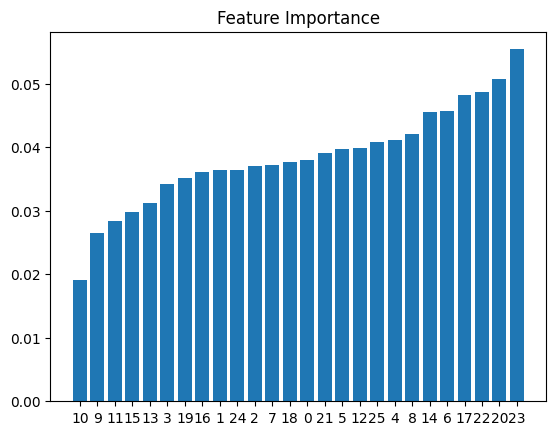

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [23, 20, 22, 17, 6, 14, 8, 4] # accuracy = 0.661442, auc = 0.746081 (8, 4, 1 kolom pertama dan 1, 9, 2 kolom terakhir)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  8,  48,   1],
       [  4, 201,   9],
       [  1,  45,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.661442
1  Precision  0.593677
2     Recall  0.661442
3   F1 Score  0.581740


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.62      0.14      0.23        57
         0.0       0.68      0.94      0.79       214
         1.0       0.17      0.04      0.07        48

    accuracy                           0.66       319
   macro avg       0.49      0.37      0.36       319
weighted avg       0.59      0.66      0.58       319



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.7460815047021944

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance setelah VC

Feature ranking:
1. feature 21 (0.018587)
2. feature 17 (0.021744)
3. feature 6 (0.022709)
4. feature 18 (0.025308)
5. feature 19 (0.025595)
6. feature 10 (0.027127)
7. feature 3 (0.027189)
8. feature 16 (0.028994)
9. feature 2 (0.030234)
10. feature 22 (0.031308)
11. feature 25 (0.032913)
12. feature 13 (0.034877)
13. feature 7 (0.035441)
14. feature 15 (0.036560)
15. feature 11 (0.037909)
16. feature 8 (0.039044)
17. feature 24 (0.041658)
18. feature 9 (0.044494)
19. feature 5 (0.045669)
20. feature 1 (0.046464)
21. feature 20 (0.046848)
22. feature 12 (0.049494)
23. feature 14 (0.053221)
24. feature 0 (0.060124)
25. feature 23 (0.064481)
26. feature 4 (0.072006)


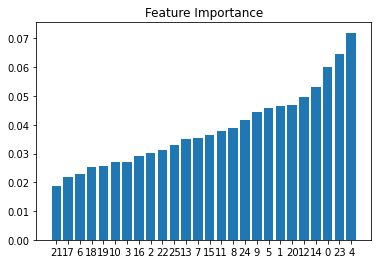

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [4] #accuracy = 0.647696, auc = 0.508056
important_features = [4, 23] #accuracy = 0.644986, auc = 0.515135
important_features = [4, 23, 0] #accuracy = 0.653117, auc = 0.526181
important_features = [4, 23, 0, 14] #accuracy = 0.647696, auc = 0.523696
important_features = [4, 23, 0, 14, 12] #accuracy = 0.639566, auc = 0.509228
important_features = [4, 23, 0, 14, 12, 20] #accuracy = 0.647696, auc = 0.514902
important_features = [4, 23, 0, 14, 12, 20, 1] #accuracy = 0.644986, auc = 0.517821
important_features = [4, 23, 0, 14, 12, 20, 1, 5] #accuracy = 0.647696, auc = 0.523961
important_features = [4, 23, 0, 14, 12, 20, 1, 5, 9] #accuracy = 0.647696, auc = 0.522486
important_features = [4, 23, 0, 14, 12, 20, 1, 5, 9, 24] #accuracy = 0.647696, auc = 0.525909
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

array([[  0,  74,   0],
       [  0, 245,   0],
       [  0,  73,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.647696
1  Precision  0.343114
2     Recall  0.364504
3   F1 Score  0.325544


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5259086662237044

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 9 (0.006096)
2. feature 10 (0.009504)
3. feature 11 (0.012264)
4. feature 15 (0.018420)
5. feature 13 (0.020066)
6. feature 2 (0.023759)
7. feature 3 (0.025553)
8. feature 19 (0.027491)
9. feature 1 (0.028453)
10. feature 24 (0.029799)
11. feature 18 (0.030415)
12. feature 7 (0.031487)
13. feature 16 (0.035292)
14. feature 4 (0.037903)
15. feature 21 (0.039353)
16. feature 5 (0.039774)
17. feature 8 (0.044430)
18. feature 25 (0.048597)
19. feature 12 (0.050816)
20. feature 0 (0.051924)
21. feature 17 (0.055990)
22. feature 14 (0.057404)
23. feature 6 (0.059536)
24. feature 22 (0.060415)
25. feature 20 (0.065043)
26. feature 23 (0.090218)


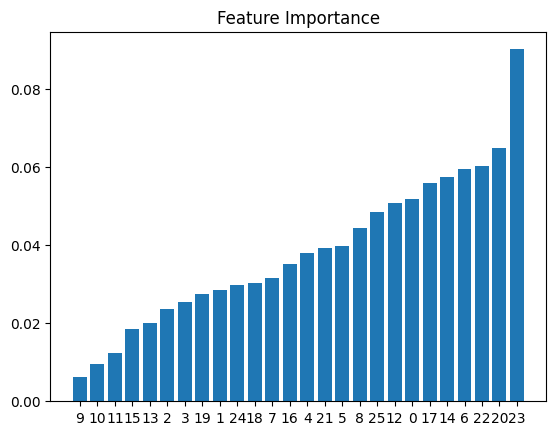

In [ ]:
importances = rfc_bestr9.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 10 pake none
#important_features = [23, 20, 22, 17, 14, 12, 6, 8, 0, 21] #accuracy = 0.673981, auc = 0.755485 (5, 4, 2 kolom pertama)
# -- rf 7 pake none
#important_features = [20, 23, 6, 22, 0, 17, 14, 25, 12, 8, 21, 5] # accuracy = 0.677116, auc = 0.757836 (8, 4, 3 kolom pertama dan 0, 2, 0 kolom terakhir)
# -- rf 8 pake none
#important_features = [23, 20, 22, 6, 14, 17, 8, 25, 0, 12, 21] # accuracy = 0.664577, auc = 0.748432 (8, 7, 3 kolom pertama dan 0, 4, 1 kolom terakhir)
# -- rf 9 pake none
important_features = [23, 20, 22, 6, 14, 17, 0, 12, 25, 8] # accuracy = 0.680251, auc = 0.760188 (8, 5, 3 kolom pertama)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr9.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr9.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  8,  49,   0],
       [  5, 209,   0],
       [  3,  45,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted')
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.680251
1  Precision  0.552071
2     Recall  0.680251
3   F1 Score  0.581550


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.50      0.14      0.22        57
         0.0       0.69      0.98      0.81       214
         1.0       0.00      0.00      0.00        48

    accuracy                           0.68       319
   macro avg       0.40      0.37      0.34       319
weighted avg       0.55      0.68      0.58       319



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.7601880877742946

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.617886
1  Precision  0.392328
2     Recall  0.375489
3   F1 Score  0.360127


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5356322253476435

##### VC untuk RFFIRS

### Pake Data Gak Lengkap

In [ ]:
rows_to_delete = adro_17.index[adro_17['closen'] == 0]
rows_to_delete = np.random.choice(rows_to_delete, size = 80, replace = False)
adro_17 = adro_17.drop(index = rows_to_delete)

In [ ]:
print(adro_17)

In [ ]:
rows_to_delete = indy_17.index[indy_17['closen'] == 0]
rows_to_delete = np.random.choice(rows_to_delete, size = 80, replace = False)
indy_17 = indy_17.drop(index = rows_to_delete)

In [ ]:
print(indy_17)

In [ ]:
print(ptba_17)

In [ ]:
rows_to_delete = ptba_17.index[ptba_17['closen'] == 0]
rows_to_delete = np.random.choice(rows_to_delete, size = 80, replace = False)
ptba_17 = ptba_17.drop(index = rows_to_delete)

In [ ]:
print(toba_17)

In [ ]:
rows_to_delete = toba_17.index[toba_17['closen'] == 0]
rows_to_delete = np.random.choice(rows_to_delete, size = 80, replace = False)
toba_17 = toba_17.drop(index = rows_to_delete)

In [ ]:
print(untr_17)

In [ ]:
rows_to_delete = untr_17.index[untr_17['closen'] == 0]
rows_to_delete = np.random.choice(rows_to_delete, size = 80, replace = False)
untr_17 = untr_17.drop(index = rows_to_delete)

In [ ]:
print("View greater than 1: ",
      sum(untr_17['closen'] == 1))

View greater than 1:  43


In [ ]:
print("View greater than 1: ",
      sum(untr_17['closen'] == -1))

View greater than 1:  32


In [ ]:
print("View greater than 1: ",
      sum(untr_17['closen'] == 0))

View greater than 1:  38


In [ ]:
saham_17 = pd.concat([adro_17, indy_17, ptba_17, toba_17, untr_17], axis = 0)
print(saham_17)

     closen  predn  SES adj close        MACD          MTM        RSI  \
44      0.0    1.0    1059.456495   -3.224632   -20.287000  43.885368   
46      0.0    1.0    1062.385517   -3.315295    11.428600  46.274834   
48     -1.0   -1.0    1061.546300   -3.016993     6.000000  45.764993   
49      0.0    1.0    1033.643786   -5.173688   -15.857700  31.273495   
50      0.0    1.0    1027.549920   -7.290567   -29.929400  29.116118   
..      ...    ...            ...         ...          ...        ...   
246     1.0    1.0   27109.198200  -25.230598  -193.540691  50.584302   
247     0.0    1.0   27393.957500    4.088884    -4.439290  55.214700   
248     0.0    1.0   27751.775620   55.557288   510.729575  60.231639   
249     0.0    1.0   27930.684690  109.520353   881.161662  62.483095   
252     1.0    1.0   28297.539200  252.676841  1292.492862  66.906816   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
44    640.263636 -4.122017e+10  -16.830811  45.874

In [ ]:
x = saham_17.drop(['predn', 'closen'], axis = 1)
y = saham_17['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

#### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predte)

array([[ 4, 36,  5],
       [ 4, 77, 17],
       [10, 35, 12]])

In [ ]:

confusion_matrix(ytrain, y_predta)

array([[234,  41],
       [  5, 465]])

In [ ]:
(248 + 452)/(248+452+27+18)

0.9395973154362416

In [ ]:
accuracy_score(ytest, y_predte)

0.465

In [ ]:
accuracy_score(ytrain, y_predta)

0.9329896907216495

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte)
recall = recall_score(ytest, y_predte)
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte)

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.584375
1  Precision  0.636364
2     Recall  0.750000
3   F1 Score  0.688525


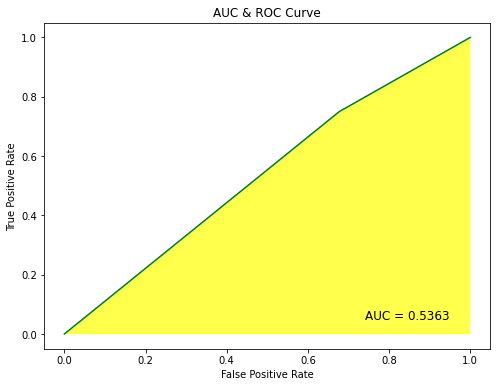

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte)

fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Per Saham

## ADRO.JK

In [ ]:
adro_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
adro_df.isnull().any(axis = 0)

closen             False
predn              False
SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

### Data Outlier

In [ ]:
print(adro_df)

      closen  predn  SES adj close       MACD       MTM        RSI  \
32       1.0    1.0    1042.492356  -3.499505  -46.5584  32.133537   
33      -1.0   -1.0    1055.546288  -3.869753  -32.7079  41.009970   
34       1.0    1.0    1049.501476  -4.390324  -36.7830  38.510937   
35       0.0    1.0    1057.479315  -4.209938  -24.6774  43.389017   
36       0.0   -1.0    1069.325595  -3.312034   -4.4814  49.733415   
...      ...    ...            ...        ...       ...        ...   
1256     1.0    1.0    1773.270446  40.453447  303.6849  90.063550   
1257     0.0   -1.0    1809.718963  42.696556  320.2428  91.291401   
1258     1.0    1.0    1811.311141  43.422506  272.3885  91.341477   
1259     0.0    1.0    1862.003654  45.835602  300.4367  92.761373   
1260     1.0    1.0    1891.507870  48.197817  310.3027  93.432937   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    649.552472 -2.878510e+10 -242.080061  19.190094  ... -25.829553   
33    648.747

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(adro_df))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
32    1.575420  0.905947       0.140527  0.315724  0.471808  1.108360   
33    1.632850  1.103817       0.077372  0.340935  0.351395  0.599835   
34    1.575420  0.905947       0.106617  0.376381  0.386823  0.743003   
35    0.028715  0.905947       0.068020  0.364099  0.281581  0.463541   
36    0.028715  1.103817       0.010708  0.302959  0.106002  0.100075   
...        ...       ...            ...       ...       ...       ...   
1256  1.575420  0.905947       3.394988  2.677101  2.573107  2.210410   
1257  0.028715  1.103817       3.571326  2.829838  2.717056  2.280753   
1258  1.575420  0.905947       3.579029  2.879269  2.301025  2.283621   
1259  0.028715  0.905947       3.824280  3.043580  2.544868  2.364966   
1260  1.575420  0.905947       3.967022  3.204427  2.630640  2.403440   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
32    1.011066  1.743028  2.126554  1.546625  ... 

In [ ]:
threshold = 4
outliers = np.where(z_score > threshold)
adro_df = adro_df[z_score < threshold]
print(adro_df)

      closen  predn  SES adj close       MACD       MTM        RSI  \
32       1.0    1.0    1042.492356  -3.499505  -46.5584  32.133537   
33      -1.0   -1.0    1055.546288  -3.869753  -32.7079  41.009970   
34       1.0    1.0    1049.501476  -4.390324  -36.7830  38.510937   
35       0.0    1.0    1057.479315  -4.209938  -24.6774  43.389017   
36       0.0   -1.0    1069.325595  -3.312034   -4.4814  49.733415   
...      ...    ...            ...        ...       ...        ...   
1256     1.0    1.0    1773.270446  40.453447  303.6849  90.063550   
1257     0.0   -1.0    1809.718963  42.696556  320.2428  91.291401   
1258     1.0    1.0    1811.311141  43.422506  272.3885  91.341477   
1259     0.0    1.0    1862.003654  45.835602  300.4367  92.761373   
1260     1.0    1.0    1891.507870  48.197817  310.3027  93.432937   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    649.552472 -2.878510e+10 -242.080061  19.190094  ... -25.829553   
33    648.747

In [ ]:
adro_df = adro_df.dropna()
print(adro_df)

      closen  predn  SES adj close       MACD       MTM        RSI  \
32       1.0    1.0    1042.492356  -3.499505  -46.5584  32.133537   
33      -1.0   -1.0    1055.546288  -3.869753  -32.7079  41.009970   
34       1.0    1.0    1049.501476  -4.390324  -36.7830  38.510937   
35       0.0    1.0    1057.479315  -4.209938  -24.6774  43.389017   
36       0.0   -1.0    1069.325595  -3.312034   -4.4814  49.733415   
...      ...    ...            ...        ...       ...        ...   
1255     0.0    1.0    1758.585935  38.928719  324.6236  89.507258   
1256     1.0    1.0    1773.270446  40.453447  303.6849  90.063550   
1257     0.0   -1.0    1809.718963  42.696556  320.2428  91.291401   
1258     1.0    1.0    1811.311141  43.422506  272.3885  91.341477   
1259     0.0    1.0    1862.003654  45.835602  300.4367  92.761373   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    649.552472 -2.878510e+10 -242.080061  19.190094  ... -25.829553   
33    648.747

### Data Splitting

In [ ]:
# membagi jadi x dan y
x = adro_df.drop(['predn', 'closen'], axis = 1)
y = adro_df['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

#### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte, labels = labels)
print(confusion_matrix)

NameError: name 'labels' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytrain, y_predta)

array([[ 82,  63,   3],
       [  1, 518,   2],
       [  4,  67,  95]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.8323353293413174

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.573816
1  Precision  0.423345
2     Recall  0.573816
3   F1 Score  0.464949


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.11      0.01      0.03        71
         0.0       0.61      0.93      0.74       218
         1.0       0.16      0.04      0.07        70

    accuracy                           0.57       359
   macro avg       0.29      0.33      0.28       359
weighted avg       0.42      0.57      0.46       359



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.6803621169916435

### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(2, 1000, 50))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 352, max_depth = 6,
                             min_samples_split = 34, min_samples_leaf = 10,
                             max_features = 1, oob_score = True,
                             random_state = 100)
# cv = 3
# None: accuracy = 0.605341, auc = 0.501288
# sqrt: accuracy = 0.608309, auc = 0.507566
# log2: accuracy = 0.611276, auc = 0.508380
# 0.25: accuracy = 0.605341, auc = 0.503390
# 0.5: accuracy = 0.605341, auc = 0.503390
# 0.75: accuracy = 0.602374, auc = 0.504110
# 1: accuracy = 0.611276, auc = 0.503546

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
# masih error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  0,  71,   0],
       [  0, 217,   1],
       [  0,  70,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'macro')
recall = recall_score(ytest, y_predbestvc1, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.611276
1  Precision  0.536706
2     Recall  0.337900
3   F1 Score  0.261628


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5035457312854573

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte)

fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(2,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'f1_micro')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 452, max_depth = 122,
                             min_samples_split = 30, min_samples_leaf = 10,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.601671, auc = 0.701253
# 1, 2, 3 kolom pertama dan 0, 4, 3 kolom terakhir

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 452, max_depth = 282,
                             min_samples_split = 34, min_samples_leaf = 6,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.601671, auc = 0.701253
# 1, 2, 3 kolom pertama dan 3, 4, 3 kolom terakhir

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 552, max_depth = 46,
                             min_samples_split = 58, min_samples_leaf = 14,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.604457, auc = 0.703342
# 0, 0, 2 kolom pertama dan 2, 4, 3 kolom terakhir

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 502, max_depth = 222,
                             min_samples_split = 34, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.601671, auc = 0.701253
# 1, 2, 2 kolom pertama dan 1, 5, 4 kolom terakhir

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 802, max_depth = 122,
                             min_samples_split = 26, min_samples_leaf = 10,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.598886, auc = 0.699164
# 1, 2, 2 kolom pertama dan 0, 4, 2 kolom terakhir

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 502, max_depth = 194,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 2, 6, 3 kolom pertama dan 9, 17, 3 kolom terakhir(pake 0.25; 0.557103, 0.667827)
# 2, 8, 3 kolom pertama dan 10, 16, 2 kolom terakhir (pake None; 0.551532, 0.663649)
# 2, 6, 3 kolom pertama dan 7, 13, 3 kolom terakhir (pake log2; 0.568245, 0.676183)
# 2, 6, 3 kolom pertama dan 10, 15, 3 kolom terakhir (pake sqrt; 0.562674, 0.672005)

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 752, max_depth = 50,
                             min_samples_split = 54, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 1, 2, 2 kolom pertama dan 2, 6, 5 kolom terakhir (pake 0.5; 0.601671, 0.701253)
# 1, 2, 3 kolom pertama dan 3, 6, 4 kolom terakhir (pake None; 0.598886, 0.699164)
# 1, 2, 1 kolom pertama dan 2, 4, 4 kolom terakhir (pake log2; 0.604457, 0.703342)
# 1, 2, 1 kolom pertama dan 2, 4, 5 kolom terakhir (pake sqrt; 0.607242, 0.705431)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 102, max_depth = 174,
                             min_samples_split = 6, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 1, 6, 3 kolom pertama dan 4, 9, 3 kolom terakhir (pake 0.5; 0.576602, 0.682451)
# 1, 5, 3 kolom pertama dan 5, 11, 1 kolom terakhir (pake None; 0.568245, 0.676183)
# 1, 4, 2 kolom pertama dan 1, 5, 2 kolom terakhir (pake log2; 0.590529, 0.692896)
# 1, 4, 2 kolom pertama dan 3, 6, 2 kolom terakhir (pake sqrt; 0.587744, 0.690807)

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 302, max_depth = 214,
                             min_samples_split = 70, min_samples_leaf = 10,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0, 2, 2 kolom pertama dan 2, 4, 3 kolom terakhir (pake None; 0.598886, 0.699164)
# 2, 4, 6 kolom terakhir (pake log2; 0.612813, 0.709610)
# 0, 0, 1 kolom pertama dan 2, 4, 4 kolom terakhir (pake sqrt; 0.607242, 0.709610)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 102, max_depth = 62,
                             min_samples_split = 22, min_samples_leaf = 62,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 0 semua

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 802, max_depth = 102,
                             min_samples_split = 54, min_samples_leaf = 14,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0, 0, 1 kolom pertama dan 2, 4, 4 kolom terakhir(pake 0.5; 0.607242, 0.705431)
# 0, 1, 2 kolom pertama dan 2, 4, 3 kolom terakhir (pake None; 0.601671, 0.701253)
# 2, 4, 4 kolom terakhir (pake log2; 0.607242, 0.705431)
# 4, 8, 4 kolom terakhir (pake sqrt; 0.610028, 0.707520.)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 450, max_depth = 28,
                             min_samples_split = 4, min_samples_leaf = 4,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 1, 6, 2 kolom pertama dan 7, 14, 2 kolom terakhir (pake None; 0.559889, 0.669916)
# 1, 5, 2 kolom pertama dan 4, 9, 3 kolom terakhir (pake log2; 0.579387, 0.684540)
# 1, 5, 3 kolom pertama dan 5, 11,3 kolom terakhir (pake sqrt; 0.573816, 0.680362)

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 400, max_depth = 26,
                             min_samples_split = 22, min_samples_leaf = 4,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 1, 4, 3 kolom pertama dan 3, 9, 3 kolom terakhir (pake None; 0.582173, 0.6866295)
# 1, 3, 3 kolom pertama dan 0, 6, 2 kolom terakhir (pake log2; 0.590529, 0.692896)
# 1, 3, 2 kolom pertama dan 2, 5, 2 kolom terakhir (pake sqrt; 0.593315, 0.694986)

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 450, max_depth = 26,
                             min_samples_split = 28, min_samples_leaf = 16,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0, 0, 1 kolom pertama dan 0, 4, 3 kolom terakhir (pake None; 0.604457, 0.703342)
# 0, 0, 1 kolom pertama dan 0, 4, 3 kolom terakhir (pake log2; 0.604457, 0.703342)
# 14, 7, 7 kolom pertama dan 4, 8, 4 kolom terakhir (pake sqrt; 0.599379, 0.699534)

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)v

In [ ]:
rfc_bestr15 = RandomForestClassifier(n_estimators = 200, max_depth = 24,
                             min_samples_split = 4, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 2, 12, 4 kolom pertama dan 9, 18, 3 kolom terakhir (pake None; 0.537604, 0.653203)
# 2, 9, 4 kolom pertama dan 7, 14, 3 kolom terakhir (pake log2; 0.557103, 0.667827)
# 3, 8, 3 kolom pertama dan 7, 17, 3 kolom terakhir (pake sqrt; 0.554318, 0.665738)

rfc_bestr15.fit(xtrain, ytrain)

y_predbestr15 = rfc_bestr15.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr16 = RandomForestClassifier(n_estimators = 200, max_depth = 22,
                             min_samples_split = 38, min_samples_leaf = 38,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0 semua

rfc_bestr16.fit(xtrain, ytrain)

y_predbestr16 = rfc_bestr16.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

#### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr13)

array([[  1,  70,   0],
       [  3, 209,   6],
       [  3,  65,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr13)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr13, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr13, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr13, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.590529
1  Precision  0.445935
2     Recall  0.590529
3   F1 Score  0.466720


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr13))

              precision    recall  f1-score   support

        -1.0       0.14      0.01      0.03        71
         0.0       0.61      0.96      0.74       218
         1.0       0.25      0.03      0.05        70

    accuracy                           0.59       359
   macro avg       0.33      0.33      0.27       359
weighted avg       0.45      0.59      0.47       359



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr13)

0.6928969359331476

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Feature Importance

#### Feature Importance sebelum VC

Feature ranking:
1. feature 9 (0.025159)
2. feature 10 (0.028282)
3. feature 3 (0.030147)
4. feature 4 (0.030892)
5. feature 16 (0.031071)
6. feature 0 (0.031625)
7. feature 1 (0.033291)
8. feature 5 (0.033372)
9. feature 15 (0.033842)
10. feature 19 (0.034202)
11. feature 12 (0.036087)
12. feature 18 (0.036402)
13. feature 11 (0.037381)
14. feature 14 (0.038169)
15. feature 2 (0.038771)
16. feature 13 (0.039198)
17. feature 6 (0.039490)
18. feature 24 (0.040377)
19. feature 7 (0.041137)
20. feature 20 (0.042303)
21. feature 17 (0.044051)
22. feature 23 (0.049042)
23. feature 8 (0.049534)
24. feature 21 (0.050707)
25. feature 22 (0.051770)
26. feature 25 (0.053697)


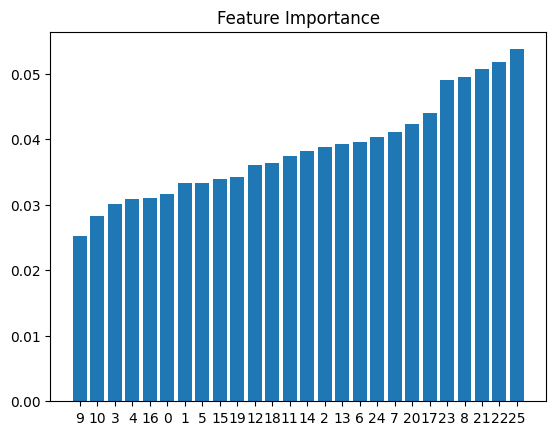

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [25, 22, 21, 8, 23, 17, 20, 7, 24] # accuracy = 0.579387, auc = 0.684540 (2, 4, 4 kolom pertama dan 4, 8, 0 kolom terakhir)
#important_features = [25, 22, 21, 8, 23, 17, 20, 7] # accuracy = 0.582173, auc = 0.686629 (1, 3, 2 kolom pertama dan 3, 7, 0 kolom terakhir)
#important_features = [25, 22, 21, 8, 23, 17, 20] # accuracy = 0.582173, auc = 0.686629 (2, 3, 3 kolom pertama dan 4, 8, 0 kolom terakhir)
#important_features = [25, 22, 21, 8, 23, 17] # accuracy = 0.587744, auc = 0.690807 (1, 3, 3 kolom pertama dan 6, 5, 0 kolom terakhir)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  2,  65,   4],
       [  4, 206,   8],
       [  4,  66,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.579387
1  Precision  0.410747
2     Recall  0.579387
3   F1 Score  0.460548


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.20      0.03      0.05        71
         0.0       0.61      0.94      0.74       218
         1.0       0.00      0.00      0.00        70

    accuracy                           0.58       359
   macro avg       0.27      0.32      0.26       359
weighted avg       0.41      0.58      0.46       359



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.684540389972145

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance setelah VC

Feature ranking:
1. feature 9 (0.000000)
2. feature 4 (0.000000)
3. feature 3 (0.001459)
4. feature 8 (0.003015)
5. feature 1 (0.003047)
6. feature 0 (0.003216)
7. feature 12 (0.004177)
8. feature 19 (0.005268)
9. feature 16 (0.005271)
10. feature 5 (0.005397)
11. feature 17 (0.005882)
12. feature 7 (0.009838)
13. feature 22 (0.010571)
14. feature 21 (0.011314)
15. feature 14 (0.018065)
16. feature 20 (0.018870)
17. feature 6 (0.025180)
18. feature 2 (0.026761)
19. feature 18 (0.055254)
20. feature 24 (0.060909)
21. feature 13 (0.062797)
22. feature 10 (0.079862)
23. feature 25 (0.093262)
24. feature 23 (0.100159)
25. feature 15 (0.134886)
26. feature 11 (0.255538)


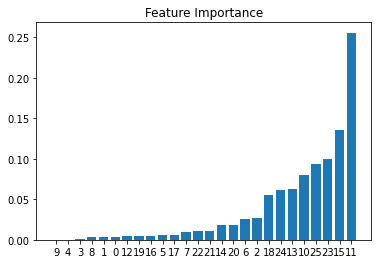

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [11] #accuracy = 0.647696, auc = 0.508056
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

array([[  0,  67,   4],
       [  0, 212,  10],
       [  0,  67,   6]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.595628
1  Precision  0.304239
2     Recall  0.345716
3   F1 Score  0.291837


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5098016017092412

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance sesudah RS

Feature ranking:
1. feature 16 (0.026010)
2. feature 9 (0.026817)
3. feature 0 (0.030715)
4. feature 1 (0.030775)
5. feature 4 (0.032200)
6. feature 3 (0.032474)
7. feature 10 (0.032664)
8. feature 18 (0.032985)
9. feature 19 (0.034098)
10. feature 5 (0.035997)
11. feature 11 (0.037281)
12. feature 12 (0.037720)
13. feature 15 (0.037822)
14. feature 20 (0.038370)
15. feature 2 (0.038623)
16. feature 6 (0.039286)
17. feature 13 (0.040528)
18. feature 14 (0.040983)
19. feature 24 (0.041022)
20. feature 7 (0.041477)
21. feature 21 (0.041950)
22. feature 17 (0.042439)
23. feature 8 (0.047793)
24. feature 22 (0.048838)
25. feature 23 (0.053024)
26. feature 25 (0.058108)


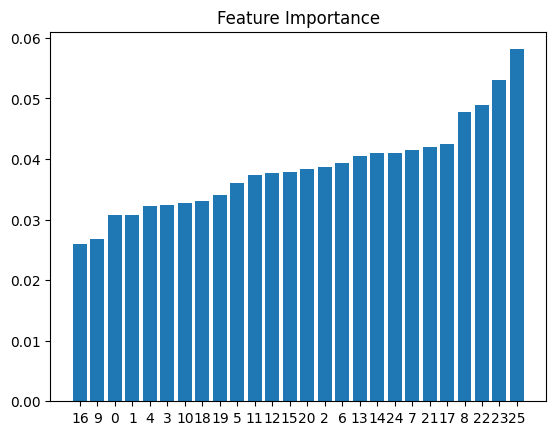

In [ ]:
importances = rfc_bestr13.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [25, 23, 22, 8, 17, 21, 7, 24, 14, 13] #accuracy = 0.590529, auc = 0.692896 (1, 3, 3 kolom pertama dan 4, 5, 1 kolom terakhir)
important_features = [25, 23, 22, 8, 17, 21, 7, 24, 14] #accuracy = 0.590529, auc = 0.692896 (1, 3, 3 kolom pertama dan 3, 4, 0 kolom terakhir)
important_features = [25, 23, 22, 8, 17, 21, 7, 24] #accuracy = 0.596100, auc = 0.697075 (1, 3, 3 kolom pertama dan 2, 2, 0 kolom terakhir)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr13.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr13.predict(xtest_ifrs)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  1,  68,   2],
       [  3, 213,   2],
       [  3,  67,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted')
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.596100
1  Precision  0.399927
2     Recall  0.596100
3   F1 Score  0.462112


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.14      0.01      0.03        71
         0.0       0.61      0.98      0.75       218
         1.0       0.00      0.00      0.00        70

    accuracy                           0.60       359
   macro avg       0.25      0.33      0.26       359
weighted avg       0.40      0.60      0.46       359



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.6970752089136489

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.568306
1  Precision  0.352433
2     Recall  0.343474
3   F1 Score  0.313317


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5095324114121854

## INDY.JK

In [ ]:
indy_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
indy_df.isnull().any(axis = 0)

closen             False
predn              False
SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

### Data Outlier

In [ ]:
print(indy_df)

      closen  predn  SES adj close       MACD         MTM        RSI  \
32       0.0   -1.0     554.933010   0.823587   15.414456  55.709879   
33       0.0   -1.0     551.590223   0.487123   22.727706  52.761154   
34       1.0    1.0     546.163734  -0.073149   20.751670  48.255398   
35       0.0    1.0     549.083148  -0.306714   -4.644642  50.712216   
36      -1.0   -1.0     554.297952  -0.170659  -13.587702  54.756978   
...      ...    ...            ...        ...         ...        ...   
1256     0.0    1.0    1489.004072 -18.194091 -153.006973  26.478603   
1257     0.0    1.0    1476.270102 -20.599184 -165.275337  25.265828   
1258     1.0    1.0    1472.302349 -22.078289 -178.607273  24.949648   
1259     0.0    1.0    1518.303274 -20.021726 -130.090685  36.984668   
1260    -1.0   -1.0    1541.303736 -16.787529 -108.231622  42.063684   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    208.947609 -2.398389e+09   -4.387359  73.083686  ...   7

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(indy_df))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
32    0.052042  1.042395       1.295751  0.040834  0.013718  0.251018   
33    0.052042  1.042395       1.300486  0.051731  0.045433  0.108054   
34    1.539469  0.959329       1.308173  0.069876  0.036864  0.110399   
35    0.052042  0.959329       1.304037  0.077441  0.073270  0.008716   
36    1.435385  1.042395       1.296651  0.073034  0.112053  0.204818   
...        ...       ...            ...       ...       ...       ...   
1256  0.052042  0.959329       0.027321  0.656747  0.716661  1.166205   
1257  0.052042  0.959329       0.009284  0.734639  0.769864  1.225004   
1258  1.539469  0.959329       0.003664  0.782542  0.827679  1.240334   
1259  0.052042  0.959329       0.068822  0.715937  0.617282  0.656838   
1260  1.435385  1.042395       0.101401  0.611194  0.522487  0.410592   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
32    0.485084  2.568460  0.005810  0.868424  ... 

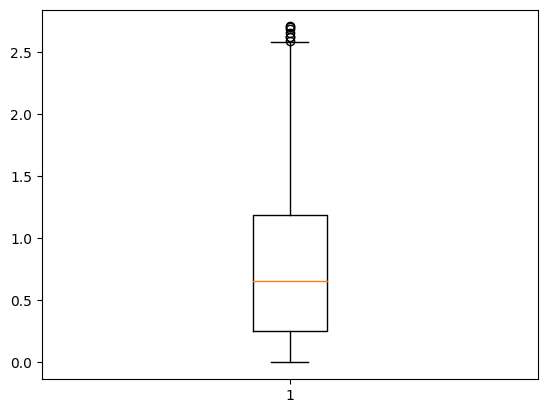

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
indy_df = indy_df[z_score < threshold]
print(indy_df)

      closen  predn  SES adj close       MACD         MTM        RSI  \
32       0.0   -1.0     554.933010   0.823587   15.414456  55.709879   
33       0.0   -1.0     551.590223   0.487123   22.727706  52.761154   
34       1.0    1.0     546.163734  -0.073149   20.751670  48.255398   
35       0.0    1.0     549.083148  -0.306714   -4.644642  50.712216   
36      -1.0   -1.0     554.297952  -0.170659  -13.587702  54.756978   
...      ...    ...            ...        ...         ...        ...   
1256     0.0    1.0    1489.004072 -18.194091 -153.006973  26.478603   
1257     0.0    1.0    1476.270102 -20.599184 -165.275337  25.265828   
1258     1.0    1.0    1472.302349 -22.078289 -178.607273  24.949648   
1259     0.0    1.0    1518.303274 -20.021726 -130.090685  36.984668   
1260    -1.0   -1.0    1541.303736 -16.787529 -108.231622  42.063684   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    208.947609 -2.398389e+09   -4.387359  73.083686  ...   7

In [ ]:
indy_df = indy_df.dropna()
print(indy_df)

      closen  predn  SES adj close       MACD         MTM        RSI  \
32       0.0   -1.0     554.933010   0.823587   15.414456  55.709879   
33       0.0   -1.0     551.590223   0.487123   22.727706  52.761154   
34       1.0    1.0     546.163734  -0.073149   20.751670  48.255398   
35       0.0    1.0     549.083148  -0.306714   -4.644642  50.712216   
36      -1.0   -1.0     554.297952  -0.170659  -13.587702  54.756978   
...      ...    ...            ...        ...         ...        ...   
1256     0.0    1.0    1489.004072 -18.194091 -153.006973  26.478603   
1257     0.0    1.0    1476.270102 -20.599184 -165.275337  25.265828   
1258     1.0    1.0    1472.302349 -22.078289 -178.607273  24.949648   
1259     0.0    1.0    1518.303274 -20.021726 -130.090685  36.984668   
1260    -1.0   -1.0    1541.303736 -16.787529 -108.231622  42.063684   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    208.947609 -2.398389e+09   -4.387359  73.083686  ...   7

### Data Splitting

In [ ]:
# membagi jadi x dan y
x = indy_df.drop(['predn', 'closen'], axis = 1)
y = indy_df['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

#### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
print(confusion_matrix)

[[  8  61   3]
 [ 16 168  10]
 [ 10  47   9]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytrain, y_predta)

array([[160,  42,   1],
       [  1, 413,   1],
       [  7,  54,  94]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.8628719275549805

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.557229
1  Precision  0.488037
2     Recall  0.557229
3   F1 Score  0.491136


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.24      0.11      0.15        72
         0.0       0.61      0.87      0.71       194
         1.0       0.41      0.14      0.20        66

    accuracy                           0.56       332
   macro avg       0.42      0.37      0.36       332
weighted avg       0.49      0.56      0.49       332



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.6679216867469879

### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(2,1000, 50))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 752, max_depth = 2,
                             min_samples_split = 88, min_samples_leaf = 34,
                             max_features = 1, oob_score = True,
                             random_state = 100)
# cv = 3
# None: accuracy = 0.567485, auc = 0.509968
# sqrt = log2 = 0.25 = 1: accuracy = 0.558282, auc = 0.5
# 0.5: accuracy = 0.558282, auc = 0.500472
# 0.75: accuracy = 0.561350, auc = 0.503636

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
# masih error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  0,  83,   0],
       [  0, 182,   0],
       [  0,  61,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'macro')
recall = recall_score(ytest, y_predbestvc1, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.558282
1  Precision  0.186094
2     Recall  0.333333
3   F1 Score  0.238845


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte)

fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(50,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 152, max_depth = 242,
                             min_samples_split = 26, min_samples_leaf = 22,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.576687, auc = 0.527798

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 502, max_depth = 290,
                             min_samples_split = 26, min_samples_leaf = 10,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.573620, auc = 0.543129

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 902, max_depth = 86,
                             min_samples_split = 86, min_samples_leaf = 50,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.561350, auc = 0.503637

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 102, max_depth = 78,
                             min_samples_split = 2, min_samples_leaf = 42,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.573620, auc = 0.518804

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 602, max_depth = 138,
                             min_samples_split = 78, min_samples_leaf = 34,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.570552, auc = 0.519962
# 2, 8, 3 kolom pertama

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 602, max_depth = 138,
                             min_samples_split = 78, min_samples_leaf = 34,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 2, 8, 3 kolom pertama (pake 0.75; 0.566265, 0.674698)
# 13, 8, 9 kolom pertama dan 9, 8, 2 kolom terakhir (pake None; 0.577640, 0.683229)
# 13, 8, 7 kolom pertama dan 5, 10, 1 kolom terakhir (pake log2; 0.577640, 0.683229)
# 14, 7, 7 kolom pertama dan 4, 8, 4 kolom terakhir (pake sqrt; 0.599379, 0.699534)

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 900, max_depth = 162,
                             min_samples_split = 38, min_samples_leaf = 26,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 4, 11, 8 kolom pertama dan 0, 1, 0 kolom terakhir (pake 0.75; 0.560241, 0.670180)
# 5, 13, 9 kolom pertama (pake None; 0.560241, 0.670180)
# 2, 6, 2 kolom pertama (pake log2; 0.572289, 0.679216)
# 2, 6, 2 kolom pertama (pake sqrt; 0.572289, 0.679216)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 600, max_depth = 70,
                             min_samples_split = 6, min_samples_leaf = 14,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 4, 15, 9 kolom pertama dan 1, 2, 3 kolom terakhir (pake 0.5; 0.554217, 0.665663)
# 5, 15, 10 kolom pertama dan 1, 4, 2 kolom terakhir (pake None; 0.548193, 0.661144)
# 4, 14, 6 kolom pertama dan 0, 2, 2 kolom terakhir (pake log2; 0.554217, 0.665662)
# 4, 12, 5 kolom pertama dan 0, 2, 3 kolom terakhir (pake sqrt; 0.563253, 0.672439)

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 300, max_depth = 10,
                             min_samples_split = 22, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 6, 17, 10 kolom pertama dan 1, 5, 3 kolom terakhir (pake 0.75; 0.545181, 0.658885)
# 4, 16, 8 kolom pertama dan 1, 6, 2 kolom terakhir (pake log2; 0.536145, 0.652108)
# 4, 16, 8 kolom pertama dan 1, 6, 2 kolom terakhir (pake sqrt; 0.536145, 0.652108)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 650, max_depth = 286,
                             min_samples_split = 14, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 9, 17, 10 kolom pertama dan 3, 10, 9 kolom terakhir (pake None; 0.557229, 0.667921)
# 5, 18, 8 kolom pertama dan 2, 10, 7 kolom terakhir (pake log2; 0.536145, 0.652108)
# 6, 18, 9 kolom pertama dan 4, 9, 6 kolom terakhir (pake sqrt; 0.539157, 0.654367)

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 850, max_depth = 278,
                             min_samples_split = 10, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 9, 19 10 kolom pertama dan 5, 15, 10 kolom terakhir (pake 0.75; 0.539157, 0.654367)
# 9, 21, 10 kolom pertama dan 6, 14, 9 kolom terakhir (pake None; 0.533133, 0.649849)
# 8, 19, 9 kolom pertama dan 4, 15, 8 kolom terakhir (pake sqrt; 0.530120, 0.6475903)
# 7, 22, 8 kolom pertama dan 3, 11, 9 kolom terakhir (pake sqrt; 0.533133, 0.649849)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'balanced_accuracy')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 250, max_depth = 24,
                             min_samples_split = 8, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 9, 21, 10 kolom pertama dan 3, 15, 9 kolom terakhir (pake None; 0.530120, 0.647590)
# 13, 8, 7 kolom pertama dan 5, 10, 1 kolom terakhir (pake log2; 0.527108, 0.645331)
# 8, 18, 7 kolom pertama dan 5, 10, 10 kolom terakhir (pake sqrt; 0.554217, 0.665662)

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 300, max_depth = 26,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 9, 23, 9 kolom pertama dan 5, 16, 10 kolom terakhir (pake None; 0.524096, 0.643072)
# 9, 24, 9 kolom pertama dan 6, 15, 9 kolom terakhir (pake log2; 0.521084, 0.640813)
# 8, 22, 8 kolom pertama dan 6, 15, 10 kolom terakhir (pake sqrt; 0.527108, 0.645331)

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 400, max_depth = 24,
                             min_samples_split = 14, min_samples_leaf = 12,
                             max_features = , oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 5, 18, 11 kolom pertama dan 1, 4, 2 kolom terakhir (pake None; 0.539157, 0.654367)
# 3, 14, 7 kolom pertama dan 1, 5, 2 kolom terakhir (pake log2; 0.542169, 0.656626)
# 4, 14, 7 kolom pertama dan 0, 2, 3 kolom terakhir (pake sqrt; 0.557229, 0.667921)

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr15 = RandomForestClassifier(n_estimators = 450, max_depth = 26,
                             min_samples_split = 34, min_samples_leaf = 16,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 6, 17, 10 kolom pertama dan 0, 3, 3 kolom terakhir (pake None; 0.551205, 0.663403)
# 13, 8, 7 kolom pertama dan 5, 10, 1 kolom terakhir (pake log2; 0.569277, 0.676957)
# 5, 11, 7 kolom pertama dan 0, 2, 2 kolom terakhir (pake sqrt; 0.566265, 0.566265)

rfc_bestr15.fit(xtrain, ytrain)

y_predbestr15 = rfc_bestr15.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

#### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr10)

array([[  9,  60,   3],
       [ 17, 167,  10],
       [ 10,  47,   9]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr10)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr10, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr10, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr10, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.557229
1  Precision  0.491689
2     Recall  0.557229
3   F1 Score  0.493834


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr10))

              precision    recall  f1-score   support

        -1.0       0.25      0.12      0.17        72
         0.0       0.61      0.86      0.71       194
         1.0       0.41      0.14      0.20        66

    accuracy                           0.56       332
   macro avg       0.42      0.37      0.36       332
weighted avg       0.49      0.56      0.49       332



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr10)

0.6679216867469879

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 10 (0.021102)
2. feature 9 (0.022342)
3. feature 11 (0.024432)
4. feature 15 (0.028326)
5. feature 13 (0.032171)
6. feature 4 (0.033153)
7. feature 0 (0.033636)
8. feature 5 (0.034013)
9. feature 12 (0.034437)
10. feature 19 (0.034677)
11. feature 7 (0.037359)
12. feature 2 (0.038017)
13. feature 14 (0.038645)
14. feature 25 (0.038745)
15. feature 24 (0.040020)
16. feature 8 (0.040942)
17. feature 18 (0.042940)
18. feature 1 (0.043395)
19. feature 16 (0.043487)
20. feature 6 (0.043889)
21. feature 17 (0.046062)
22. feature 23 (0.046108)
23. feature 22 (0.046381)
24. feature 3 (0.051276)
25. feature 21 (0.052111)
26. feature 20 (0.052333)


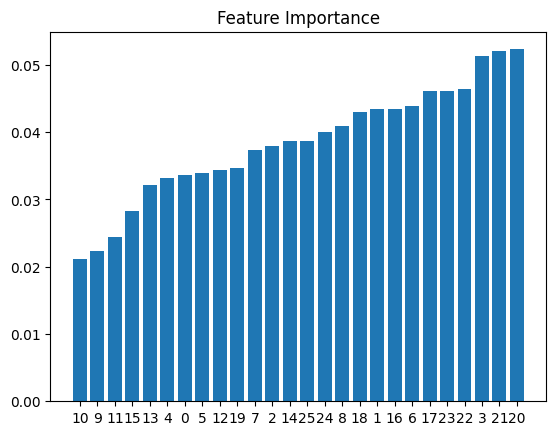

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [20, 21, 3, 22, 23, 17, 6, 16, 1, 18] #5, 18, 9 kolom pertama dan 3, 6, 7 kolom terakhir (accuracy = 0.548193, auc = 0.661144)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  5,  64,   3],
       [ 18, 170,   6],
       [  9,  50,   7]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.548193
1  Precision  0.470638
2     Recall  0.548193
3   F1 Score  0.470431


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.16      0.07      0.10        72
         0.0       0.60      0.88      0.71       194
         1.0       0.44      0.11      0.17        66

    accuracy                           0.55       332
   macro avg       0.40      0.35      0.33       332
weighted avg       0.47      0.55      0.47       332



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.661144578313253

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance setelah VC

Feature ranking:
1. feature 9 (0.002061)
2. feature 15 (0.002918)
3. feature 11 (0.004741)
4. feature 10 (0.008985)
5. feature 12 (0.012344)
6. feature 0 (0.013348)
7. feature 19 (0.019676)
8. feature 3 (0.023092)
9. feature 4 (0.023165)
10. feature 6 (0.023196)
11. feature 16 (0.027777)
12. feature 2 (0.028004)
13. feature 13 (0.028469)
14. feature 7 (0.030199)
15. feature 5 (0.041316)
16. feature 14 (0.041709)
17. feature 24 (0.042256)
18. feature 25 (0.044707)
19. feature 22 (0.046441)
20. feature 21 (0.047896)
21. feature 18 (0.054325)
22. feature 1 (0.060993)
23. feature 23 (0.062887)
24. feature 8 (0.091451)
25. feature 20 (0.096284)
26. feature 17 (0.121759)


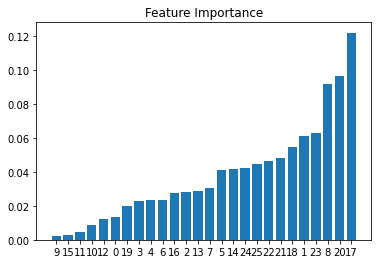

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [17] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20] #accuracy = 0.524590, auc = 0.506083
important_features = [17, 20, 8] #accuracy = 0.524590, auc = 0.500347
important_features = [17, 20, 8, 23] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18, 21] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18, 21, 22] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18, 21, 22, 25] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18, 21, 22, 25, 24] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18, 21, 22, 25, 24, 14] #accuracy = 0.527322, auc = 0.5
important_features = [17, 20, 8, 23, 1, 18, 21, 22, 25, 24, 14, 5] #accuracy = 0.527322, auc = 0.5
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.527322
1  Precision  0.175774
2     Recall  0.333333
3   F1 Score  0.230173


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 19 (0.027690)
2. feature 10 (0.028441)
3. feature 15 (0.028464)
4. feature 7 (0.029078)
5. feature 11 (0.030989)
6. feature 9 (0.032030)
7. feature 2 (0.032115)
8. feature 25 (0.032557)
9. feature 18 (0.033723)
10. feature 8 (0.033961)
11. feature 13 (0.035114)
12. feature 0 (0.035858)
13. feature 12 (0.037044)
14. feature 24 (0.037742)
15. feature 14 (0.037936)
16. feature 1 (0.040162)
17. feature 5 (0.040173)
18. feature 6 (0.040796)
19. feature 4 (0.041918)
20. feature 21 (0.044750)
21. feature 17 (0.045226)
22. feature 22 (0.045292)
23. feature 16 (0.045933)
24. feature 20 (0.050070)
25. feature 3 (0.052461)
26. feature 23 (0.060477)


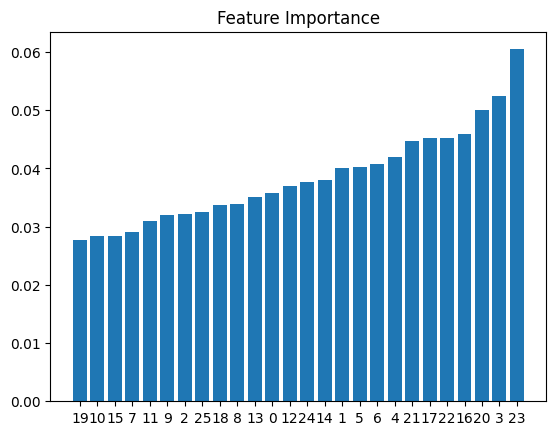

In [ ]:
importances = rfc_bestr15.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 10 none
important_features = [21, 20, 22, 23, 6, 8, 3, 17, 24, 14, 16, 25, 7] #11, 16, 12 kolom pertama dan 4, 9, 9 kolom terakhir (accuracy = 0.569277, auc = 0.676957)
# -- rf 8 sqrt
#important_features = [23, 20, 21, 3, 17, 16, 6, 22, 14] #7, 13, 9 kolom pertama dan 1, 2, 1 kolom terakhir (0.563253, 0.672439)
# -- rf 15 log2
#important_features = [23, 3, 20, 16, 22, 17, 21, 4, 6, 5] #4, 12, 8 kolom pertama dan 1, 1, 1 kolom terakhir (0.560241, 0.670180)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr10.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr10.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[ 11,  57,   4],
       [ 16, 169,   9],
       [ 12,  45,   9]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.569277
1  Precision  0.506895
2     Recall  0.569277
3   F1 Score  0.508390


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.28      0.15      0.20        72
         0.0       0.62      0.87      0.73       194
         1.0       0.41      0.14      0.20        66

    accuracy                           0.57       332
   macro avg       0.44      0.39      0.38       332
weighted avg       0.51      0.57      0.51       332



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.6769578313253012

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.535519
1  Precision  0.471079
2     Recall  0.368801
3   F1 Score  0.323858


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5276558921898619

## PTBA.JK

In [ ]:
ptba_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
ptba_df.isnull().any(axis = 0)

closen             False
predn              False
SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

### Data Outlier

In [ ]:
print(ptba_df)

      closen  predn  SES adj close       MACD        MTM        RSI  \
32       0.0   -1.0    1268.428103 -12.321961 -34.841404  29.557666   
33       0.0   -1.0    1255.988527 -12.941770 -20.312731  27.658549   
34       1.0    1.0    1245.430787 -13.691238 -18.832330  26.131761   
35       0.0    1.0    1264.733704 -12.819867 -22.430081  33.340011   
36       0.0   -1.0    1283.061066 -10.863357 -31.458937  39.359695   
...      ...    ...            ...        ...        ...        ...   
1256     0.0    1.0    2295.467421   2.698934  17.490584  53.146655   
1257     0.0   -1.0    2301.235298   2.623892   8.745292  54.471180   
1258     1.0    1.0    2299.862766   2.432551 -16.909703  54.081384   
1259     0.0   -1.0    2341.741075   4.619731  12.827375  62.786924   
1260    -1.0   -1.0    2358.423760   7.028440  36.208854  65.572723   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    981.668912 -1.239526e+10 -104.508983  34.447106  ... -35.592745   
3

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(ptba_df))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
32    0.023058  1.127705       1.445696  0.598228  0.258638  1.163453   
33    0.023058  1.127705       1.471284  0.624194  0.178942  1.263815   
34    1.748064  0.886757       1.493001  0.655593  0.170821  1.344501   
35    0.023058  0.886757       1.453295  0.619087  0.190556  0.963569   
36    0.023058  1.127705       1.415597  0.537121  0.240084  0.645448   
...        ...       ...            ...       ...       ...       ...   
1256  0.023058  0.886757       0.666890  0.031062  0.028426  0.083146   
1257  0.023058  1.127705       0.678755  0.027918  0.019546  0.153143   
1258  1.748064  0.886757       0.675931  0.019902  0.160275  0.132544   
1259  0.023058  1.127705       0.762074  0.111532  0.002847  0.592603   
1260  1.794179  1.127705       0.796390  0.212443  0.131104  0.739823   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
32    0.185465  1.781530  0.962922  0.675819  ... 

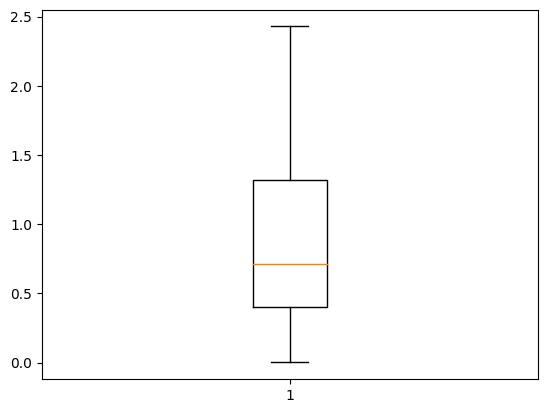

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
ptba_df = ptba_df[z_score < threshold]
print(ptba_df)

      closen  predn  SES adj close       MACD        MTM        RSI  \
32       0.0   -1.0    1268.428103 -12.321961 -34.841404  29.557666   
33       0.0   -1.0    1255.988527 -12.941770 -20.312731  27.658549   
34       1.0    1.0    1245.430787 -13.691238 -18.832330  26.131761   
35       0.0    1.0    1264.733704 -12.819867 -22.430081  33.340011   
36       0.0   -1.0    1283.061066 -10.863357 -31.458937  39.359695   
...      ...    ...            ...        ...        ...        ...   
1256     0.0    1.0    2295.467421   2.698934  17.490584  53.146655   
1257     0.0   -1.0    2301.235298   2.623892   8.745292  54.471180   
1258     1.0    1.0    2299.862766   2.432551 -16.909703  54.081384   
1259     0.0   -1.0    2341.741075   4.619731  12.827375  62.786924   
1260    -1.0   -1.0    2358.423760   7.028440  36.208854  65.572723   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    981.668912 -1.239526e+10 -104.508983  34.447106  ... -35.592745   
3

In [ ]:
ptba_df = ptba_df.dropna()
print(ptba_df)

      closen  predn  SES adj close       MACD        MTM        RSI  \
32       0.0   -1.0    1268.428103 -12.321961 -34.841404  29.557666   
33       0.0   -1.0    1255.988527 -12.941770 -20.312731  27.658549   
34       1.0    1.0    1245.430787 -13.691238 -18.832330  26.131761   
35       0.0    1.0    1264.733704 -12.819867 -22.430081  33.340011   
36       0.0   -1.0    1283.061066 -10.863357 -31.458937  39.359695   
...      ...    ...            ...        ...        ...        ...   
1256     0.0    1.0    2295.467421   2.698934  17.490584  53.146655   
1257     0.0   -1.0    2301.235298   2.623892   8.745292  54.471180   
1258     1.0    1.0    2299.862766   2.432551 -16.909703  54.081384   
1259     0.0   -1.0    2341.741075   4.619731  12.827375  62.786924   
1260    -1.0   -1.0    2358.423760   7.028440  36.208854  65.572723   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32    981.668912 -1.239526e+10 -104.508983  34.447106  ... -35.592745   
3

### Data Splitting

In [ ]:
# membagi jadi x dan y
x = ptba_df.drop(['predn', 'closen'], axis = 1)
y = ptba_df['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

#### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
print(confusion_matrix)

[[  1  41   0]
 [  9 219   9]
 [  5  53   2]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytrain, y_predta)

array([[ 58,  63,   2],
       [  0, 543,   0],
       [  2,  62,  60]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.8194622279129321

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.654867
1  Precision  0.529597
2     Recall  0.654867
3   F1 Score  0.571068


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.07      0.02      0.04        42
         0.0       0.70      0.92      0.80       237
         1.0       0.18      0.03      0.06        60

    accuracy                           0.65       339
   macro avg       0.32      0.33      0.30       339
weighted avg       0.53      0.65      0.57       339



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.7411504424778762

### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(2,1000, 50))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 52, max_depth = 2,
                             min_samples_split = 84, min_samples_leaf = 14,
                             max_features = 1, oob_score = True,
                             random_state = 100)
# cv = 3
# None = sqrt = log2 = 0.25 = 0.5 = 0.75 = 1: accuracy = 0.695522, auc = 0.5
# sqrt: accuracy = 0.695522, auc = 0.5
# log2: accuracy = 0.688525, auc = 0.5

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
# masih error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  0,  44,   0],
       [  0, 233,   0],
       [  0,  58,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'macro')
recall = recall_score(ytest, y_predbestvc1, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.695522
1  Precision  0.231841
2     Recall  0.333333
3   F1 Score  0.273474


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte)

fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(2,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 152, max_depth = 250,
                             min_samples_split = 78, min_samples_leaf = 170,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.695522, auc = 0.5

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 2, max_depth = 246,
                             min_samples_split = 38, min_samples_leaf = 222,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.695522, auc = 0.5

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 252, max_depth = 78,
                             min_samples_split = 34, min_samples_leaf = 146,
                             max_features = 0.25, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.695522, auc = 0.5

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 552, max_depth = 54,
                             min_samples_split = 46, min_samples_leaf = 258,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.695522, auc = 0.5

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 502, max_depth = 210,
                             min_samples_split = 98, min_samples_leaf = 46,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# random_state 100: accuracy = 0.695522, auc = 0.5

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 302, max_depth = 130,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 3, 12, 7 kolom pertama dan 0, 10, 2 kolom terakhir (pake 0.25; 0.648968, 0.736725)
# 3, 12, 7 kolom pertama dan 0, 15, 3 kolom terakhir (pake None; 0.637168, 0.736726)
# 4, 11, 7 kolom pertama dan 0, 9, 2 kolom terakhir (pake log2; 0.657817, 0.743362)
# 3, 13, 8 kolom pertama dan 0, 9, 1 kolom terakhir (pake sqrt; 0.646018, 0.734513)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 902, max_depth = 66,
                             min_samples_split = 14, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 1, 11, 8 kolom pertama dan 0, 10, 1 kolom terakhir (pake 0.75; 0.643068, 0.732300)
# 1, 12, 7 kolom pertama dan 0, 10, 2 kolom terakhir (pake None; 0.643068, 0.732300)
# 0, 9, 6 kolom pertama dan 0, 7, 3 kolom terakhir (pake log2; 0.660767, 0.745575)
# 1, 10, 6 kolom pertama dan 0, 8, 2 kolom terakhir (pake sqrt; 0.654867, 0.741150)

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 202, max_depth = 166,
                             min_samples_split = 38, min_samples_leaf = 34,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# semua 0

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 952, max_depth = 246,
                             min_samples_split = 14, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0, 4, 3 kolom pertama dan 0, 3, 1 kolom terakhir (pake 1; 0.681416; 0.761061)
# 1, 12, 7 kolom pertama dan 0, 10, 3 kolom terakhir (pake None; 0.646018, 0.734513)
# 0, 9, 6 kolom pertama dan 0, 7, 3 kolom terakhir (pake log2; 0.660767, 0.745575)
# 1, 10, 6 kolom pertama dan 0, 8, 2 kolom terakhir (pake sqrt; 0.654867, 0.741150)

rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 152, max_depth = 274,
                             min_samples_split = 70, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 0, 1, 0 kolom pertama dan 0, 1, 1 kolom terakhir (pake 0.5; 0.696165, 0.772123)
# 0, 1, 0 kolom pertama dan 0, 1, 1 kolom terakhir (pake None; 0.696165, 0.772123)
# 0, 1, 0 kolom pertama (pake log2; 0.696165, 0.772123)
# 0, 1, 0 kolom pertama dan 0, 1, 1 kolom terakhir (pake sqrt; 0.696165, 0.772123)

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 552, max_depth = 294,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 4, 15, 8 kolom pertama dan 0, 15, 1 kolom terakhir (pake None; 0.625369, 0.719026)
# 3, 13, 7 kolom pertama dan 0, 9, 2 kolom terakhir (pake log2; 0.648968, 0.736725)
# 3, 14, 8 kolom pertama dan 0, 10, 1 kolom terakhir (pake sqrt; 0.640118, 0.730088)

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

#### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr8)

array([[  1,  41,   0],
       [ 10, 219,   8],
       [  6,  52,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr8)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr8, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr8, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr8, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.654867
1  Precision  0.533411
2     Recall  0.654867
3   F1 Score  0.572077


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr8))

              precision    recall  f1-score   support

        -1.0       0.06      0.02      0.03        42
         0.0       0.70      0.92      0.80       237
         1.0       0.20      0.03      0.06        60

    accuracy                           0.65       339
   macro avg       0.32      0.33      0.30       339
weighted avg       0.53      0.65      0.57       339



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr8)

0.7411504424778762

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance

##### Feature Importance sebelum VC

Feature ranking:
1. feature 9 (0.023034)
2. feature 11 (0.024708)
3. feature 10 (0.025789)
4. feature 12 (0.029831)
5. feature 15 (0.030658)
6. feature 0 (0.034559)
7. feature 19 (0.034935)
8. feature 3 (0.035227)
9. feature 16 (0.035759)
10. feature 18 (0.035955)
11. feature 13 (0.036433)
12. feature 7 (0.037350)
13. feature 24 (0.038287)
14. feature 6 (0.038633)
15. feature 1 (0.038744)
16. feature 25 (0.039652)
17. feature 2 (0.039839)
18. feature 5 (0.043259)
19. feature 17 (0.044891)
20. feature 14 (0.045066)
21. feature 22 (0.045496)
22. feature 23 (0.047394)
23. feature 8 (0.047427)
24. feature 4 (0.047532)
25. feature 20 (0.048442)
26. feature 21 (0.051097)


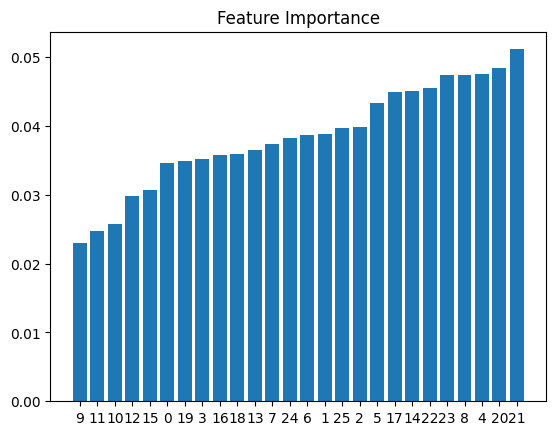

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [21, 20, 4, 8, 23, 22, 14, 17, 5] # accuracy = 0.654867, auc = 0.741150 (2, 8, 5 kolom pertama dan 0, 12, 3 kolom terakhir)
important_features = [21, 20, 4, 8, 23, 22, 14, 17] # accuracy = 0.657817, auc = 0.743362 (1, 5, 4 kolom pertama dan 1, 12, 2 kolom terakhir)
important_features = [21, 20, 4, 8, 23, 22, 14] # accuracy = 0.672566, auc = 0.754424 (2, 4, 4 kolom pertama dan 0, 9, 2 kolom terakhir)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  2,  40,   0],
       [  4, 224,   9],
       [  4,  54,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.672566
1  Precision  0.549417
2     Recall  0.672566
3   F1 Score  0.583832


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.20      0.05      0.08        42
         0.0       0.70      0.95      0.81       237
         1.0       0.18      0.03      0.06        60

    accuracy                           0.67       339
   macro avg       0.36      0.34      0.31       339
weighted avg       0.55      0.67      0.58       339



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.7544247787610621

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance setelah VC

Feature ranking:
1. feature 21 (0.018587)
2. feature 17 (0.021744)
3. feature 6 (0.022709)
4. feature 18 (0.025308)
5. feature 19 (0.025595)
6. feature 10 (0.027127)
7. feature 3 (0.027189)
8. feature 16 (0.028994)
9. feature 2 (0.030234)
10. feature 22 (0.031308)
11. feature 25 (0.032913)
12. feature 13 (0.034877)
13. feature 7 (0.035441)
14. feature 15 (0.036560)
15. feature 11 (0.037909)
16. feature 8 (0.039044)
17. feature 24 (0.041658)
18. feature 9 (0.044494)
19. feature 5 (0.045669)
20. feature 1 (0.046464)
21. feature 20 (0.046848)
22. feature 12 (0.049494)
23. feature 14 (0.053221)
24. feature 0 (0.060124)
25. feature 23 (0.064481)
26. feature 4 (0.072006)


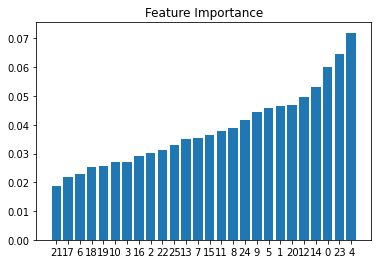

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [4] #accuracy = 0.647696, auc = 0.508056
important_features = [4, 23] #accuracy = 0.644986, auc = 0.515135
important_features = [4, 23, 0] #accuracy = 0.653117, auc = 0.526181
important_features = [4, 23, 0, 14] #accuracy = 0.647696, auc = 0.523696
important_features = [4, 23, 0, 14, 12] #accuracy = 0.639566, auc = 0.509228
important_features = [4, 23, 0, 14, 12, 20] #accuracy = 0.647696, auc = 0.514902
important_features = [4, 23, 0, 14, 12, 20, 1] #accuracy = 0.644986, auc = 0.517821
important_features = [4, 23, 0, 14, 12, 20, 1, 5] #accuracy = 0.647696, auc = 0.523961
important_features = [4, 23, 0, 14, 12, 20, 1, 5, 9] #accuracy = 0.647696, auc = 0.522486
important_features = [4, 23, 0, 14, 12, 20, 1, 5, 9, 24] #accuracy = 0.647696, auc = 0.525909
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

array([[  0,  74,   0],
       [  0, 245,   0],
       [  0,  73,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.647696
1  Precision  0.343114
2     Recall  0.364504
3   F1 Score  0.325544


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5259086662237044

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Feature Importance sesudah RS

Feature ranking:
1. feature 9 (0.020075)
2. feature 11 (0.021553)
3. feature 10 (0.026878)
4. feature 12 (0.027288)
5. feature 15 (0.029210)
6. feature 19 (0.031679)
7. feature 3 (0.032548)
8. feature 7 (0.033408)
9. feature 18 (0.034520)
10. feature 1 (0.035389)
11. feature 16 (0.036788)
12. feature 0 (0.037131)
13. feature 2 (0.038602)
14. feature 25 (0.039523)
15. feature 13 (0.039737)
16. feature 24 (0.042583)
17. feature 5 (0.043890)
18. feature 17 (0.044033)
19. feature 6 (0.044164)
20. feature 22 (0.044265)
21. feature 14 (0.047729)
22. feature 4 (0.047903)
23. feature 8 (0.047935)
24. feature 21 (0.049508)
25. feature 20 (0.050407)
26. feature 23 (0.053254)


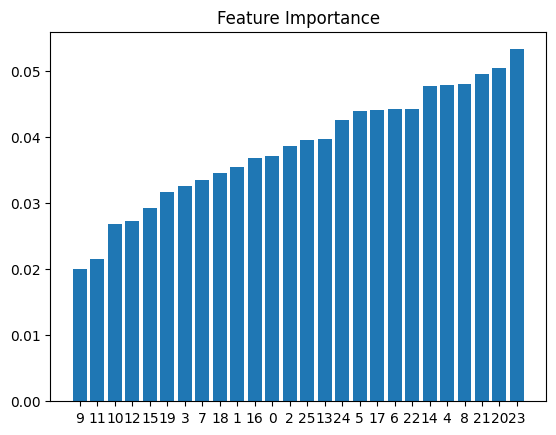

In [ ]:
importances = rfc_bestr10.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 8 pake sqrt
important_features = [23, 20, 21, 8, 4, 14, 22, 6, 17, 5] #accuracy = 0.654867, auc = 0.741150 (1, 8, 4 kolom pertama dan 0, 10, 2 kolom terakhir)
# -- rf 8 pake log2
# important_features = [23, 14, 20, 4, 21, 5, 8, 17, 22, 24] # hasil semuanya 0.64
# -- rf 10 pake sqrt
#important_features = [23, 20, 21, 8, 4, 14, 22, 6, 17, 5] # accuracy = 0.654867, auc = 0.741150 (1, 8, 4 pertama dan 0, 10, 2 kolom terakhir)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr8.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr8.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  1,  41,   0],
       [  8, 219,  10],
       [  4,  54,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted')
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.654867
1  Precision  0.526628
2     Recall  0.654867
3   F1 Score  0.570077


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.08      0.02      0.04        42
         0.0       0.70      0.92      0.79       237
         1.0       0.17      0.03      0.06        60

    accuracy                           0.65       339
   macro avg       0.31      0.33      0.30       339
weighted avg       0.53      0.65      0.57       339



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.7411504424778762

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.617886
1  Precision  0.392328
2     Recall  0.375489
3   F1 Score  0.360127


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5356322253476435

## TOBA.JK

In [ ]:
toba_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
toba_df.isnull().any(axis = 0)

closen             False
predn              False
SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

### Data Outlier

In [ ]:
print(toba_df)

      closen  predn  SES adj close       MACD         MTM        RSI  \
32       0.0    1.0     315.899884   0.053817    3.160043  52.985637   
33       0.0    1.0     317.373191   0.148898   -0.910960  55.450812   
34       0.0    1.0     318.109844   0.255439   -2.323720  56.668004   
35       1.0    1.0     318.478170   0.346834   -1.161860  57.293105   
36       0.0    1.0     326.135295   0.839446    7.514773  67.678613   
...      ...    ...            ...        ...         ...        ...   
1256    -1.0   -1.0    1205.060676  41.984394  246.839433  73.543776   
1257    -1.0   -1.0    1195.030338  37.184312  200.919717  71.675276   
1258     0.0   -1.0    1150.015169  30.345112  157.959858  63.872202   
1259     0.0    1.0    1122.507584  23.196274  128.979929  59.622456   
1260     0.0   -1.0    1118.753792  17.337884  109.489965  59.048025   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32     12.100922  2.969540e+06  -25.188819  59.261395  ...  11

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(toba_df))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
32    0.003608  0.723135       1.092559  0.168523  0.110024  0.009577   
33    0.003608  0.723135       1.081528  0.158306  0.169645  0.142214   
34    0.003608  0.723135       1.076013  0.146857  0.190336  0.207703   
35    2.220828  0.723135       1.073255  0.137036  0.173320  0.241336   
36    0.003608  0.723135       1.015926  0.084100  0.046247  0.800118   
...        ...       ...            ...       ...       ...       ...   
1256  2.213612  1.382867       5.564617  4.337319  3.458758  1.115687   
1257  2.213612  1.382867       5.489519  3.821504  2.786245  1.015154   
1258  0.003608  1.382867       5.152489  3.086566  2.157081  0.595318   
1259  0.003608  0.723135       4.946539  2.318355  1.732659  0.366665   
1260  0.003608  1.382867       4.918434  1.688815  1.447220  0.335758   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
32    0.183922  1.768407  0.249829  0.416185  ... 

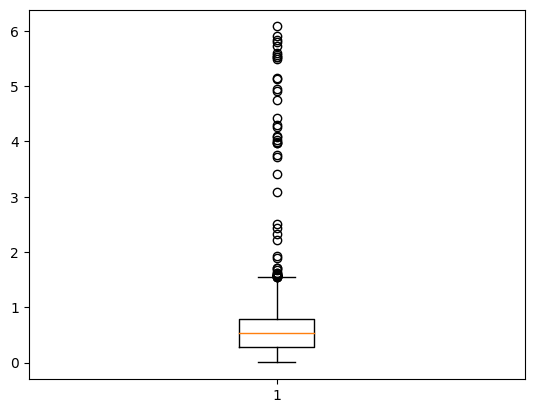

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'], showfliers = True)
plt.show()

In [ ]:
threshold = 7
outliers = np.where(z_score > threshold)
toba_df = toba_df[z_score < threshold]
print(toba_df)

      closen  predn  SES adj close       MACD         MTM        RSI  \
32       0.0    1.0     315.899884   0.053817    3.160043  52.985637   
33       0.0    1.0     317.373191   0.148898   -0.910960  55.450812   
34       0.0    1.0     318.109844   0.255439   -2.323720  56.668004   
35       1.0    1.0     318.478170   0.346834   -1.161860  57.293105   
36       0.0    1.0     326.135295   0.839446    7.514773  67.678613   
...      ...    ...            ...        ...         ...        ...   
1256    -1.0   -1.0    1205.060676  41.984394  246.839433  73.543776   
1257    -1.0   -1.0    1195.030338  37.184312  200.919717  71.675276   
1258     0.0   -1.0    1150.015169  30.345112  157.959858  63.872202   
1259     0.0    1.0    1122.507584  23.196274  128.979929  59.622456   
1260     0.0   -1.0    1118.753792  17.337884  109.489965  59.048025   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32     12.100922  2.969540e+06  -25.188819  59.261395  ...  11

In [ ]:
toba_df = toba_df.dropna()
print(toba_df)

      closen  predn  SES adj close       MACD         MTM        RSI  \
32       0.0    1.0     315.899884   0.053817    3.160043  52.985637   
33       0.0    1.0     317.373191   0.148898   -0.910960  55.450812   
34       0.0    1.0     318.109844   0.255439   -2.323720  56.668004   
35       1.0    1.0     318.478170   0.346834   -1.161860  57.293105   
36       0.0    1.0     326.135295   0.839446    7.514773  67.678613   
...      ...    ...            ...        ...         ...        ...   
1244     1.0    1.0     993.527655  47.389002  464.318161  74.207135   
1245     1.0    1.0    1009.263828  44.974144  477.159080  75.164330   
1247     1.0    1.0    1146.065957  50.527692  431.789770  81.664306   
1255     0.0    1.0    1200.121351  46.560373  283.678866  73.222946   
1257    -1.0   -1.0    1195.030338  37.184312  200.919717  71.675276   

             ATR         ADOSC         CCI        MFI  ...        TSI  \
32     12.100922  2.969540e+06  -25.188819  59.261395  ...  11

In [ ]:
print(toba_df['closen'].value_counts())

 0.0    965
 1.0    120
-1.0    117
Name: closen, dtype: int64


### Data Splitting

In [ ]:
# membagi jadi x dan y
x = toba_df.drop(['predn', 'closen'], axis = 1)
y = toba_df['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

#### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
print(confusion_matrix)

[[  3  33   0]
 [  1 288   0]
 [  1  35   0]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytrain, y_predta)

array([[ 21,  60,   0],
       [  1, 675,   0],
       [  0,  76,   8]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.8407494145199064

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.806094
1  Precision  0.707473
2     Recall  0.806094
3   F1 Score  0.729507


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.60      0.08      0.15        36
         0.0       0.81      1.00      0.89       289
         1.0       0.00      0.00      0.00        36

    accuracy                           0.81       361
   macro avg       0.47      0.36      0.35       361
weighted avg       0.71      0.81      0.73       361



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.8545706371191136

### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(2,1000, 50))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 202, max_depth = 6,
                             min_samples_split = 42, min_samples_leaf = 8,
                             max_features = 1, oob_score = True,
                             random_state = 100)
# cv = 3
# None: accuracy = 0.807799, auc = 0.520102
# sqrt = log2 = 1: accuracy =0.799443, auc = 0.5
# 0.25: accuracy = 0.802228, auc = 0.506701
# 0.5 = 0.75: accuracy = 0.805014, auc = 0.513402

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  3,  35,   0],
       [  0, 287,   0],
       [  0,  34,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'macro')
recall = recall_score(ytest, y_predbestvc1, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.799443
1  Precision  0.266481
2     Recall  0.333333
3   F1 Score  0.296182


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte)

fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(2,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START max_depth=258, max_features=0.75, min_samples_leaf=162, min_samples_split=10, n_estimators=202
[CV 1/3; 1/100] END max_depth=258, max_features=0.75, min_samples_leaf=162, min_samples_split=10, n_estimators=202;, score=0.574 total time=   0.7s
[CV 2/3; 1/100] START max_depth=258, max_features=0.75, min_samples_leaf=162, min_samples_split=10, n_estimators=202
[CV 2/3; 1/100] END max_depth=258, max_features=0.75, min_samples_leaf=162, min_samples_split=10, n_estimators=202;, score=0.632 total time=   1.4s
[CV 3/3; 1/100] START max_depth=258, max_features=0.75, min_samples_leaf=162, min_samples_split=10, n_estimators=202
[CV 3/3; 1/100] END max_depth=258, max_features=0.75, min_samples_leaf=162, min_samples_split=10, n_estimators=202;, score=0.578 total time=   1.5s
[CV 1/3; 2/100] START max_depth=270, max_features=sqrt, min_samples_leaf=118, min_samples_split=42, n_estimators=152
[CV 1/3; 2/100] END max_d

{'n_estimators': 902,
 'min_samples_split': 46,
 'min_samples_leaf': 22,
 'max_features': 0.25,
 'max_depth': 114}

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 402, max_depth = 30,
                             min_samples_split = 14, min_samples_leaf = 6,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.805014, auc = 0.520798

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 402, max_depth = 174,
                             min_samples_split = 38, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.807799, auc = 0.521898

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 502, max_depth = 262,
                             min_samples_split = 10, min_samples_leaf = 10,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.807799, auc = 0.521898

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 502, max_depth = 198,
                             min_samples_split = 42, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.805014, auc = 0.515197

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 702, max_depth = 206,
                             min_samples_split = 30, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.805014, auc = 0.513401

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 902, max_depth = 130,
                             min_samples_split = 22, min_samples_leaf = 6,
                             max_features = 0.5, oob_score = True,
                            random_state = 100)

# random_state 100, sqrt: accuracy = 0.807799, auc = 0.521898

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 202, max_depth = 34,
                             min_samples_split = 38, min_samples_leaf = 2,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 2, 0, 0 kolom pertama (pake 0.25; 0.806094, 0.854570)
# 3, 0, 1 kolom pertama dan 0, 0, 1 kolom terakhir (pake None; 0.811634, 0.858725)
# 2, 0, 1 kolom pertama (pake log2; 0.806094, 0.854570)
# 2, 0, 1 kolom pertama (pake sqrt; 0.806094, 0.854570)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 752, max_depth = 18,
                             min_samples_split = 22, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 3, 2, 1 kolom pertama dan 0, 0, 2 kolom terakhir (pake None; 0.811634, 0.858725)
# 3, 0, 1 kolom pertama (pake log2 & sqrt; 0.808864, 0.856648)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 352, max_depth = 206,
                             min_samples_split = 42, min_samples_leaf = 6,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 0 semua
rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 752, max_depth = 258,
                             min_samples_split = 18, min_samples_leaf = 138,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0 semuanya

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 652, max_depth = 206,
                             min_samples_split = 10, min_samples_leaf = 14,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0 semua

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 902, max_depth = 114,
                             min_samples_split = 46, min_samples_leaf = 22,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 0 semua

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 200,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'f1_weighted')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 200, max_depth = 24,
                             min_samples_split = 16, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 3, 2, 1 kolom pertama dan 0, 0, 2 kolom terakhir (pake None; 0.808864, 0.856648)
# 3, 1, 2 kolom pertama (pake log2 & sqrt; 0.806094, 0.854570)

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 350, max_depth = 22,
                             min_samples_split = 6, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 2, 3, 0 kolom pertama dan 2, 0, 3 kolom terakhir (pake None; 0.806094, 0.854570)
# 2, 3, 1 kolom pertama dan 1, 0, 2 kolom terakhir (pake sqrt; 0.803324, 0.852493)
# 3, 2 ,1  kolom pertama dan 0, 0, 1 kolom terakhir (pake log2; 0.806094, 0.854570)

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

#### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr14)

array([[  2,  32,   2],
       [  3, 286,   0],
       [  0,  33,   3]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr14)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr14, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_predbestr14, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr14, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.806094
1  Precision  0.752026
2     Recall  0.806094
3   F1 Score  0.739818


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr14))

              precision    recall  f1-score   support

        -1.0       0.40      0.06      0.10        36
         0.0       0.81      0.99      0.89       289
         1.0       0.60      0.08      0.15        36

    accuracy                           0.81       361
   macro avg       0.60      0.38      0.38       361
weighted avg       0.75      0.81      0.74       361



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr14)

0.8545706371191136

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Feature Importance

#### Feature Importance sebelum VC

Feature ranking:
1. feature 10 (0.016748)
2. feature 9 (0.024376)
3. feature 11 (0.025970)
4. feature 13 (0.028481)
5. feature 15 (0.029083)
6. feature 18 (0.033649)
7. feature 12 (0.033934)
8. feature 25 (0.034121)
9. feature 24 (0.034609)
10. feature 19 (0.034896)
11. feature 14 (0.036517)
12. feature 16 (0.036531)
13. feature 20 (0.037897)
14. feature 2 (0.037901)
15. feature 17 (0.037929)
16. feature 0 (0.039422)
17. feature 1 (0.040325)
18. feature 5 (0.040863)
19. feature 7 (0.041624)
20. feature 8 (0.043650)
21. feature 23 (0.044095)
22. feature 3 (0.044350)
23. feature 21 (0.050426)
24. feature 4 (0.053703)
25. feature 6 (0.057600)
26. feature 22 (0.061299)


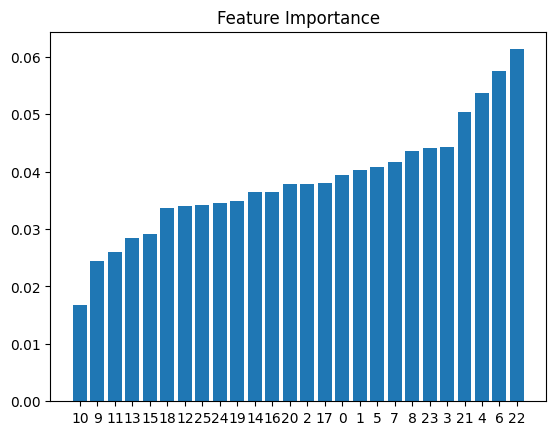

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [22, 6, 4, 21, 3, 23, 8, 7, 5, 1] # 2, 1, 0 kolom pertama (accuracy = 0.803324, auc = 0.852493)
#important_features = [22, 6, 4, 21, 3] # 3, 0, 0 kolom pertama (accuracy = 0.808864, auc = 0.856648)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  2,  34,   0],
       [  1, 288,   0],
       [  0,  36,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.803324
1  Precision  0.710503
2     Recall  0.803324
3   F1 Score  0.722931


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.67      0.06      0.10        36
         0.0       0.80      1.00      0.89       289
         1.0       0.00      0.00      0.00        36

    accuracy                           0.80       361
   macro avg       0.49      0.35      0.33       361
weighted avg       0.71      0.80      0.72       361



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.8524930747922437

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance setelah VC

Feature ranking:
1. feature 9 (0.000000)
2. feature 19 (0.000486)
3. feature 15 (0.000698)
4. feature 10 (0.002022)
5. feature 18 (0.002239)
6. feature 8 (0.002272)
7. feature 7 (0.002340)
8. feature 11 (0.002868)
9. feature 20 (0.003864)
10. feature 24 (0.003914)
11. feature 25 (0.005009)
12. feature 13 (0.005110)
13. feature 16 (0.006413)
14. feature 12 (0.007466)
15. feature 3 (0.010446)
16. feature 14 (0.012608)
17. feature 23 (0.015096)
18. feature 5 (0.027657)
19. feature 17 (0.031860)
20. feature 21 (0.041029)
21. feature 1 (0.063079)
22. feature 6 (0.068311)
23. feature 0 (0.095309)
24. feature 4 (0.104158)
25. feature 22 (0.197534)
26. feature 2 (0.288213)


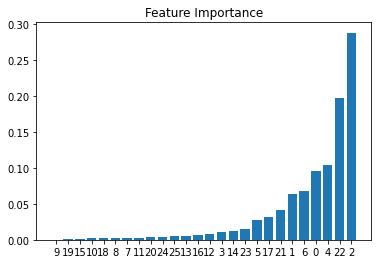

In [ ]:
importances = rfc_bestvc1.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [2] #accuracy = 0.808743, auc = 0.526750
important_features = [2, 22] #accuracy = 0.811475, auc = 0.527815
important_features = [2, 22, 4] #accuracy = 0.811475, auc = 0.521597
important_features = [2, 22, 4, 0] #accuracy = 0.811475, auc = 0.521597
important_features = [2, 22, 4, 0, 6] #accuracy = 0.811475, auc = 0.521597
important_features = [2, 22, 4, 0, 6, 1] #accuracy = 0.811475, auc = 0.521597
important_features = [2, 22, 4, 0, 6, 1, 21] #accuracy = 0.811475, auc = 0.521597
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc1.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc1.predict(xtest_ifvc)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.811475
1  Precision  0.438889
2     Recall  0.360493
3   F1 Score  0.348780


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.521597541654239

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance sesudah RS

Feature ranking:
1. feature 10 (0.008138)
2. feature 9 (0.008374)
3. feature 11 (0.013199)
4. feature 15 (0.013851)
5. feature 12 (0.021324)
6. feature 13 (0.022936)
7. feature 16 (0.024023)
8. feature 1 (0.030018)
9. feature 18 (0.033018)
10. feature 17 (0.034080)
11. feature 14 (0.034363)
12. feature 24 (0.035040)
13. feature 2 (0.035914)
14. feature 19 (0.036785)
15. feature 3 (0.038704)
16. feature 25 (0.039761)
17. feature 0 (0.039997)
18. feature 5 (0.047299)
19. feature 7 (0.047373)
20. feature 8 (0.049960)
21. feature 23 (0.053295)
22. feature 20 (0.054975)
23. feature 4 (0.056435)
24. feature 6 (0.070331)
25. feature 22 (0.075087)
26. feature 21 (0.075721)


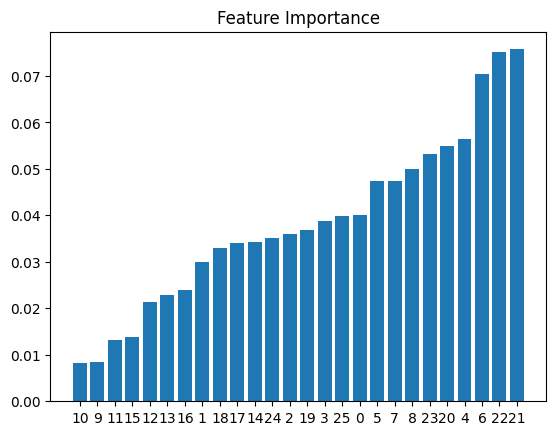

In [ ]:
importances = rfc_bestr14.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 9 none
#important_features = [22, 6, 21, 4, 23, 20, 8, 5, 7, 0] #2, 1, 0 kolom pertama dan 0, 0, 1 kolom terakhir(accuracy = 0.806094, auc = 0.854570)
#important_features = [22, 6, 21, 4, 23, 20, 8, 5, 7] #3, 1, 0 kolom pertama(accuracy = 0.806094, auc = 0.854570)
# -- rf 8 none
#important_features = [22, 6, 21, 4, 23, 20, 8, 7, 5, 0] #3, 1, 0 kolom pertama dan 0, 0, 1 kolom terakhir (accuracy = 0.808864, auc = 0.856648)
# -- rf 14 sqrt
#important_features = [22, 6, 21, 4, 0, 23, 3, 5, 8, 20] #2, 1, 1 kolom pertama dan 1, 0, 3 kolom terakhir (accuracy = 0.811634, auc = 0.858725)
# -- rf 14 none
important_features = [21, 22, 6, 4, 20, 23, 8, 7] #2, 1, 1 kolom pertama dan 0, 0, 1 kolom terakhir (accuracy = 0.806094, auc = 0.854570)
xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr14.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr14.predict(xtest_ifrs)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  2,  34,   0],
       [  1, 288,   0],
       [  1,  34,   1]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.806094
1  Precision  0.797224
2     Recall  0.806094
3   F1 Score  0.730276


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.8545706371191136

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.50      0.06      0.10        36
         0.0       0.81      1.00      0.89       289
         1.0       1.00      0.03      0.05        36

    accuracy                           0.81       361
   macro avg       0.77      0.36      0.35       361
weighted avg       0.80      0.81      0.73       361



In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.811475
1  Precision  0.472222
2     Recall  0.360493
3   F1 Score  0.350063


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.5215944991813171

## UNTR.JK

In [ ]:
untr_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
untr_df.isnull().any(axis = 0)

closen             False
predn              False
SES adj close      False
MACD               False
MTM                False
RSI                False
ATR                False
ADOSC              False
CCI                False
MFI                False
ULTSOC             False
Donchian upper     False
Donchian Lower     False
Donchian Medium    False
Upper BB           False
Lower BB           False
OBV                False
SMA                False
TSI                False
CC                 False
SO%k               False
SO%d               False
MI                 False
1-EMV              False
15-EMV             False
+VI                False
-VI                False
CO                 False
dtype: bool

### Data Outlier

In [ ]:
print(untr_df)

      closen  predn  SES adj close        MACD          MTM        RSI  \
41      -1.0   -1.0    19880.66514  589.517042  1447.536313  80.575986   
42       1.0    1.0    19518.32378  558.957609  1184.633391  68.099220   
43       0.0    1.0    19808.03592  551.756085  1423.879196  71.835280   
44       1.0    1.0    19962.91151  552.180796  1423.276513  73.605799   
45       0.0   -1.0    20481.17646  587.563961  1984.026931  78.460503   
...      ...    ...            ...         ...          ...        ...   
1256     0.0   -1.0    21336.73011 -269.362596  -593.126804  43.888441   
1257     0.0   -1.0    21404.75470 -245.209369  -441.977462  45.260875   
1258     1.0    1.0    21378.17716 -225.611637  -693.584436  44.802153   
1259     0.0   -1.0    21813.24776 -172.979730   -55.965068  53.133218   
1260    -1.0   -1.0    21958.07700 -118.219296   202.256726  55.527262   

              ATR         ADOSC         CCI        MFI  ...        TSI  \
41    5036.950814 -2.582007e+09  107.

In [ ]:
from scipy import stats

z_score = np.abs(stats.zscore(untr_df))
print(z_score)

        closen     predn  SES adj close      MACD       MTM       RSI  \
32    1.696719  0.956206       0.984985  0.457780  0.141689  1.075169   
33    0.004132  0.956206       0.911476  0.503404  0.339547  1.374922   
34    1.696719  0.956206       0.869970  0.565943  0.501121  1.510870   
35    0.004132  0.956206       0.796948  0.671071  0.826791  1.707904   
36    0.004132  1.045800       0.755685  0.772154  0.898507  1.800700   
...        ...       ...            ...       ...       ...       ...   
1256  0.004132  1.045800       0.306567  0.461269  0.357848  0.368970   
1257  0.004132  1.045800       0.290436  0.384864  0.271931  0.291075   
1258  1.696719  0.956206       0.296738  0.328490  0.414950  0.317111   
1259  0.004132  1.045800       0.193565  0.176931  0.052511  0.155732   
1260  1.688455  1.045800       0.159220  0.030337  0.094268  0.291610   

           ATR     ADOSC       CCI       MFI  ...       TSI        CC  \
32    0.473578  1.974171  0.766224  1.125106  ... 

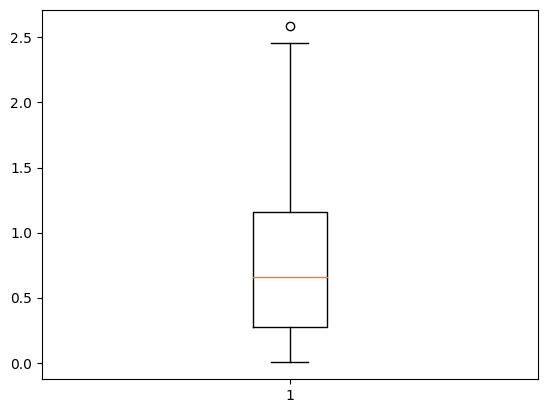

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(z_score['SES adj close'], showfliers = True)
plt.show()

In [ ]:
threshold = 3
outliers = np.where(z_score > threshold)
untr_df = untr_df[z_score < threshold]
print(untr_df)

      closen  predn  SES adj close        MACD          MTM        RSI  \
32       1.0    1.0    18475.90680  115.583063   285.682083  69.332857   
33       0.0    1.0    18785.88797  126.382855   633.762917  74.614221   
34       1.0    1.0    18960.91566  141.186941   918.011343  77.009498   
35       0.0    1.0    19268.84260  166.072376  1490.945122  80.481066   
36       0.0   -1.0    19442.84513  190.000220  1617.111236  82.116044   
...      ...    ...            ...         ...          ...        ...   
1256     0.0   -1.0    21336.73011 -101.970350  -593.126804  43.888441   
1257     0.0   -1.0    21404.75470  -83.884044  -441.977462  45.260875   
1258     1.0    1.0    21378.17716  -70.539525  -693.584436  44.802153   
1259     0.0   -1.0    21813.24776  -34.662972   -55.965068  53.133218   
1260    -1.0   -1.0    21958.07700    0.038109   202.256726  55.527262   

              ATR         ADOSC         CCI        MFI  ...        TSI  \
32    4789.738772 -2.051997e+09   83.

In [ ]:
untr_df = untr_df.dropna()
print(untr_df)

      closen  predn  SES adj close        MACD          MTM        RSI  \
32       1.0    1.0    18475.90680  115.583063   285.682083  69.332857   
33       0.0    1.0    18785.88797  126.382855   633.762917  74.614221   
34       1.0    1.0    18960.91566  141.186941   918.011343  77.009498   
35       0.0    1.0    19268.84260  166.072376  1490.945122  80.481066   
36       0.0   -1.0    19442.84513  190.000220  1617.111236  82.116044   
...      ...    ...            ...         ...          ...        ...   
1256     0.0   -1.0    21336.73011 -101.970350  -593.126804  43.888441   
1257     0.0   -1.0    21404.75470  -83.884044  -441.977462  45.260875   
1258     1.0    1.0    21378.17716  -70.539525  -693.584436  44.802153   
1259     0.0   -1.0    21813.24776  -34.662972   -55.965068  53.133218   
1260    -1.0   -1.0    21958.07700    0.038109   202.256726  55.527262   

              ATR         ADOSC         CCI        MFI  ...        TSI  \
32    4789.738772 -2.051997e+09   83.

In [ ]:
print(untr_df['closen'].value_counts())

 0.0    758
-1.0    203
 1.0    196
Name: closen, dtype: int64


### Data Splitting

In [ ]:
# membagi jadi x dan y
x = untr_df.drop(['predn', 'closen'], axis = 1)
y = untr_df['closen']

# train dan test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

### RF Primary

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc.fit(xtrain, ytrain)

y_predta = rfc.predict(xtrain)
y_predte = rfc.predict(xtest)

#### RF Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix = confusion_matrix(ytest, y_predte)
print(confusion_matrix)

[[  0  50   1]
 [  6 222   5]
 [  1  61   2]]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytrain, y_predta)

array([[ 74,  76,   2],
       [  1, 524,   0],
       [  2,  68,  62]])

In [ ]:
accuracy_score(ytrain, y_predta)

0.819672131147541

In [ ]:
akurasi = accuracy_score(ytest, y_predte)
presisi = precision_score(ytest, y_predte, average = 'weighted')
recall = recall_score(ytest, y_predte, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predte, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.643678
1  Precision  0.492337
2     Recall  0.643678
3   F1 Score  0.535439


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predte))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        51
         0.0       0.67      0.95      0.78       233
         1.0       0.25      0.03      0.06        64

    accuracy                           0.64       348
   macro avg       0.31      0.33      0.28       348
weighted avg       0.49      0.64      0.54       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predte)

0.7327586206896552

### Validation Curve

In [ ]:
import plotly.graph_objects as go

def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

rfcg = RandomForestClassifier()

In [ ]:
param_range = list(range(2,1000, 50))
plot_validation_curves(rfcg, xtrain, ytrain, "n_estimators", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "max_depth", param_range, 3)

In [ ]:
param_range = list(range(2, 100, 2))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_split", param_range, 3)

In [ ]:
param_range = list(range(2, 300, 4))
plot_validation_curves(rfcg, xtrain, ytrain, "min_samples_leaf", param_range, 3)

In [ ]:
rfc_bestvc1 = RandomForestClassifier(n_estimators = 452, max_depth = 2,
                             min_samples_split = 88, min_samples_leaf = 26,
                             max_features = 1, random_state = 100)
# cv = 3
# None = sqrt = log2 = 0.25 = 0.5 = 0.75 = 1: accuracy = 0.690058, auc = 0.5

rfc_bestvc1.fit(xtrain, ytrain)

y_predbestvc1 = rfc_bestvc1.predict(xtest)

In [ ]:
rfc_bestvc2 = RandomForestClassifier(n_estimators = 110, max_depth = 2,
                             min_samples_split = 64, min_samples_leaf = 18,
                             max_features = None, random_state = 100)
# cv = 3
# None: accuracy = 0.633880, auc = 0.5
# sqrt: accuracy = 0.633880, auc = 0.5
# log2: accuracy = 0.633880, auc = 0.5

rfc_bestvc2.fit(xtrain, ytrain)

y_predbestvc2 = rfc_bestvc2.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestvc1)

array([[  0,  58,   0],
       [  0, 236,   0],
       [  0,  48,   0]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestvc1)
presisi = precision_score(ytest, y_predbestvc1, average = 'macro')
recall = recall_score(ytest, y_predbestvc1, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestvc1, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.690058
1  Precision  0.230019
2     Recall  0.333333
3   F1 Score  0.272203


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestvc1)

0.5

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predte)

fpr, tpr, threshold = roc_curve(ytest, y_predte)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(50,1000,50)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1, None],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'roc_auc_ovr')

randoms.fit(xtrain, ytrain)
randoms.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START max_depth=190, max_features=0.5, min_samples_leaf=266, min_samples_split=54, n_estimators=800
[CV 1/3; 1/100] END max_depth=190, max_features=0.5, min_samples_leaf=266, min_samples_split=54, n_estimators=800;, score=0.500 total time=   2.4s
[CV 2/3; 1/100] START max_depth=190, max_features=0.5, min_samples_leaf=266, min_samples_split=54, n_estimators=800
[CV 2/3; 1/100] END max_depth=190, max_features=0.5, min_samples_leaf=266, min_samples_split=54, n_estimators=800;, score=0.500 total time=   2.2s
[CV 3/3; 1/100] START max_depth=190, max_features=0.5, min_samples_leaf=266, min_samples_split=54, n_estimators=800
[CV 3/3; 1/100] END max_depth=190, max_features=0.5, min_samples_leaf=266, min_samples_split=54, n_estimators=800;, score=0.500 total time=   2.8s
[CV 1/3; 2/100] START max_depth=122, max_features=None, min_samples_leaf=266, min_samples_split=42, n_estimators=600
[CV 1/3; 2/100] END max_depth=1

{'n_estimators': 150,
 'min_samples_split': 98,
 'min_samples_leaf': 22,
 'max_features': 'sqrt',
 'max_depth': 2}

In [ ]:
rfc_bestr6 = RandomForestClassifier(n_estimators = 102, max_depth = 122,
                             min_samples_split = 90, min_samples_leaf = 130,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.690058 auc = 0.5

rfc_bestr6.fit(xtrain, ytrain)

y_predbestr6 = rfc_bestr6.predict(xtest)

In [ ]:
rfc_bestr5 = RandomForestClassifier(n_estimators = 902, max_depth = 66,
                             min_samples_split = 70, min_samples_leaf = 262,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.690058 auc = 0.5

rfc_bestr5.fit(xtrain, ytrain)

y_predbestr5 = rfc_bestr5.predict(xtest)

In [ ]:
rfc_bestr4 = RandomForestClassifier(n_estimators = 802, max_depth = 106,
                             min_samples_split = 34, min_samples_leaf = 46,
                             max_features = 0.25, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.690058 auc = 0.5

rfc_bestr4.fit(xtrain, ytrain)

y_predbestr4 = rfc_bestr4.predict(xtest)

In [ ]:
rfc_bestr3 = RandomForestClassifier(n_estimators = 102, max_depth = 198,
                             min_samples_split = 46, min_samples_leaf = 218,
                             max_features = 1, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.690058 auc = 0.5

rfc_bestr3.fit(xtrain, ytrain)

y_predbestr3 = rfc_bestr3.predict(xtest)

In [ ]:
rfc_bestr2 = RandomForestClassifier(n_estimators = 402, max_depth = 210,
                             min_samples_split = 82, min_samples_leaf = 150,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# random state 100: accuracy = 0.690058 auc = 0.5

rfc_bestr2.fit(xtrain, ytrain)

y_predbestr2 = rfc_bestr2.predict(xtest)

In [ ]:
rfc_bestr = RandomForestClassifier(n_estimators = 502, max_depth = 2,
                             min_samples_split = 94, min_samples_leaf = 262,
                             max_features = 0.75, oob_score = True,
                            random_state = 100)

# None: accuracy = 0.690058, auc = 0.5

rfc_bestr.fit(xtrain, ytrain)

y_predbestr = rfc_bestr.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr7 = RandomForestClassifier(n_estimators = 50, max_depth = 98,
                             min_samples_split = 10, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 3, 12, 4 kolom pertama dan 3, 12, 2 kolom terakhir (pake 0.75; 0.614943, 0.711206)
# 1, 6, 0 kolom pertama dan 4, 7, 2 kolom terakhir (pake None; 0.640805, 0.730603)
# 2, 5, 2 kolom pertama dan 2, 6, 0 kolom terakhir (pake log2; 0.643678, 0.732758)
# 1, 6, 1 kolom pertama dan 4, 6, 2 kolom terakhir (pake sqrt; 0.643678, 0.732758)

rfc_bestr7.fit(xtrain, ytrain)

y_predbestr7 = rfc_bestr7.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr8 = RandomForestClassifier(n_estimators = 650, max_depth = 246,
                             min_samples_split = 50, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_macro
# 0, 2, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake None; 0.660920, 0.745689)
# 0 sisanya

rfc_bestr8.fit(xtrain, ytrain)

y_predbestr8 = rfc_bestr8.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr9 = RandomForestClassifier(n_estimators = 350, max_depth = 270,
                             min_samples_split = 14, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 1, 6, 1 kolom pertama dan 3, 7, 3 kolom terakhir (pake None; 0.643678, 0.732758)
# 0, 5, 0 kolom pertama dan 2, 6, 1 kolom terakhir (pake log2; 0.640805, 0.730603)
# 0, 6, 1 kolom pertama dan 3, 5, 1 kolom terakhir (pake sqrt; 0.640805, 0.730603)

rfc_bestr9.fit(xtrain, ytrain)

y_predbestr9 = rfc_bestr9.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr10 = RandomForestClassifier(n_estimators = 150, max_depth = 30,
                             min_samples_split = 26, min_samples_leaf = 142,
                             max_features = 'log2', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_micro
# 0 semua
rfc_bestr10.fit(xtrain, ytrain)

y_predbestr10 = rfc_bestr10.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr11 = RandomForestClassifier(n_estimators = 200, max_depth = 66,
                             min_samples_split = 62, min_samples_leaf = 118,
                             max_features = 0.25, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr_weighted
# 0 semua

rfc_bestr11.fit(xtrain, ytrain)

y_predbestr11 = rfc_bestr11.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr12 = RandomForestClassifier(n_estimators = 150, max_depth = 2,
                             min_samples_split = 98, min_samples_leaf = 22,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring roc_auc_ovr
# 0 semua

rfc_bestr12.fit(xtrain, ytrain)

y_predbestr12 = rfc_bestr12.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfs = RandomForestClassifier()

param_grid = {'n_estimators': list(range(200,500,50)),
              'max_depth': list(range(20, 30, 2)),
              'max_features' : ['sqrt', 'log2', None],
              'min_samples_split': list(range(2, 50, 2)),
              'min_samples_leaf': list(range(2, 50, 2))}

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 100,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'balanced_accuracy')

randoms.fit(xtrain, ytrain)
randoms.best_params_

In [ ]:
rfc_bestr13 = RandomForestClassifier(n_estimators = 450, max_depth = 28,
                             min_samples_split = 4, min_samples_leaf = 2,
                             max_features = None, oob_score = True,
                            random_state = 100)

# pake adro3 & scoring f1_weighted
# 1, 11, 2 kolom pertama dan 3, 13, 3 kolom terakhir (pake None; 0.612069, 0.713362)
# 1, 13, 1 kolom pertama dan 5, 10, 3 kolom terakhir (pake log2; 0.614943, 0.711206)
# 0, 12, 2 kolom pertama dan 5, 8, 2 kolom terakhir (pake sqrt; 0.617816, 0.713362)

rfc_bestr13.fit(xtrain, ytrain)

y_predbestr13 = rfc_bestr13.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

In [ ]:
rfc_bestr14 = RandomForestClassifier(n_estimators = 250, max_depth = 26,
                             min_samples_split = 44, min_samples_leaf = 2,
                             max_features = 'sqrt', oob_score = True,
                            random_state = 100)

# pake adro3 & scoring balanced_accuracy
# 0, 2, 1 kolom pertama dan 0, 1, 0 kolom terakhir (pake None; 0.660920, 0.745689)
# 0 semua sisanya

rfc_bestr14.fit(xtrain, ytrain)

y_predbestr14 = rfc_bestr14.predict(xtest)
#y_predta = rfc_bestg.predict(xtrain)

##### RFRS Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_predbestr7)

array([[  1,  46,   4],
       [  6, 221,   6],
       [  1,  61,   2]])

In [ ]:
akurasi = accuracy_score(ytest, y_predbestr7)
#akurasita = accuracy_score(ytrain, y_predta)
presisi = precision_score(ytest, y_predbestr7, average = 'weighted')
recall = recall_score(ytest, y_predbestr7, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_predbestr7, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.643678
1  Precision  0.500093
2     Recall  0.643678
3   F1 Score  0.542164


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_predbestr7))

              precision    recall  f1-score   support

        -1.0       0.12      0.02      0.03        51
         0.0       0.67      0.95      0.79       233
         1.0       0.17      0.03      0.05        64

    accuracy                           0.64       348
   macro avg       0.32      0.33      0.29       348
weighted avg       0.50      0.64      0.54       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_predbestr7)

0.7327586206896552

In [ ]:
# ROC dan AUC

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

auc = roc_auc_score(ytest, y_predbestr)

fpr, tpr, threshold = roc_curve(ytest, y_predbestr)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Feature Importance

#### Feature Importance sebelum VC

Feature ranking:
1. feature 10 (0.027134)
2. feature 9 (0.030080)
3. feature 13 (0.030836)
4. feature 11 (0.030954)
5. feature 1 (0.032385)
6. feature 17 (0.032681)
7. feature 16 (0.033986)
8. feature 8 (0.034737)
9. feature 12 (0.035293)
10. feature 19 (0.035417)
11. feature 5 (0.035430)
12. feature 0 (0.035558)
13. feature 24 (0.035911)
14. feature 3 (0.036323)
15. feature 15 (0.037292)
16. feature 25 (0.037570)
17. feature 2 (0.037934)
18. feature 4 (0.039758)
19. feature 7 (0.041378)
20. feature 6 (0.041628)
21. feature 23 (0.043561)
22. feature 14 (0.045402)
23. feature 18 (0.046185)
24. feature 20 (0.047607)
25. feature 22 (0.054836)
26. feature 21 (0.060120)


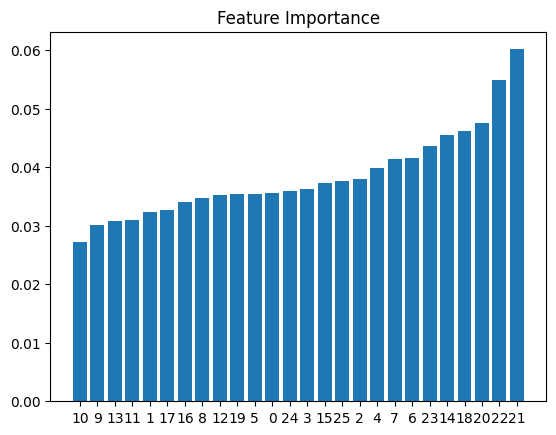

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [21, 22, 20, 18, 14, 23, 6, 7] #1, 1, 1 kolom pertama dan 0, 4, 2 (accuracy = 0.663793, auc = 0.747844)
important_features = [21, 22, 20, 18, 14, 23, 6] #0, 2, 5 kolom pertama dan 0, 6, 1 (accuracy = 0.649425, auc = 0.747844)
xtrain_ifr = xtrain.iloc[:, important_features]
xtest_ifr = xtest.iloc[:, important_features]

rfc.fit(xtrain_ifr, ytrain)

y_pred_ifr = rfc.predict(xtest_ifr)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifr)

array([[  0,  51,   0],
       [  2, 225,   6],
       [  5,  58,   1]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifr)
presisi = precision_score(ytest, y_pred_ifr, average = 'weighted')
recall = recall_score(ytest, y_pred_ifr, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifr, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.649425
1  Precision  0.477310
2     Recall  0.649425
3   F1 Score  0.536562


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifr))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        51
         0.0       0.67      0.97      0.79       233
         1.0       0.14      0.02      0.03        64

    accuracy                           0.65       348
   macro avg       0.27      0.33      0.27       348
weighted avg       0.48      0.65      0.54       348



In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifr)

0.7478448275862069

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance setelah VC

Feature ranking:
1. feature 11 (0.001906)
2. feature 9 (0.002078)
3. feature 16 (0.004593)
4. feature 5 (0.007537)
5. feature 15 (0.009052)
6. feature 7 (0.010282)
7. feature 10 (0.010289)
8. feature 1 (0.010338)
9. feature 3 (0.010412)
10. feature 22 (0.011819)
11. feature 18 (0.013317)
12. feature 25 (0.013668)
13. feature 19 (0.016762)
14. feature 8 (0.021984)
15. feature 2 (0.022188)
16. feature 13 (0.022842)
17. feature 21 (0.023469)
18. feature 12 (0.029832)
19. feature 4 (0.030169)
20. feature 24 (0.038760)
21. feature 17 (0.040313)
22. feature 6 (0.042486)
23. feature 23 (0.046493)
24. feature 14 (0.063449)
25. feature 0 (0.070578)
26. feature 20 (0.425387)


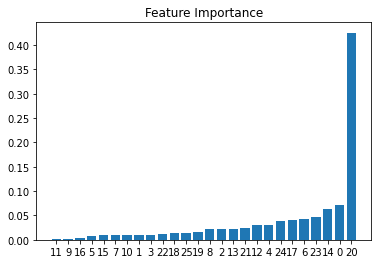

In [ ]:
importances = rfc_bestvc2.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
important_features = [20] #accuracy = 0.633880, auc = 0.5
important_features = [20, 0] #accuracy = 0.633880, auc = 0.5
important_features = [20, 0, 14] #accuracy = 0.633880, auc = 0.5
important_features = [20, 0, 14, 23] #accuracy = 0.633880, auc = 0.5
important_features = [20, 0, 14, 23, 6] #accuracy = 0.633880, auc = 0.5
important_features = [20, 0, 14, 23, 6, 17] #accuracy = 0.633880, auc = 0.5
xtrain_ifvc = xtrain.iloc[:, important_features]
xtest_ifvc = xtest.iloc[:, important_features]

rfc_bestvc2.fit(xtrain_ifvc, ytrain)

y_pred_ifvc = rfc_bestvc2.predict(xtest_ifvc)

##### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifvc)

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifvc)
presisi = precision_score(ytest, y_pred_ifvc, average = 'macro')
recall = recall_score(ytest, y_pred_ifvc, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifvc, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.633880
1  Precision  0.211293
2     Recall  0.333333
3   F1 Score  0.258640


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifvc)

0.5

In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Feature Importance sesudah RS

Feature ranking:
1. feature 10 (0.019850)
2. feature 13 (0.029471)
3. feature 11 (0.029910)
4. feature 12 (0.030261)
5. feature 0 (0.030266)
6. feature 3 (0.030886)
7. feature 9 (0.032532)
8. feature 5 (0.033289)
9. feature 15 (0.034076)
10. feature 24 (0.034331)
11. feature 8 (0.034445)
12. feature 17 (0.034905)
13. feature 19 (0.035769)
14. feature 1 (0.035820)
15. feature 6 (0.038860)
16. feature 16 (0.040290)
17. feature 23 (0.041280)
18. feature 7 (0.042401)
19. feature 2 (0.043988)
20. feature 4 (0.044170)
21. feature 25 (0.044571)
22. feature 18 (0.044842)
23. feature 20 (0.046023)
24. feature 14 (0.048246)
25. feature 22 (0.055485)
26. feature 21 (0.064033)


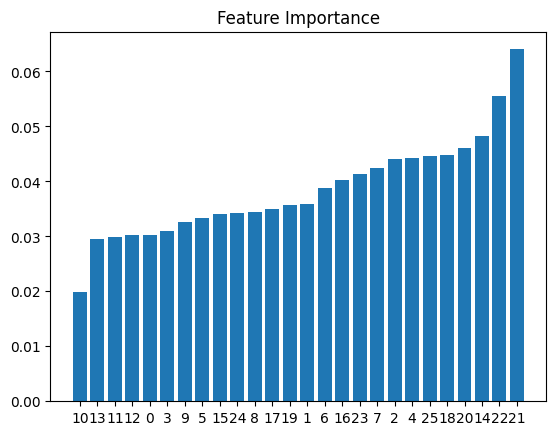

In [ ]:
importances = rfc_bestr7.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

In [ ]:
# building random forest with the important values
# -- rf 9 none
#important_features = [21, 22, 20, 23, 6, 14, 18, 8, 7, 24, 25] #1, 7, 4 kolom pertama dan 1, 8, 3 kolom terakhir (accuracy = 0.637931, auc = 0.728448)
#important_features = [21, 22, 20, 23, 6, 14, 18, 8, 7, 24] #0, 5, 3 kolom pertama dan 0, 7, 2 kolom terakhir (accuracy = 0.640805, auc = 0.730603)
# -- rf 7 sqrt
#important_features = [21, 22, 14, 20, 18, 25, 4, 2, 7] #1, 8, 2 kolom pertama dan 2, 5, 2 kolom terakhir (accuracy = 0.640805, auc = 0.721982)
important_features = [21, 22, 14, 20, 18, 25, 4, 2] #1, 7, 2 kolom pertama dan 2, 3, 1 kolom terakhir (accuracy = 0.646552, auc = 0.734913)

xtrain_ifrs = xtrain.iloc[:, important_features]
xtest_ifrs = xtest.iloc[:, important_features]

rfc_bestr7.fit(xtrain_ifrs, ytrain)

y_pred_ifrs = rfc_bestr7.predict(xtest_ifrs)

###### RFFI Evaluation

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
confusion_matrix(ytest, y_pred_ifrs)

array([[  1,  48,   2],
       [  7, 223,   3],
       [  2,  61,   1]])

In [ ]:
akurasi = accuracy_score(ytest, y_pred_ifrs)
presisi = precision_score(ytest, y_pred_ifrs, average = 'weighted', zero_division = 0)
recall = recall_score(ytest, y_pred_ifrs, average = 'weighted')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred_ifrs, average = 'weighted')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.646552
1  Precision  0.495028
2     Recall  0.646552
3   F1 Score  0.538582


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "micro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred_ifrs)

0.7349137931034483

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred_ifrs))

              precision    recall  f1-score   support

        -1.0       0.10      0.02      0.03        51
         0.0       0.67      0.96      0.79       233
         1.0       0.17      0.02      0.03        64

    accuracy                           0.65       348
   macro avg       0.31      0.33      0.28       348
weighted avg       0.50      0.65      0.54       348



In [ ]:


auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Primary RF dengan hasil RFFIRS

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

rfc_rffirs = RandomForestClassifier(n_estimators = 200, max_depth = 20,
                             min_samples_split = 6, min_samples_leaf = 4,
                             random_state = 100)

rfc_rffirs.fit(xtrain_ifrs, ytrain)

y_predta = rfc_rffirs.predict(xtrain_ifrs)
y_pred = rfc_rffirs.predict(xtest_ifrs)

In [ ]:
akurasi = accuracy_score(ytest, y_pred)
presisi = precision_score(ytest, y_pred, average = 'macro')
recall = recall_score(ytest, y_pred, average = 'macro')
#specificity = metrics.recall_score(ytest, y_pred, pos_label = 1)
f1 = f1_score(ytest, y_pred, average = 'macro')

hasil = {'Evaluasi': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
         'Hasil': [akurasi, presisi, recall, f1]}

hasil_df = pd.DataFrame(hasil)
print(hasil_df)

    Evaluasi     Hasil
0   Accuracy  0.592896
1  Precision  0.264744
2     Recall  0.321556
3   F1 Score  0.271454


In [ ]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(ytest, y_predte, average = "macro"):
  lb = LabelBinarizer()
  lb.fit(ytest)
  ytest = lb.transform(ytest)
  y_predte = lb.transform(y_predte)
  return roc_auc_score(ytest, y_predte, average = average)

multiclass_roc_auc_score(ytest, y_pred)

0.4904927253903694